___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [203]:
#  the most important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [204]:
# concat the two datasets in one dataframe 
df_male = pd.read_csv('C:/Users/HTC/Downloads/ANSUR II MALE Public.csv',encoding='latin-1')
df_female= pd.read_csv('C:/Users/HTC/Downloads/ANSUR II FEMALE Public.csv')
new_df = pd.concat([df_female,df_male])
new_df

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
4078,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
4079,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
4080,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


## Explore Data

In [205]:
#we need physical feature to clasify race for example : color skin , haire texture and face structure 
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 4081
Columns: 109 entries, SubjectId to subjectid
dtypes: float64(2), int64(98), object(9)
memory usage: 5.1+ MB


In [206]:
new_df.head()  

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN


In [207]:
new_df.tail()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
4077,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
4078,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
4079,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
4080,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0
4081,NaN,327,1523,358,226,1408,269,225,442,379,...,92Y,Oklahoma,1,NaN,1,38,73,218,Right hand,29452.0


In [208]:
new_df.nunique()

SubjectId                         1986
abdominalextensiondepthsitting     218
acromialheight                     432
acromionradialelength              133
anklecircumference                 112
                                  ... 
Age                                 42
Heightin                            29
Weightlbs                          188
WritingPreference                    3
subjectid                         4082
Length: 109, dtype: int64

In [209]:
# check for null values 

In [210]:
new_df.isnull().sum()

SubjectId                         4082
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
                                  ... 
Age                                  0
Heightin                             0
Weightlbs                            0
WritingPreference                    0
subjectid                         1986
Length: 109, dtype: int64

In [211]:
#feature selection for variables
# our target is DODRace: 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,
#5 = Native American, 6 = Pacific Islander, 8 = Other
new_df.drop(columns=["Age", "Date", "subjectid", "SubjectId" ,"WritingPreference", "Weightlbs", "Branch","Component","Ethnicity","Installation", "SubjectNumericRace", "PrimaryMOS", "Heightin"
], inplace=True)
new_df


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace
0,231,1282,301,204,1180,222,177,373,315,263,...,850,217,345,942,657,152,756,Female,Germany,2
1,194,1379,320,207,1292,225,178,372,272,250,...,708,168,329,1032,534,155,815,Female,California,3
2,183,1369,329,233,1271,237,196,397,300,276,...,727,159,367,1035,663,162,799,Female,Texas,1
3,261,1356,306,214,1250,240,188,384,364,276,...,923,235,371,999,782,173,818,Female,District of Columbia,2
4,309,1303,308,214,1210,217,182,378,320,336,...,1163,300,380,911,886,152,762,Female,Texas,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,235,1353,312,216,1263,228,193,384,318,241,...,816,210,347,1016,675,163,778,Male,Colorado,1
4078,247,1473,336,234,1346,253,196,428,374,284,...,978,235,385,1082,896,178,873,Male,Oklahoma,1
4079,264,1394,313,227,1280,245,193,407,367,271,...,991,258,353,1011,832,178,822,Male,Oklahoma,1
4080,203,1417,327,223,1314,250,196,419,365,271,...,783,192,350,1062,731,172,837,Male,Oklahoma,1


In [212]:
new_df.nunique()

abdominalextensiondepthsitting    218
acromialheight                    432
acromionradialelength             133
anklecircumference                112
axillaheight                      402
                                 ... 
wristcircumference                 79
wristheight                       276
Gender                              2
SubjectsBirthLocation             152
DODRace                             7
Length: 96, dtype: int64

In [213]:
print(new_df.Gender  .unique())

['Female' 'Male']


In [214]:
new_df.isnull().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
                                 ..
wristcircumference                0
wristheight                       0
Gender                            0
SubjectsBirthLocation             0
DODRace                           0
Length: 96, dtype: int64

In [215]:
# there is some outlier we build a model with and without outliers 

In [216]:
new_df.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,...,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,...,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,1.615030
std,37.400106,79.091048,20.720018,16.051833,72.022286,16.84502,13.516368,30.236914,41.519866,19.221034,...,36.677909,36.363125,114.274513,35.613193,31.617723,62.702388,156.528164,13.124513,47.650519,0.979156
min,155.000000,1115.000000,249.000000,156.000000,1038.000000,186.00000,151.000000,283.000000,216.000000,197.000000,...,345.000000,211.000000,611.000000,138.000000,289.000000,805.000000,358.000000,124.000000,672.000000,1.000000
25%,219.000000,1350.000000,313.000000,214.000000,1249.000000,232.00000,185.000000,376.000000,311.000000,262.000000,...,435.000000,292.000000,829.000000,203.000000,355.000000,988.000000,682.000000,159.000000,797.000000,1.000000
50%,242.000000,1410.000000,328.000000,225.000000,1302.000000,245.00000,195.000000,404.000000,341.000000,274.000000,...,463.000000,316.000000,907.000000,226.000000,375.000000,1033.000000,785.000000,170.000000,830.000000,1.000000
75%,271.000000,1462.000000,341.250000,235.000000,1349.000000,256.00000,204.000000,421.000000,370.000000,288.000000,...,486.000000,343.000000,992.000000,252.250000,398.000000,1076.000000,896.000000,179.000000,863.000000,2.000000
max,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.00000,245.000000,489.000000,490.000000,362.000000,...,598.000000,461.000000,1379.000000,406.000000,494.000000,1245.000000,1442.000000,216.000000,1009.000000,8.000000


Categorical Variables:
Index(['Gender', 'SubjectsBirthLocation'], dtype='object')
Numerical Variables:
['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 

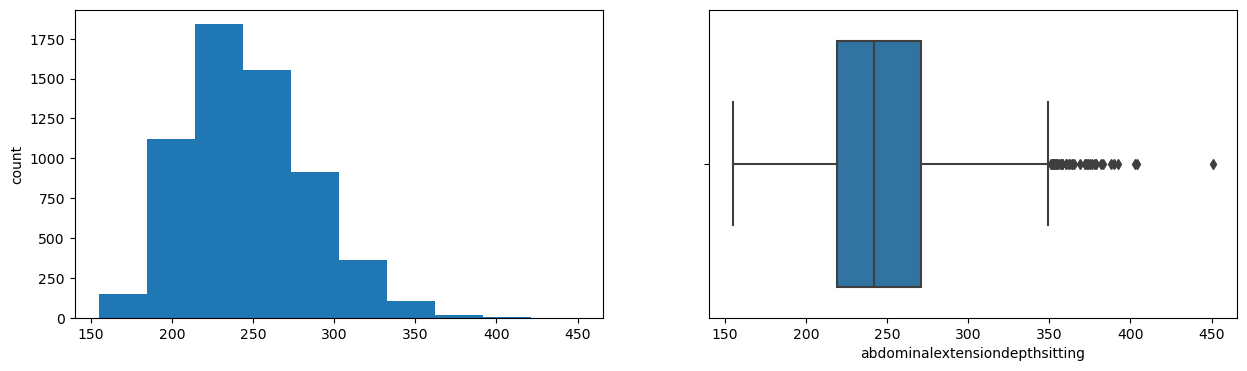

acromialheight
Skew : -0.04


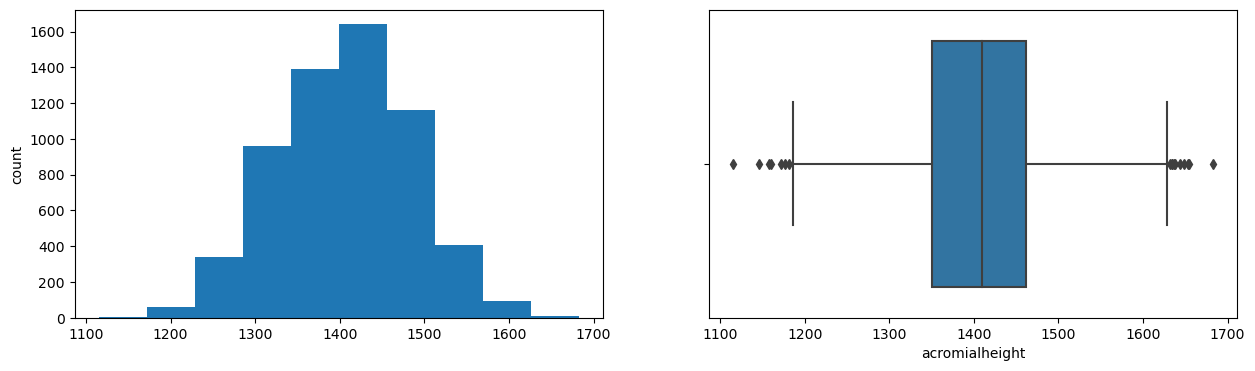

acromionradialelength
Skew : -0.05


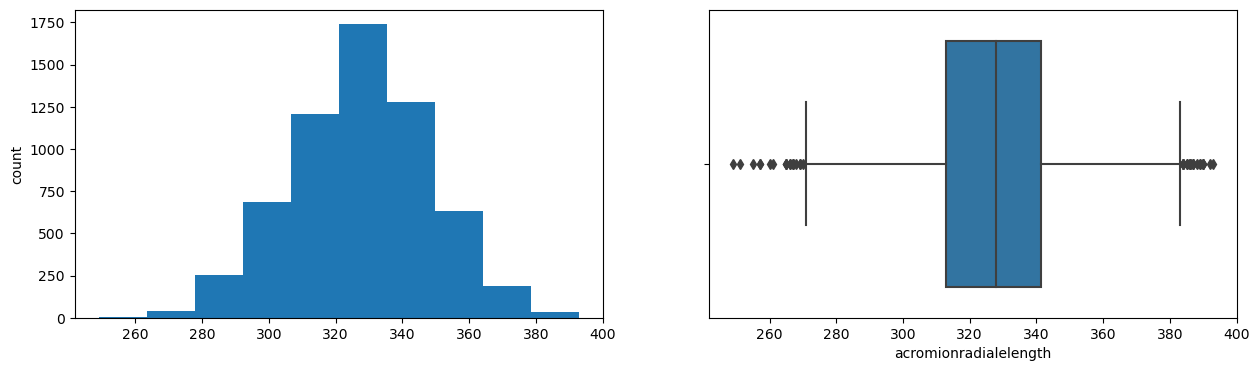

anklecircumference
Skew : 0.18


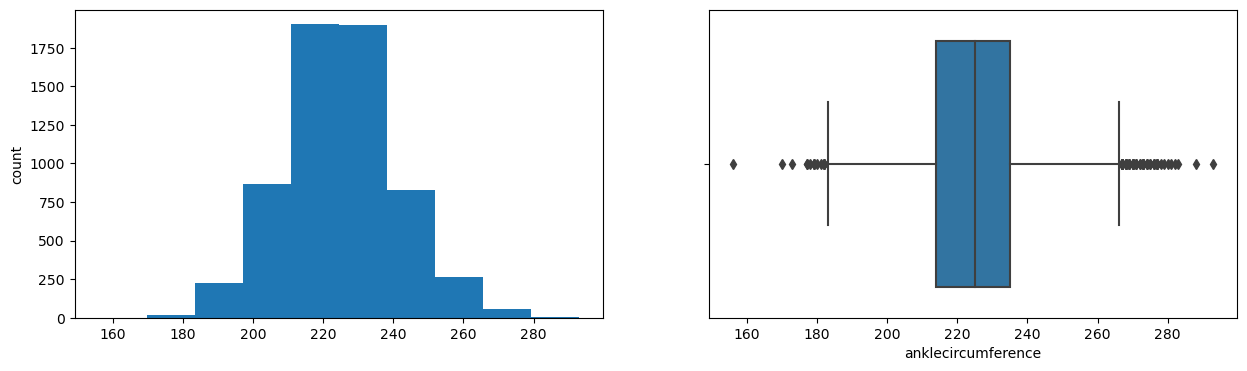

axillaheight
Skew : -0.02


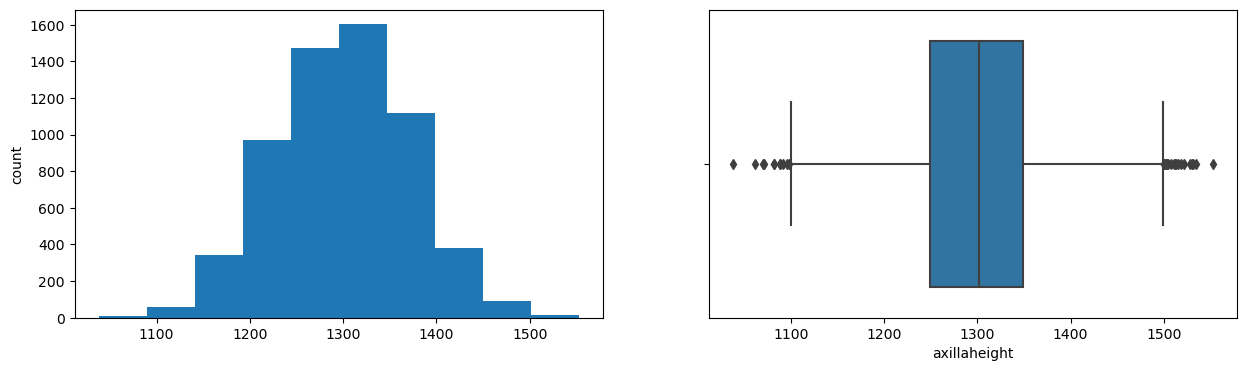

balloffootcircumference
Skew : -0.05


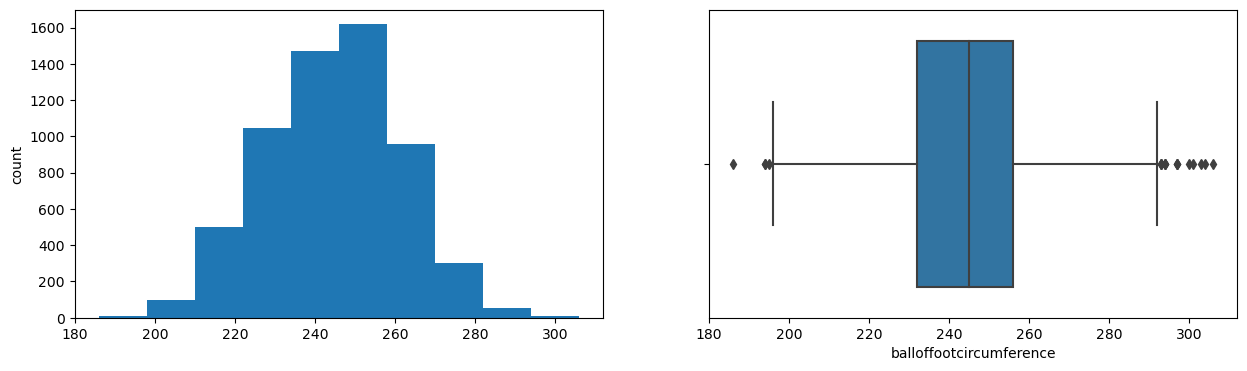

balloffootlength
Skew : -0.08


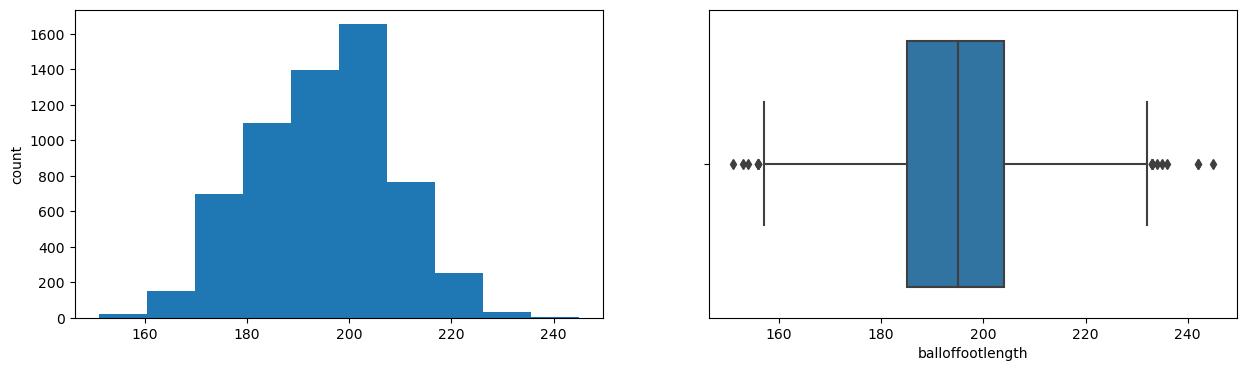

biacromialbreadth
Skew : -0.3


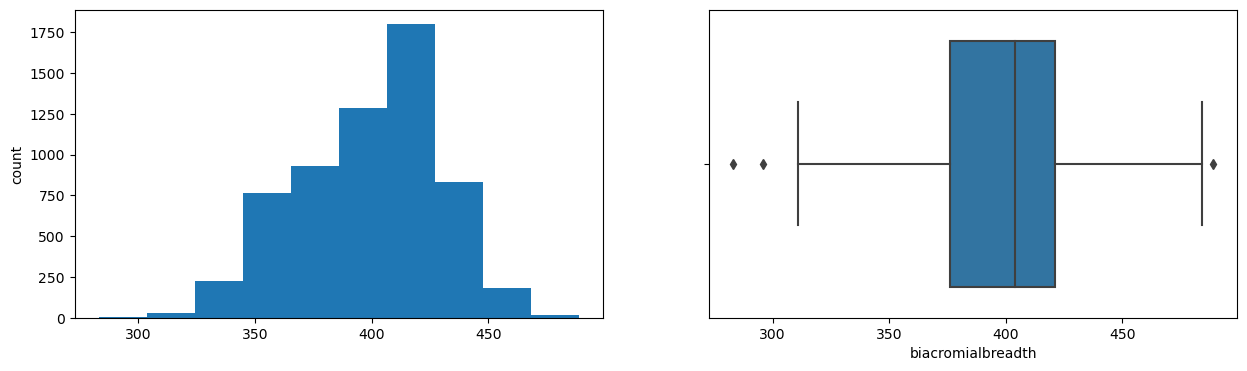

bicepscircumferenceflexed
Skew : 0.12


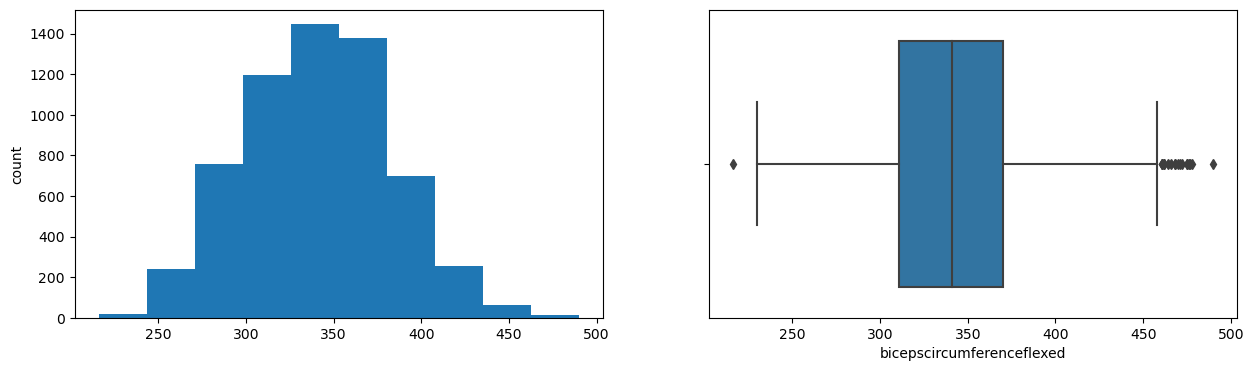

bicristalbreadth
Skew : 0.11


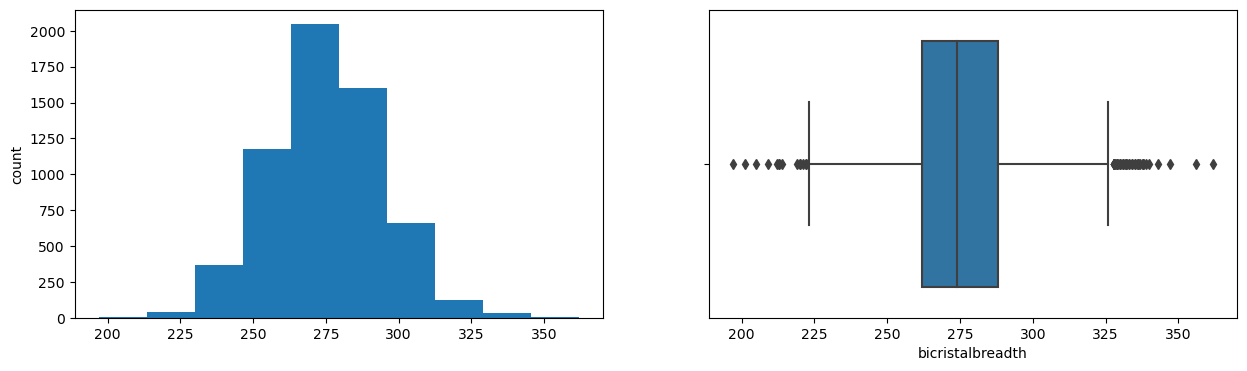

bideltoidbreadth
Skew : -0.01


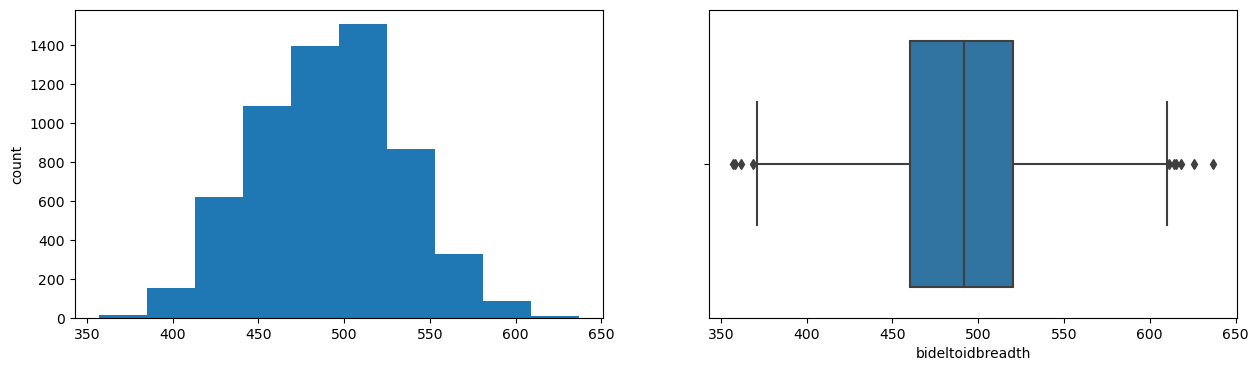

bimalleolarbreadth
Skew : -0.0


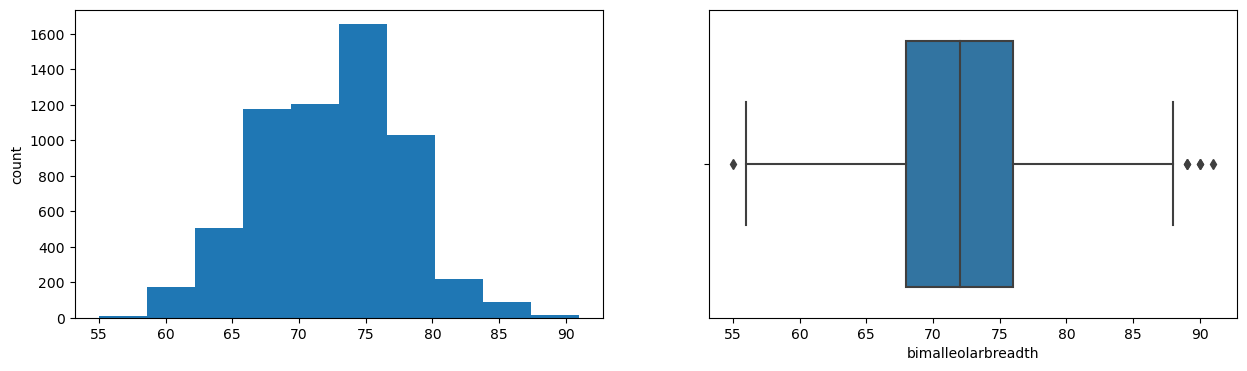

bitragionchinarc
Skew : -0.11


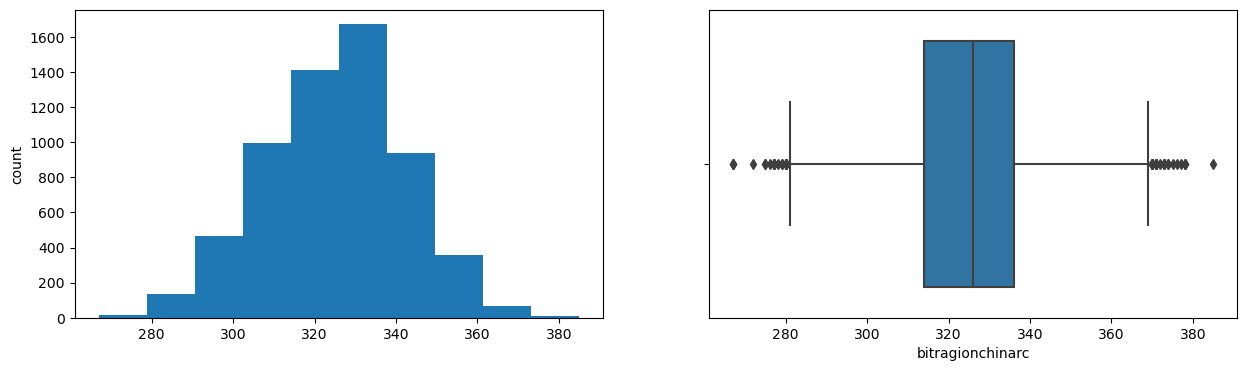

bitragionsubmandibulararc
Skew : -0.0


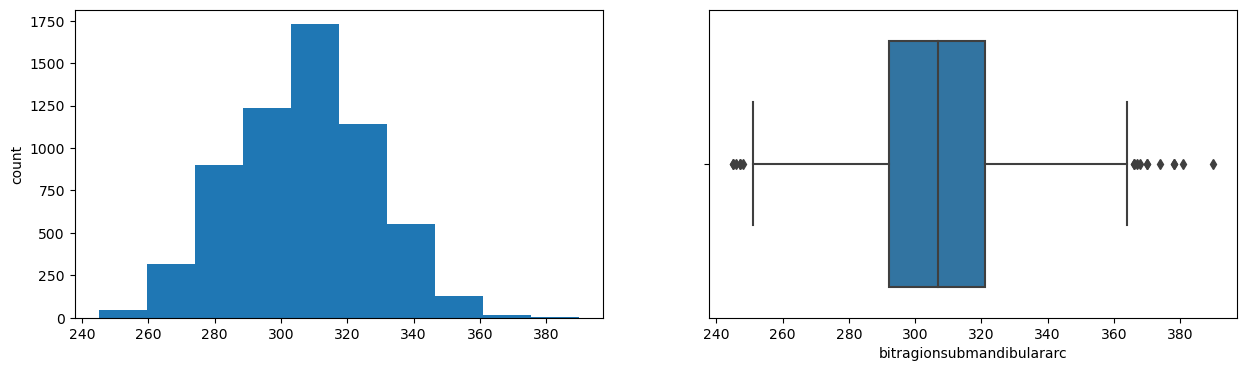

bizygomaticbreadth
Skew : 0.06


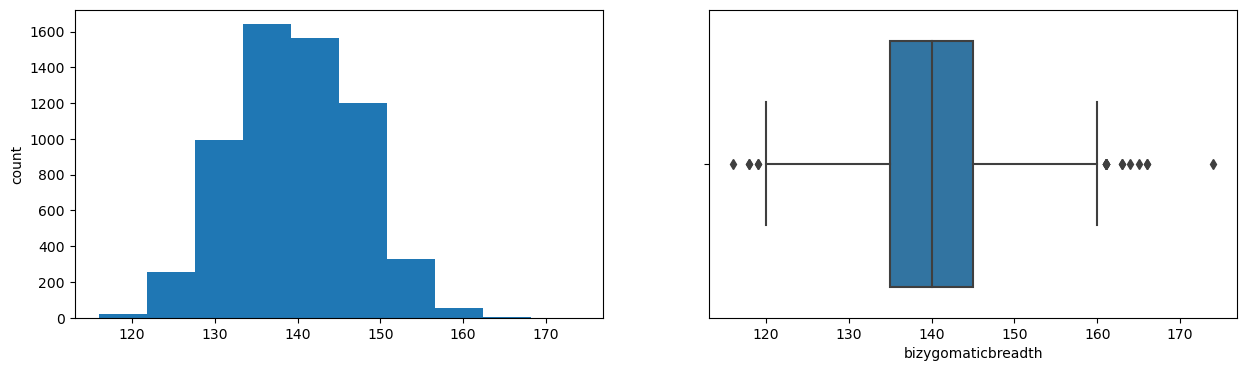

buttockcircumference
Skew : 0.28


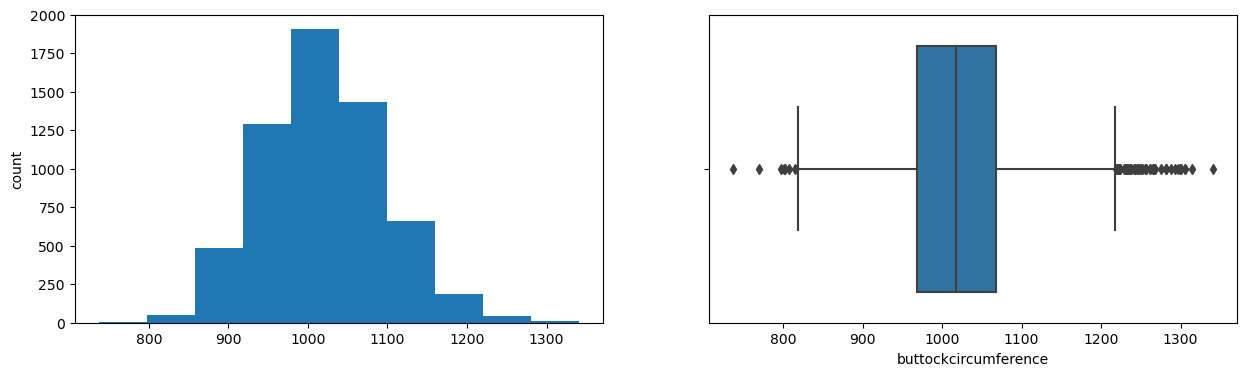

buttockdepth
Skew : 0.34


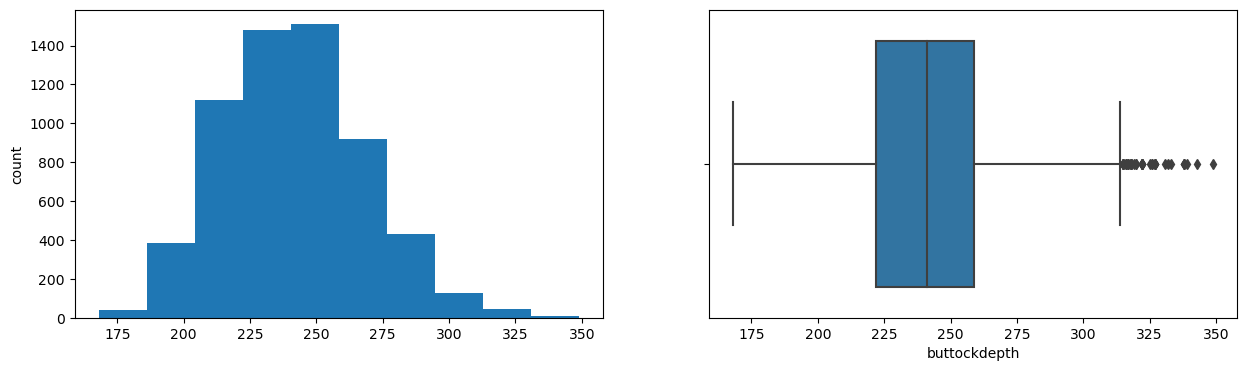

buttockheight
Skew : 0.15


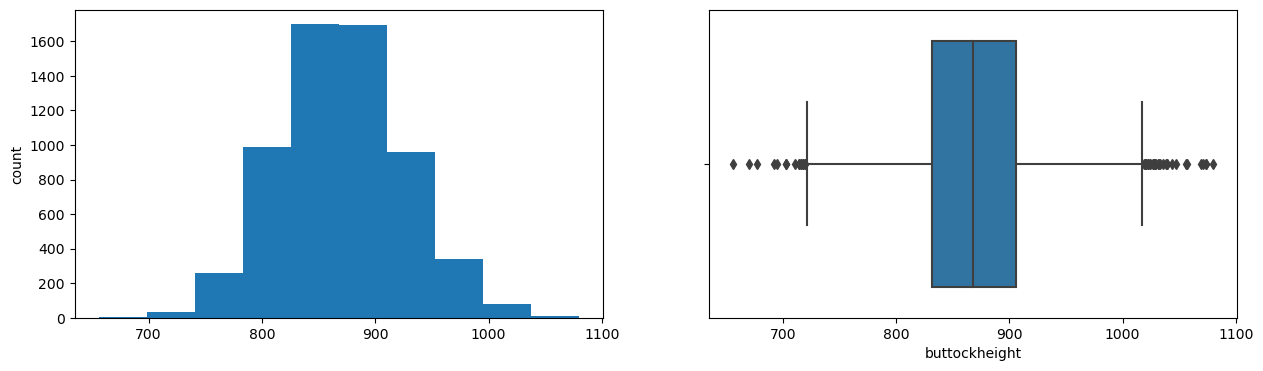

buttockkneelength
Skew : 0.03


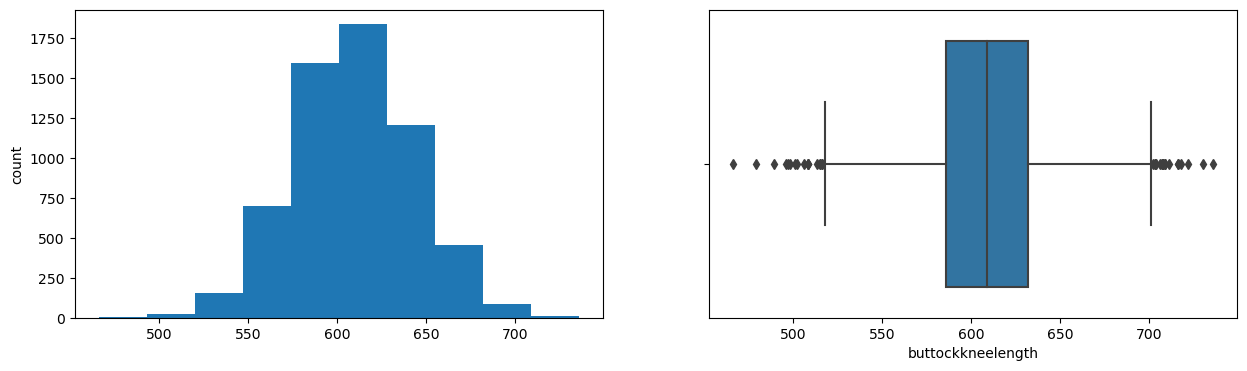

buttockpopliteallength
Skew : 0.07


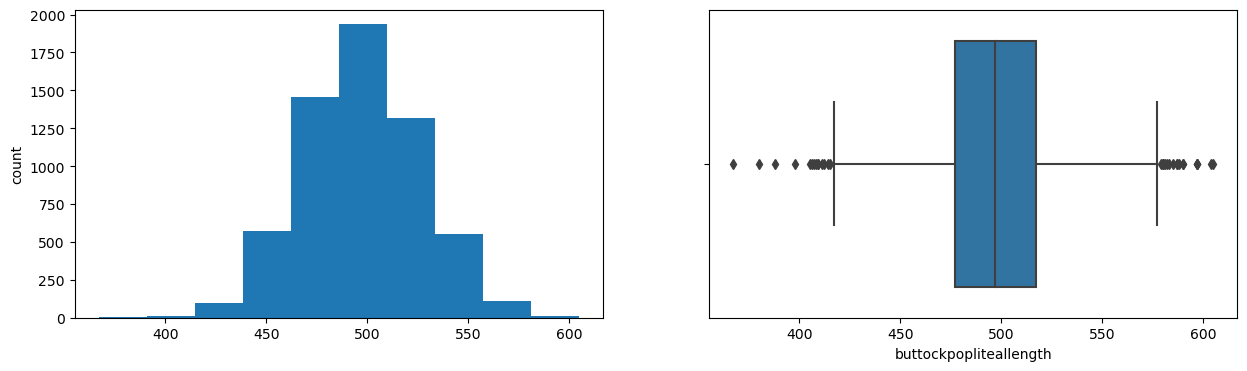

calfcircumference
Skew : 0.25


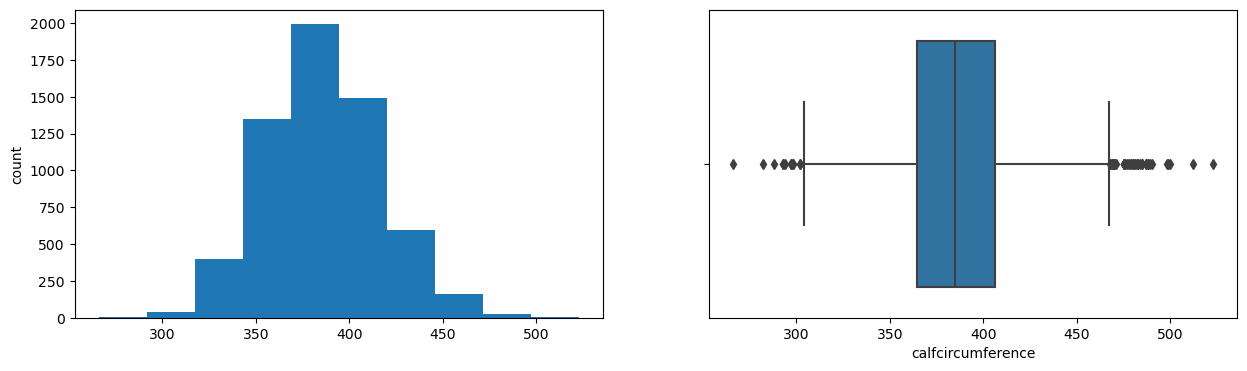

cervicaleheight
Skew : -0.13


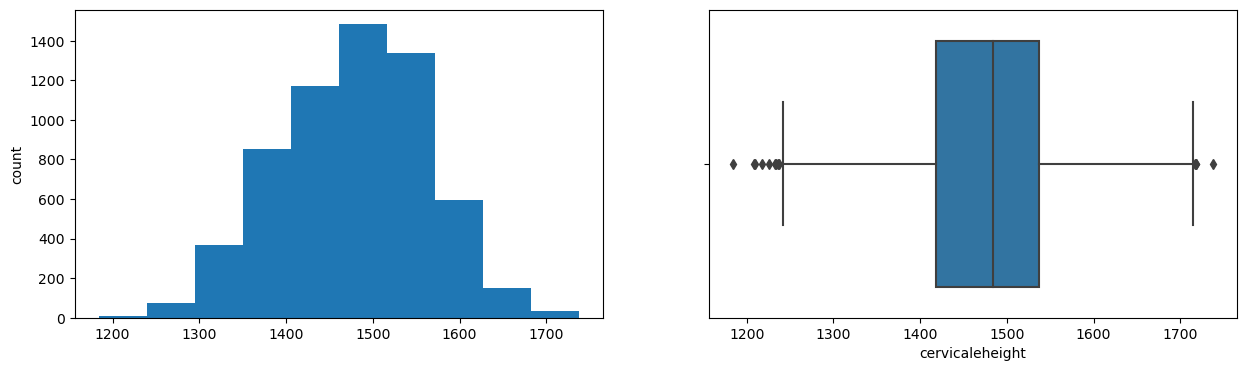

chestbreadth
Skew : 0.06


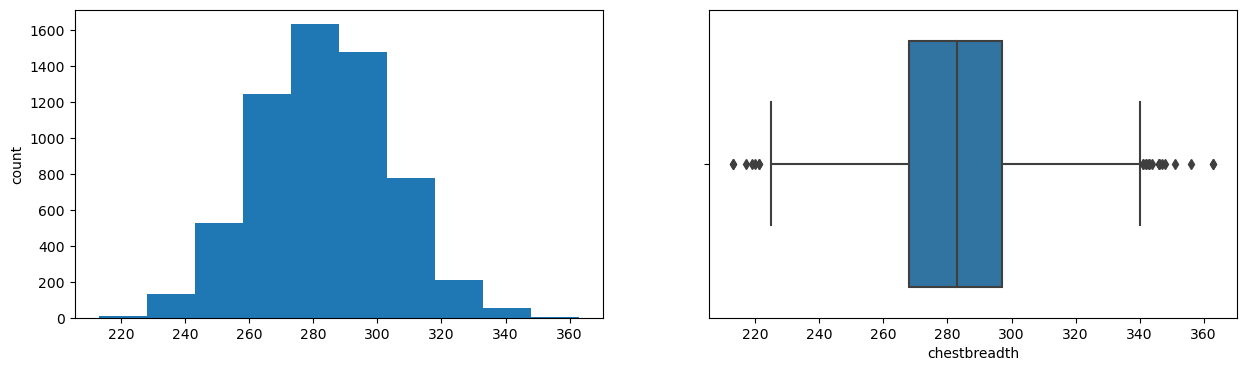

chestcircumference
Skew : 0.13


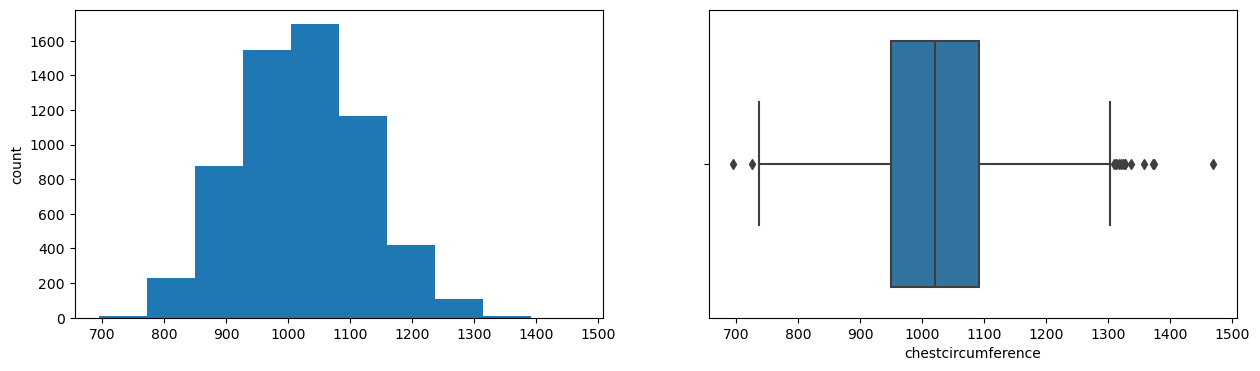

chestdepth
Skew : 0.2


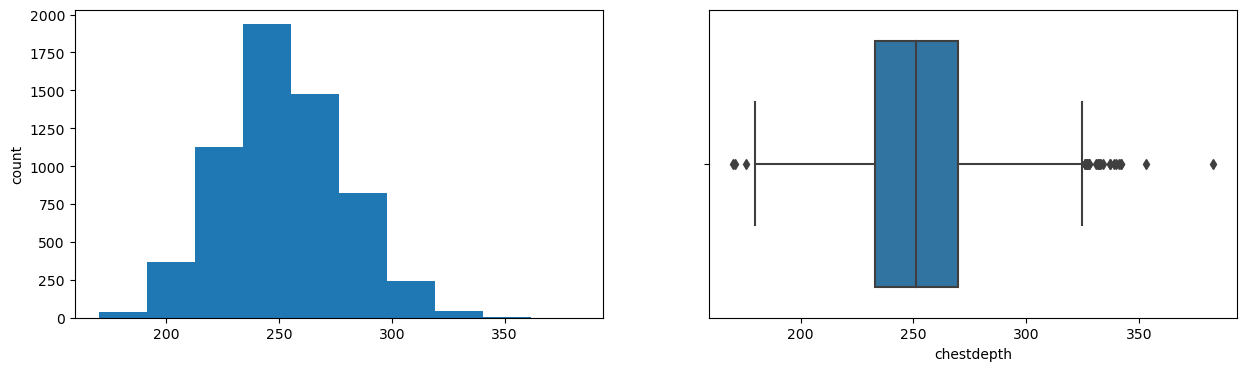

chestheight
Skew : -0.19


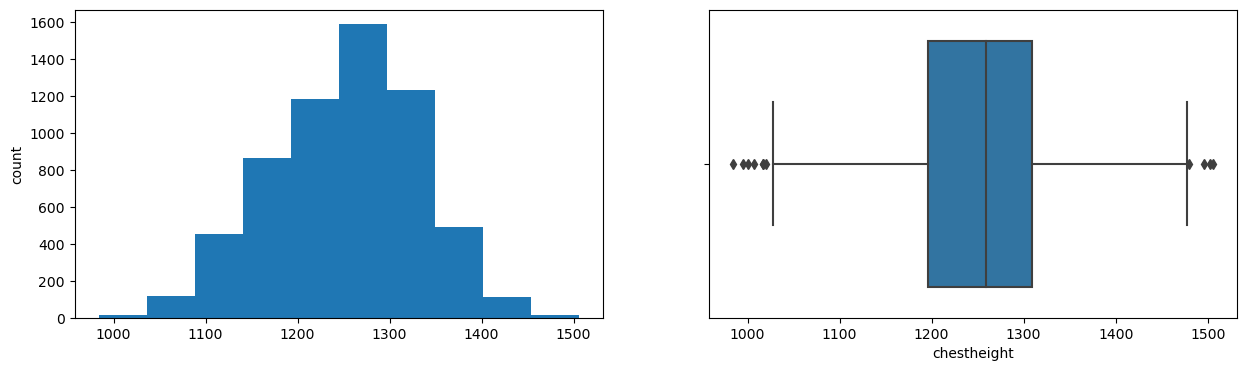

crotchheight
Skew : 0.03


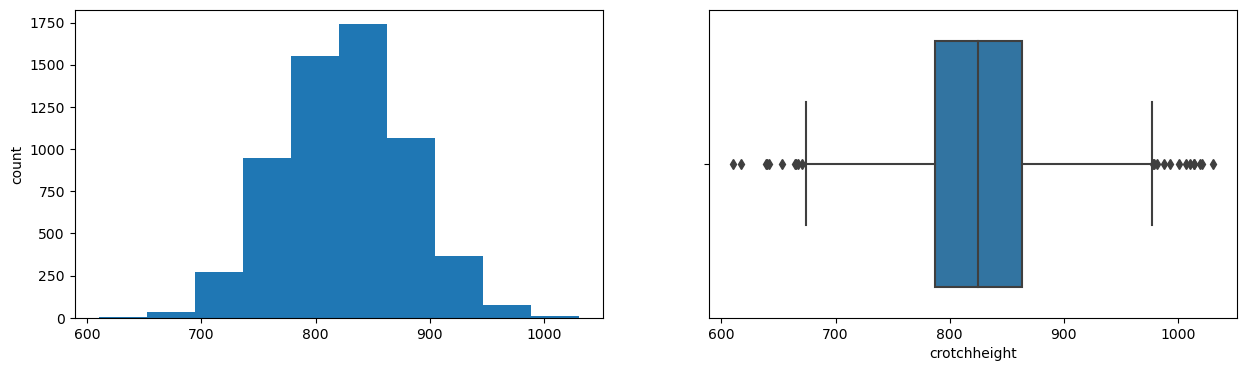

crotchlengthomphalion
Skew : 0.25


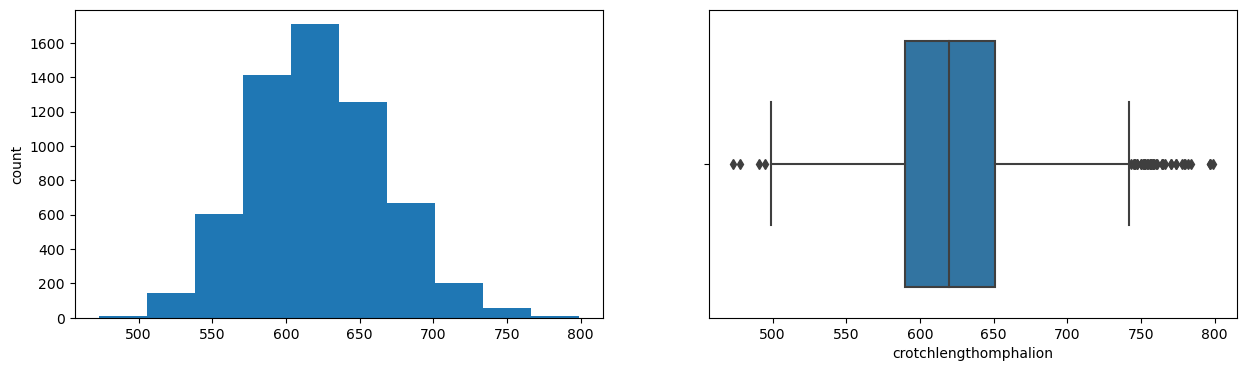

crotchlengthposterioromphalion
Skew : 0.17


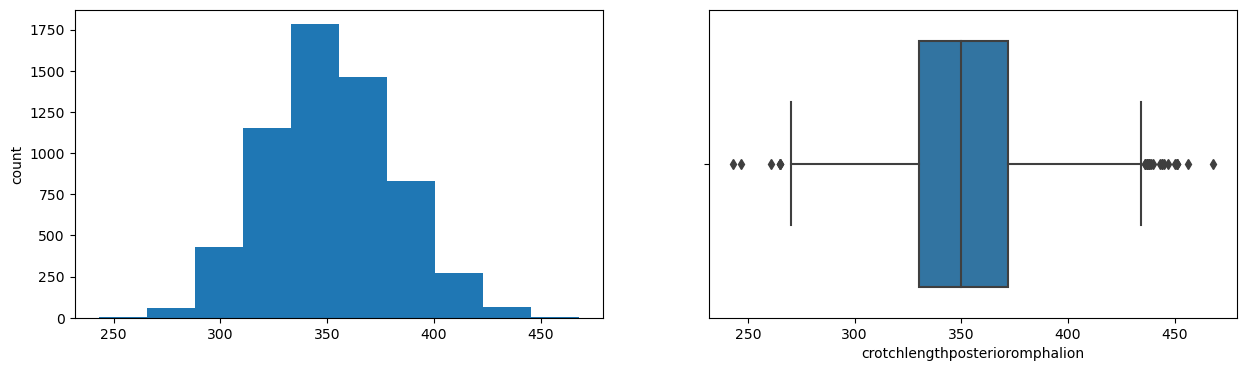

earbreadth
Skew : 0.13


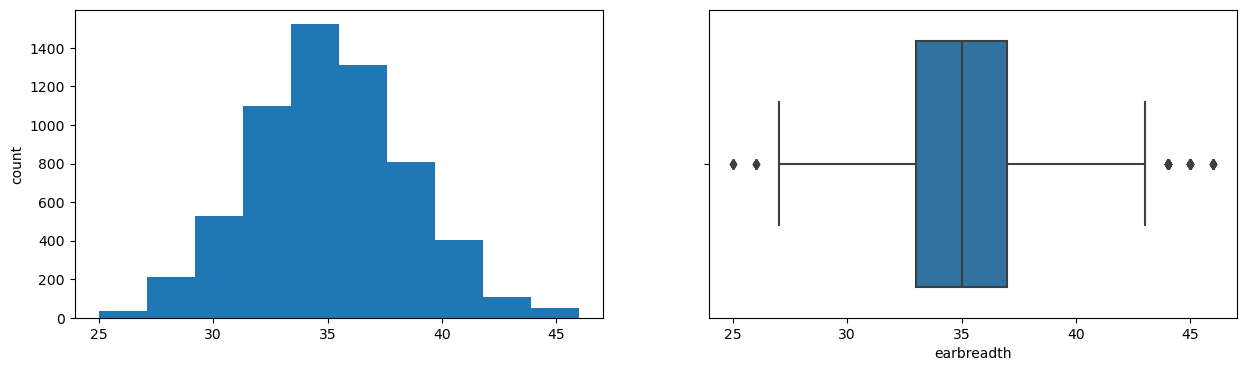

earlength
Skew : 0.17


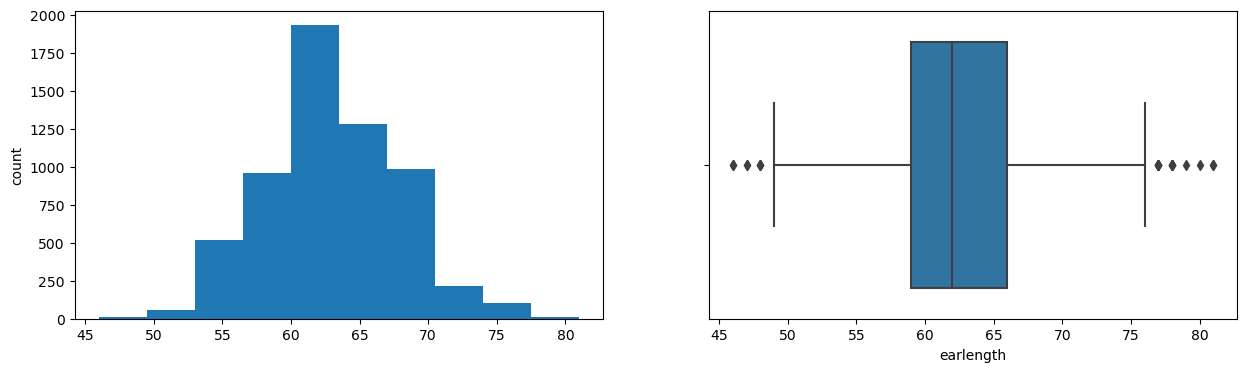

earprotrusion
Skew : 0.32


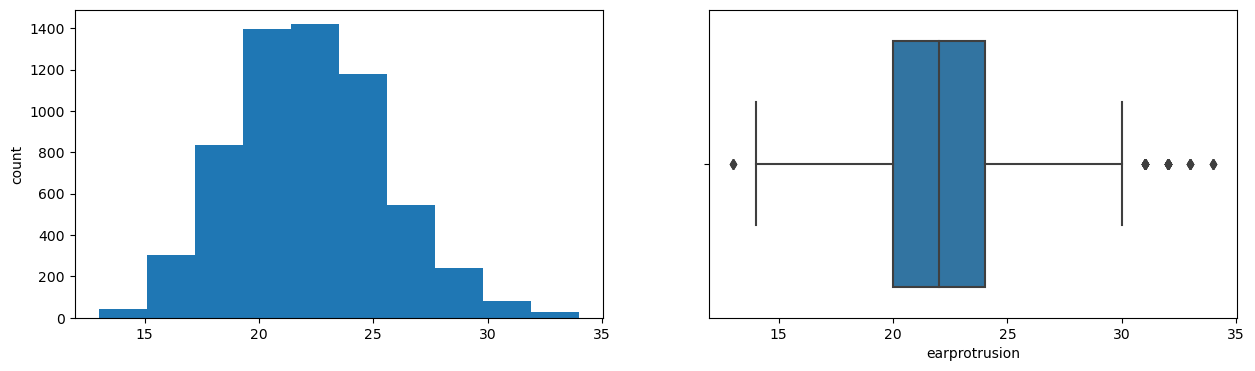

elbowrestheight
Skew : -0.06


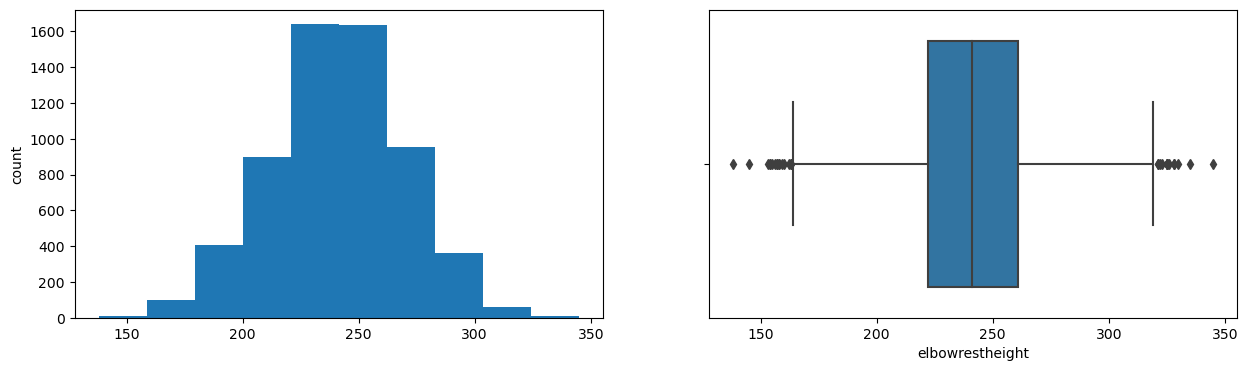

eyeheightsitting
Skew : -0.09


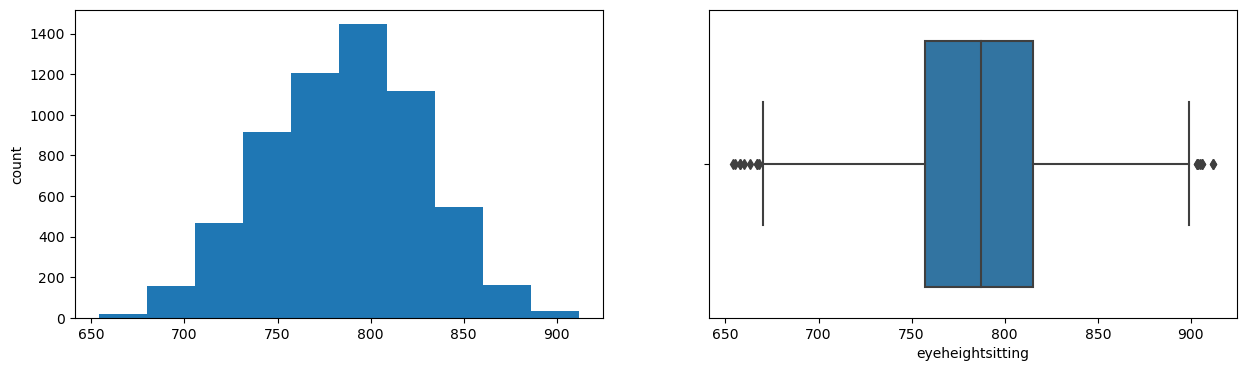

footbreadthhorizontal
Skew : -0.0


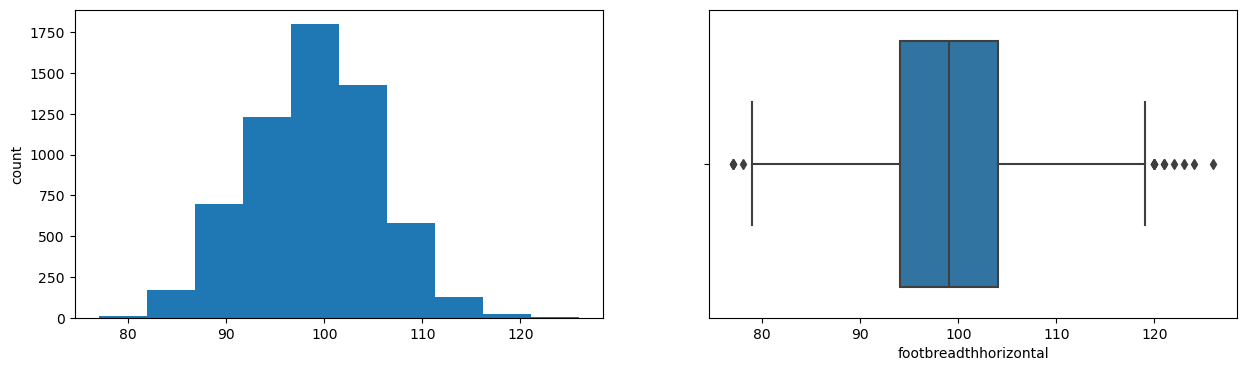

footlength
Skew : -0.14


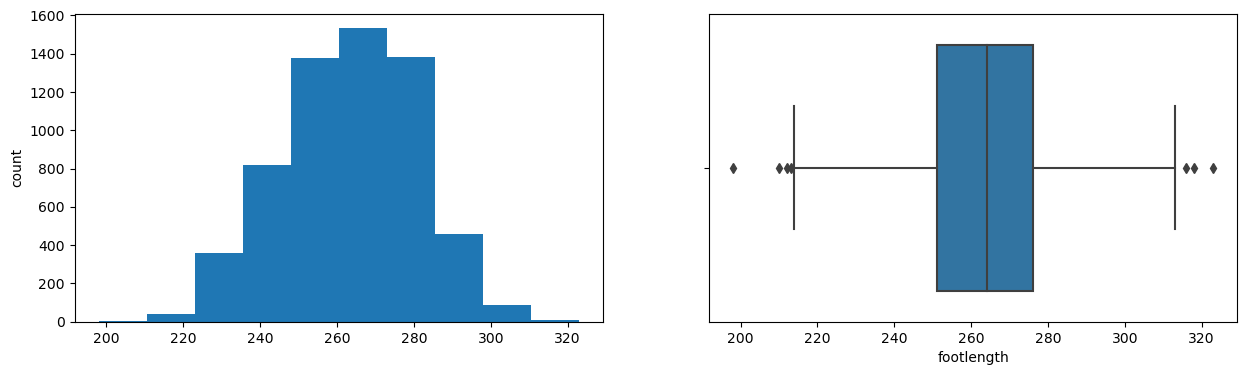

forearmcenterofgriplength
Skew : -0.08


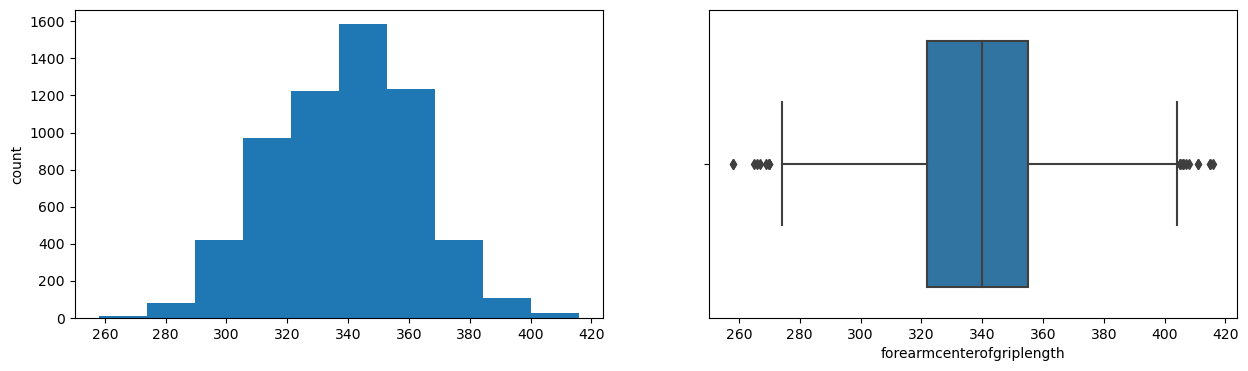

forearmcircumferenceflexed
Skew : -0.03


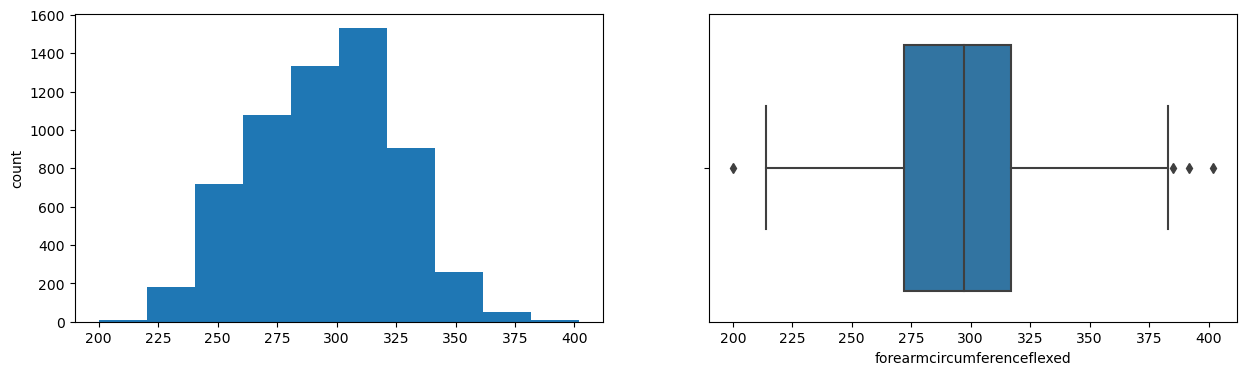

forearmforearmbreadth
Skew : 0.09


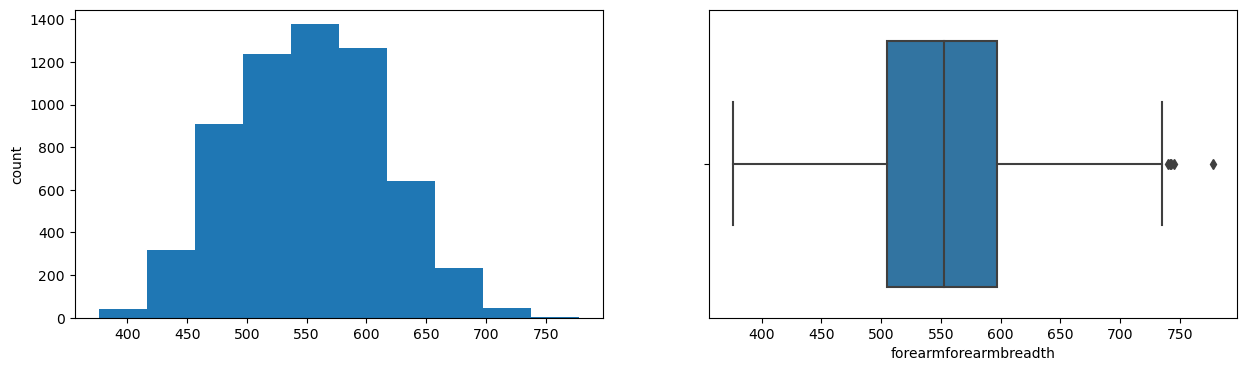

forearmhandlength
Skew : -0.07


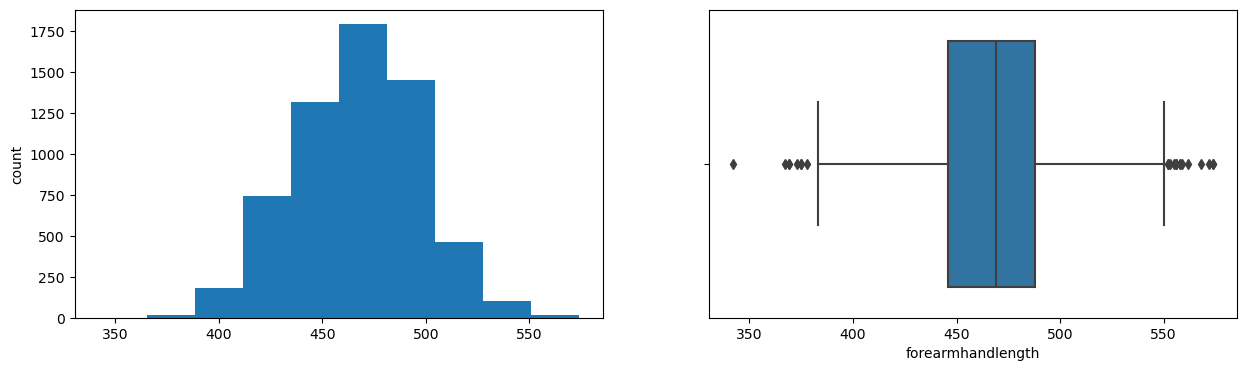

functionalleglength
Skew : -0.06


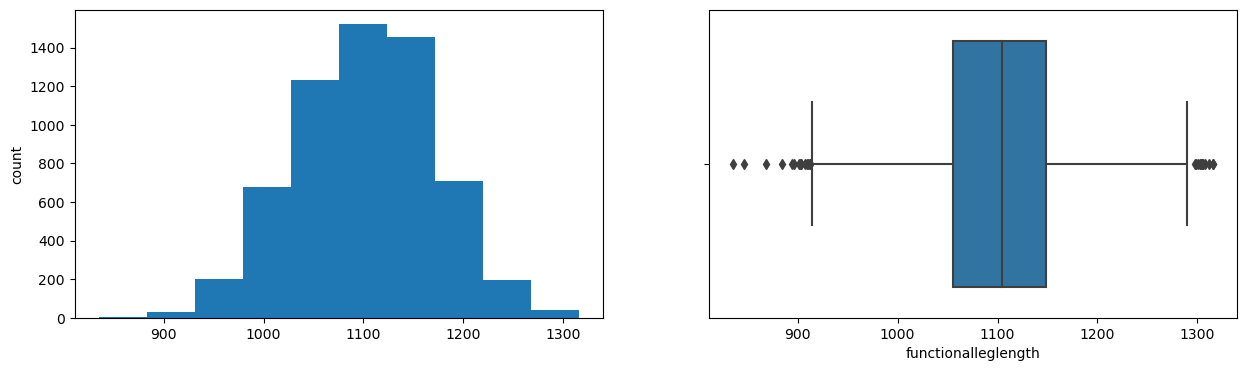

handbreadth
Skew : -0.15


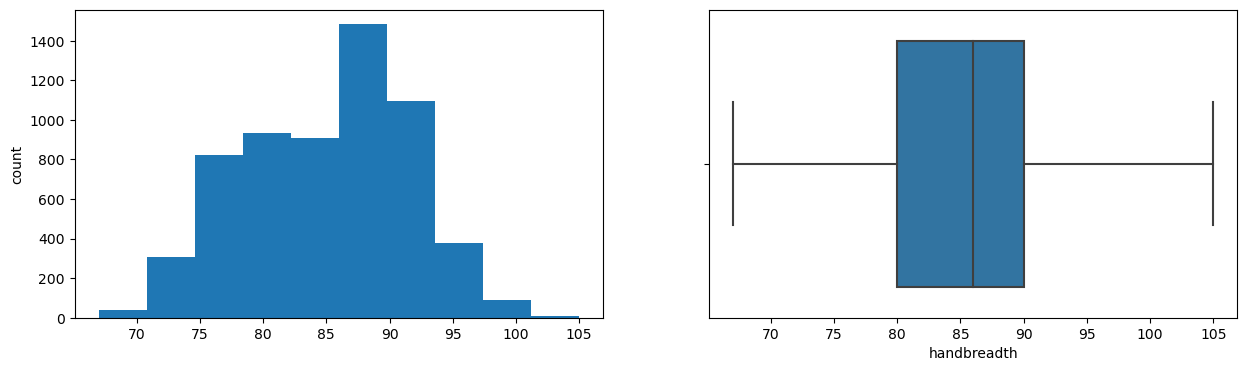

handcircumference
Skew : -0.2


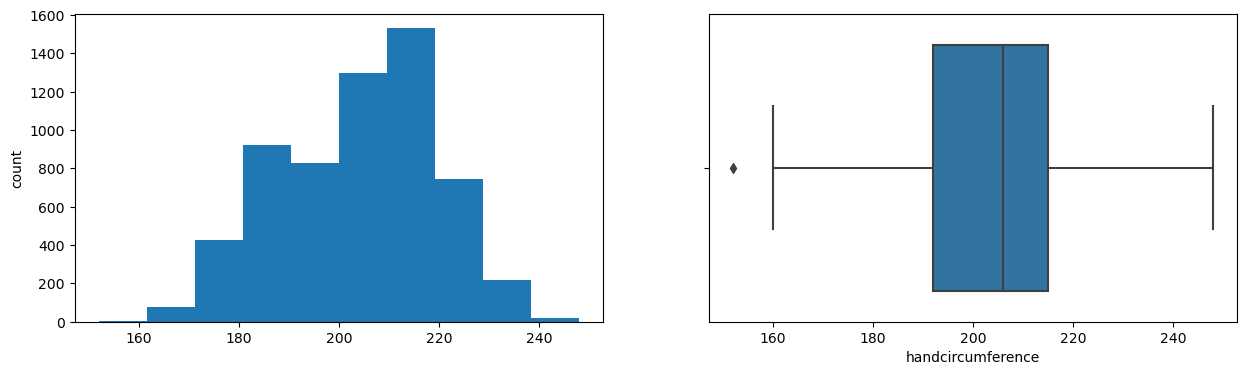

handlength
Skew : 0.07


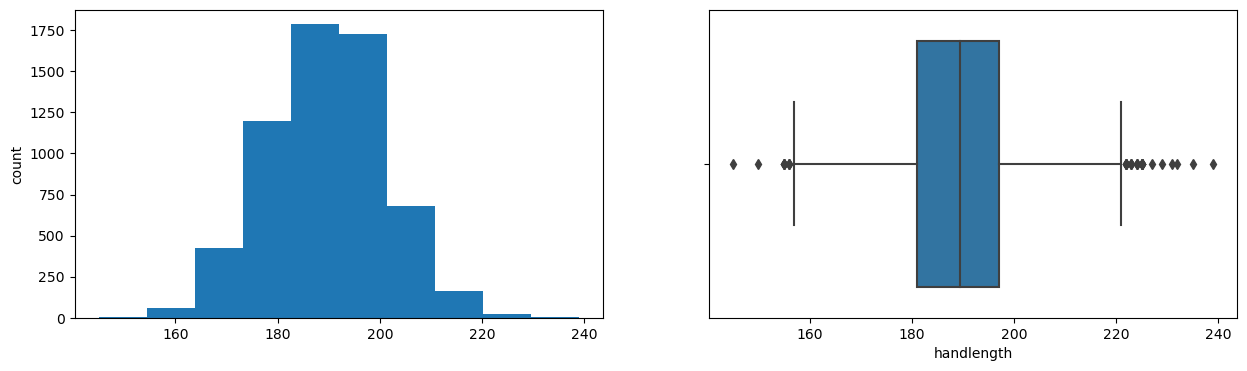

headbreadth
Skew : 0.12


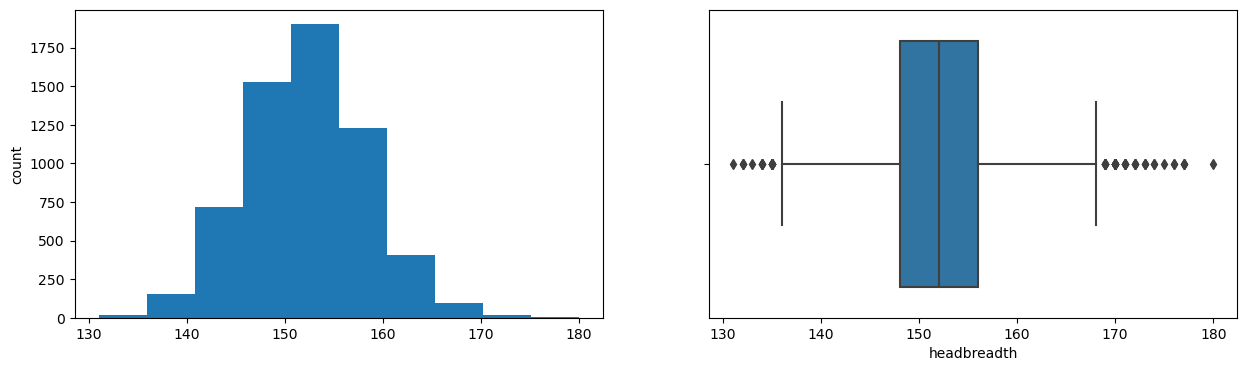

headcircumference
Skew : 0.02


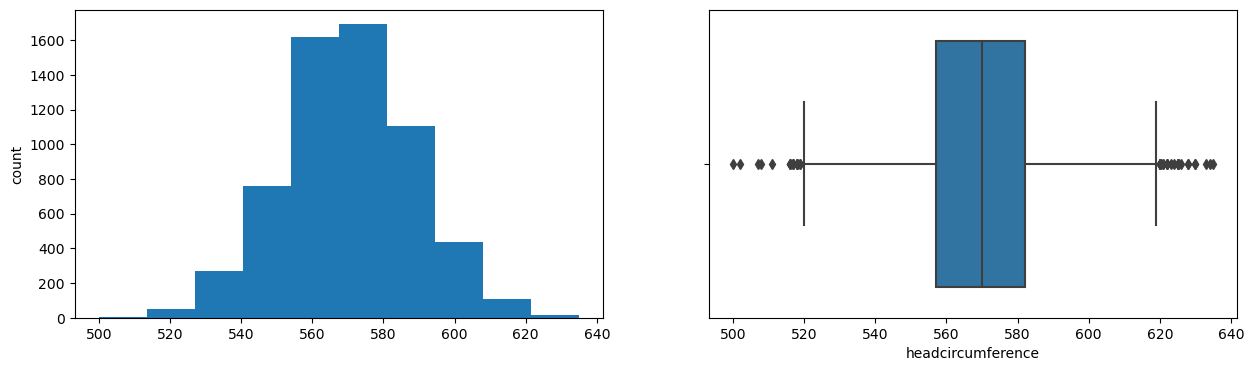

headlength
Skew : -0.19


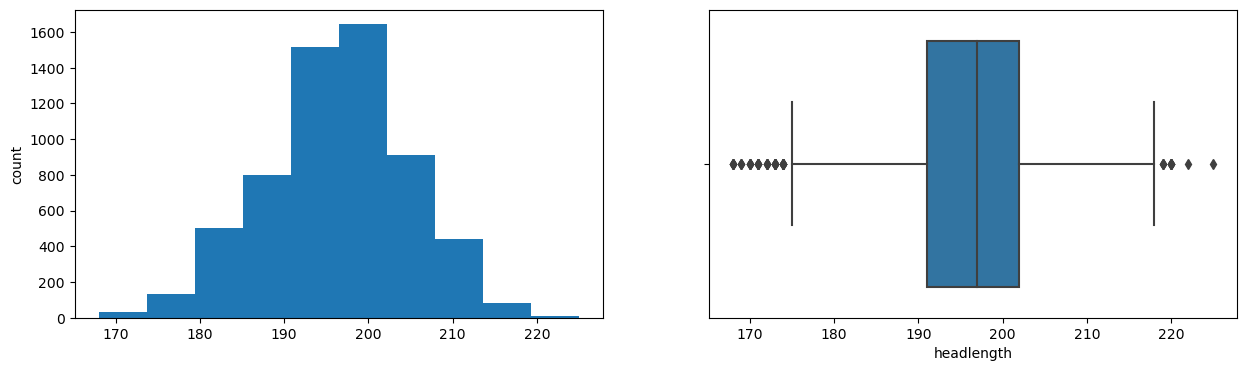

heelanklecircumference
Skew : -0.1


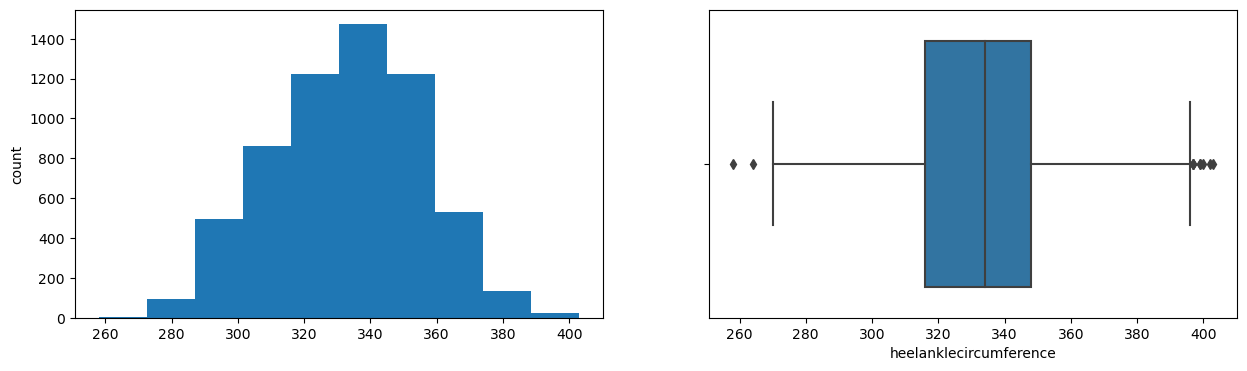

heelbreadth
Skew : 0.27


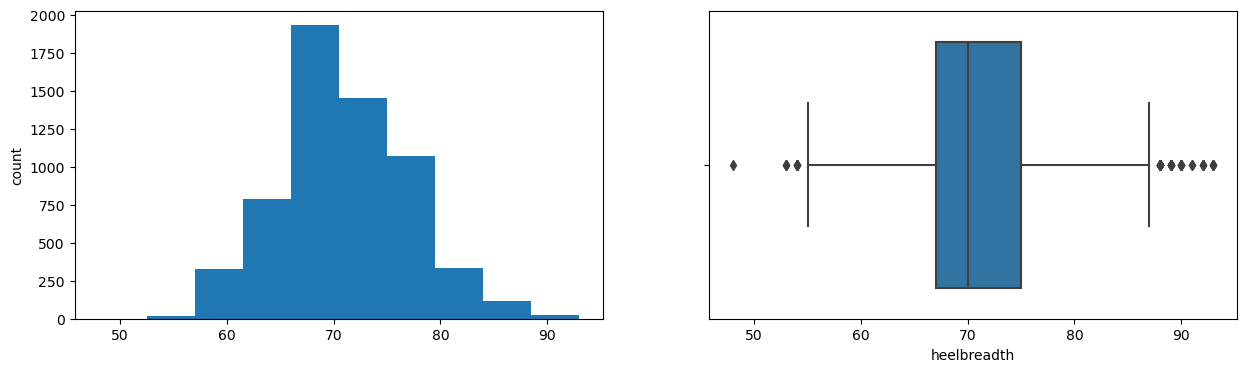

hipbreadth
Skew : 0.38


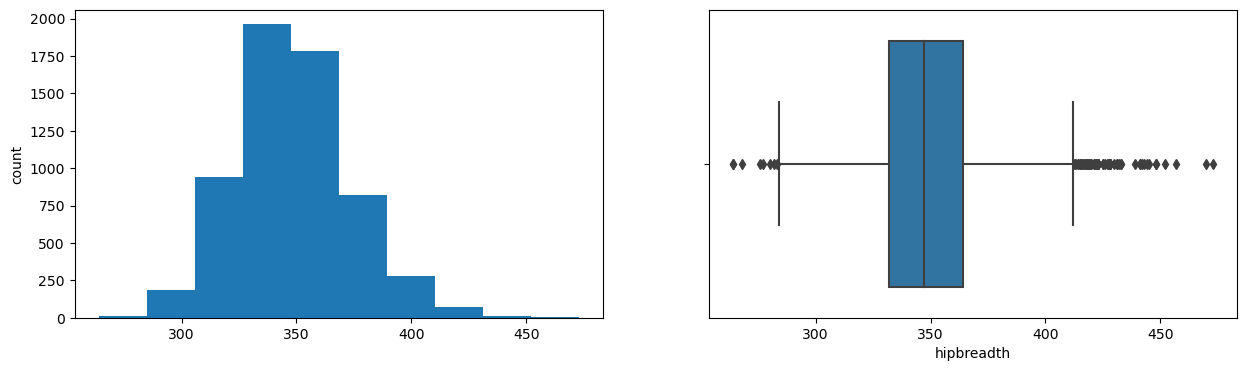

hipbreadthsitting
Skew : 0.42


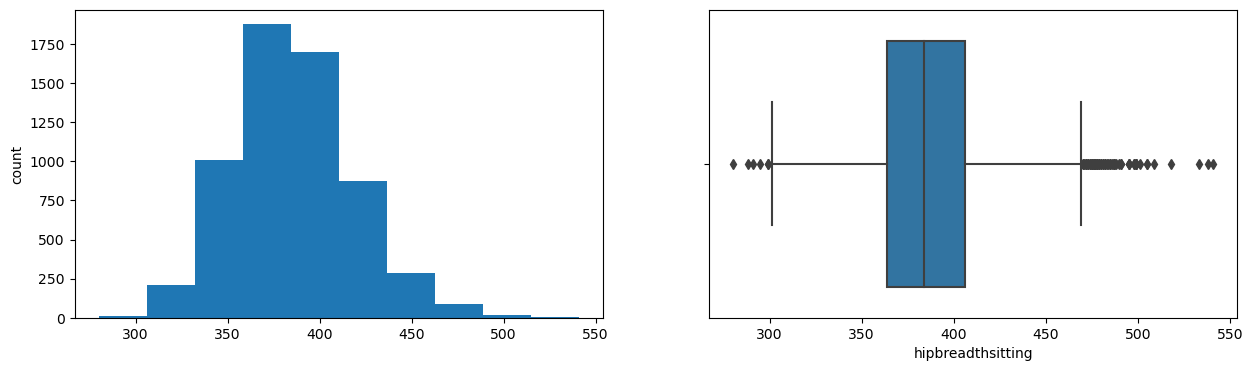

iliocristaleheight
Skew : 0.03


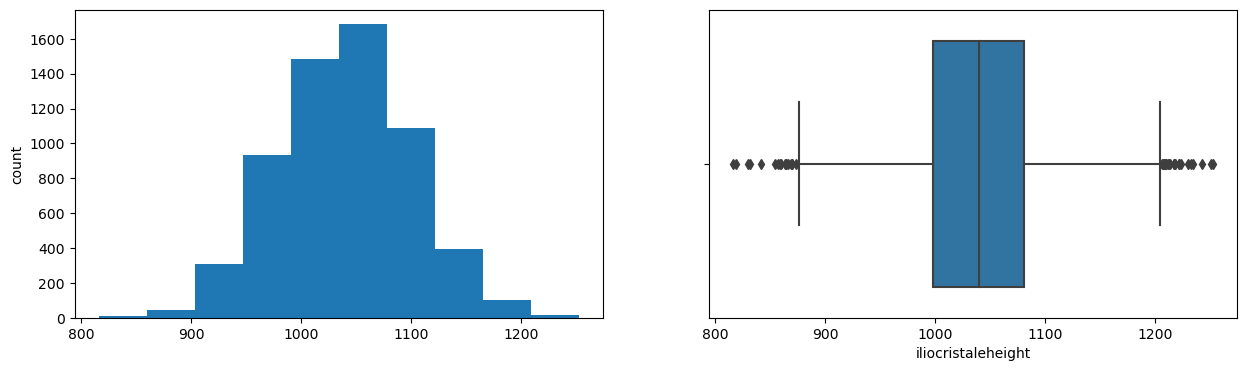

interpupillarybreadth
Skew : 0.02


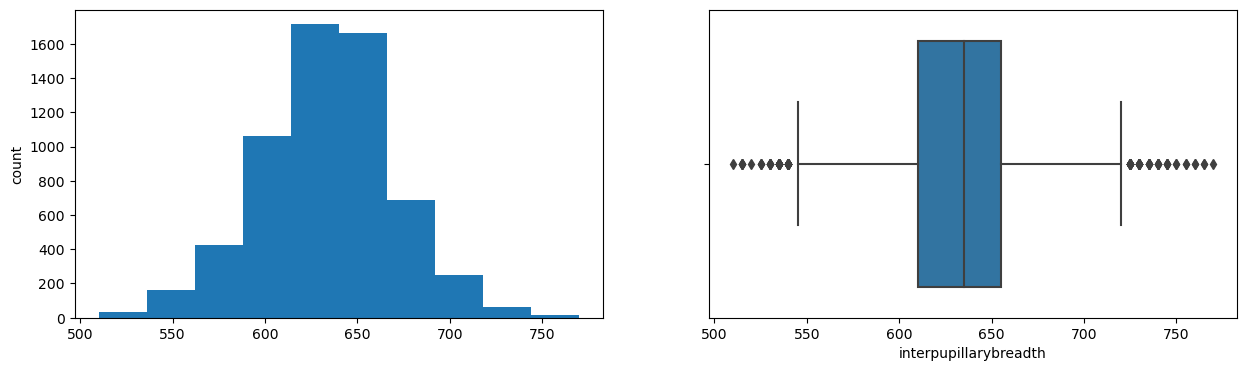

interscyei
Skew : 0.05


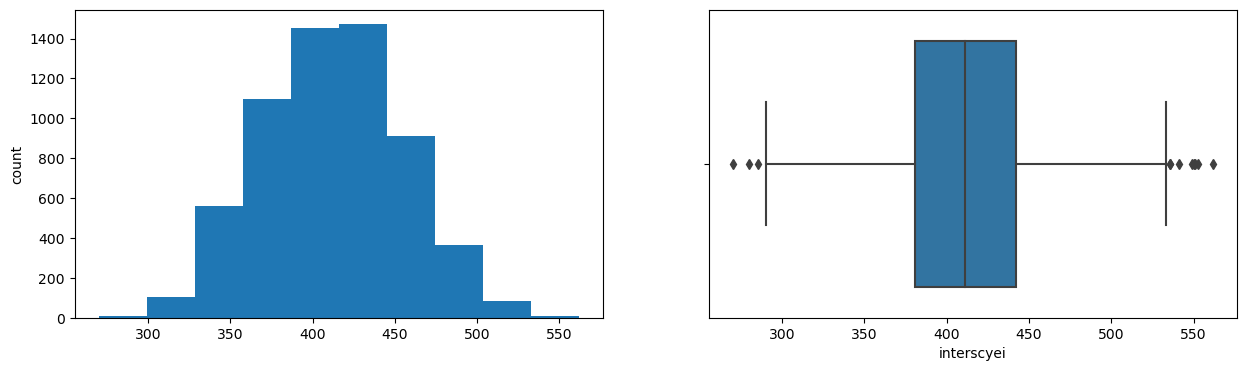

interscyeii
Skew : -0.03


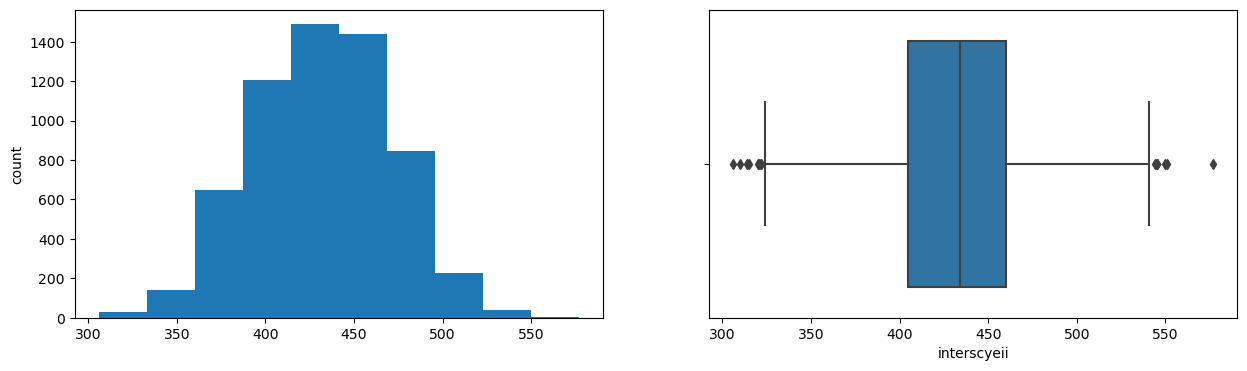

kneeheightmidpatella
Skew : 0.05


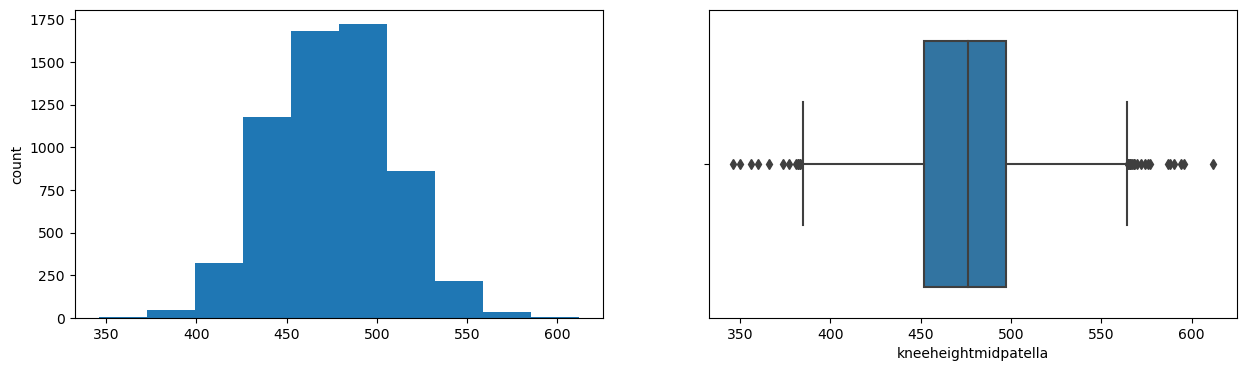

kneeheightsitting
Skew : -0.03


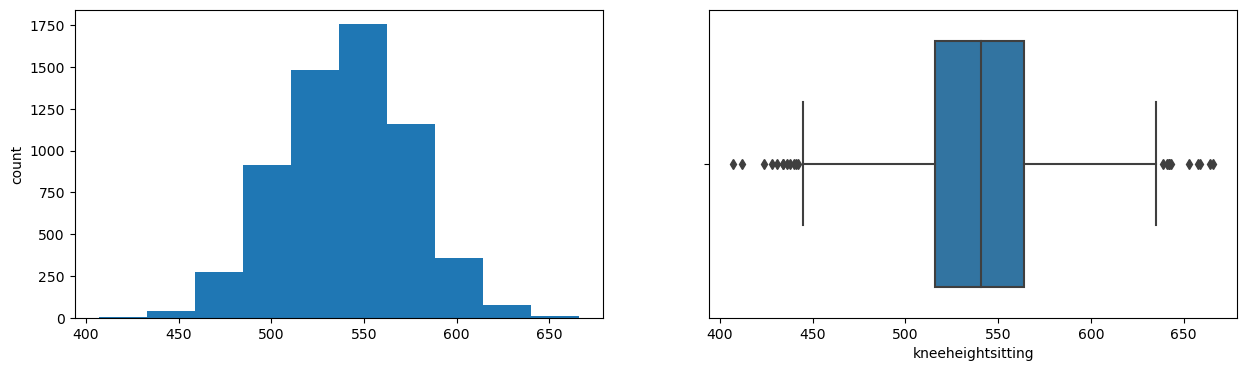

lateralfemoralepicondyleheight
Skew : 0.03


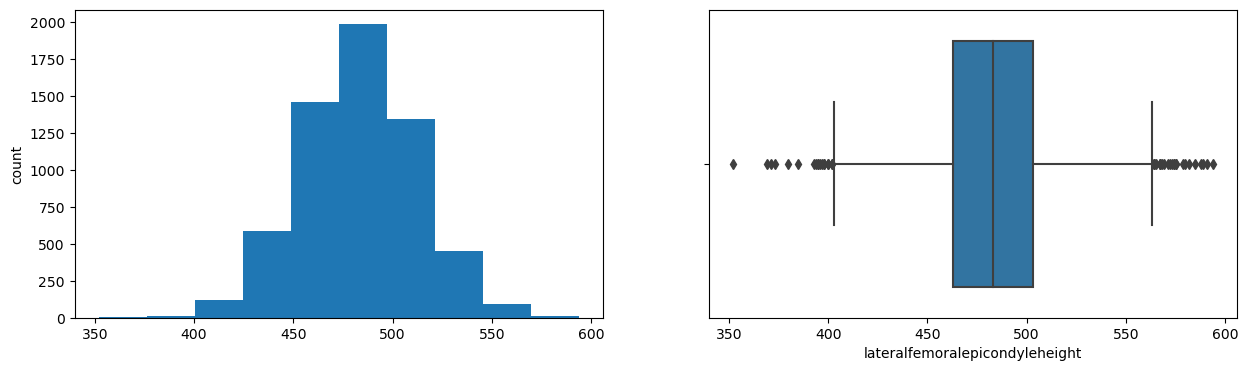

lateralmalleolusheight
Skew : -0.06


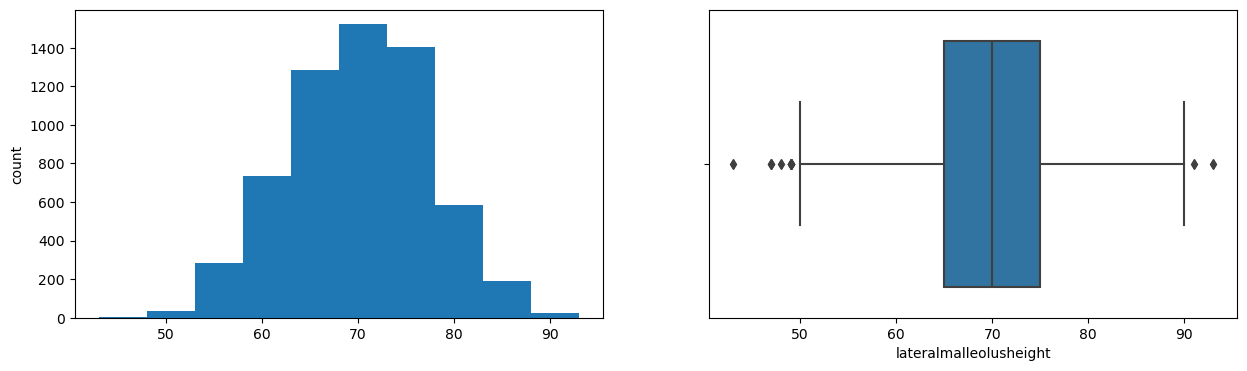

lowerthighcircumference
Skew : 0.32


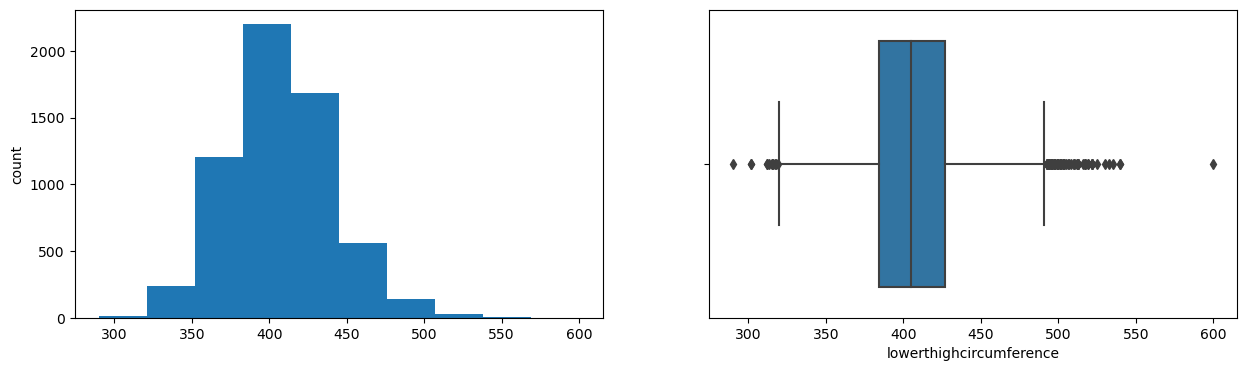

mentonsellionlength
Skew : -0.0


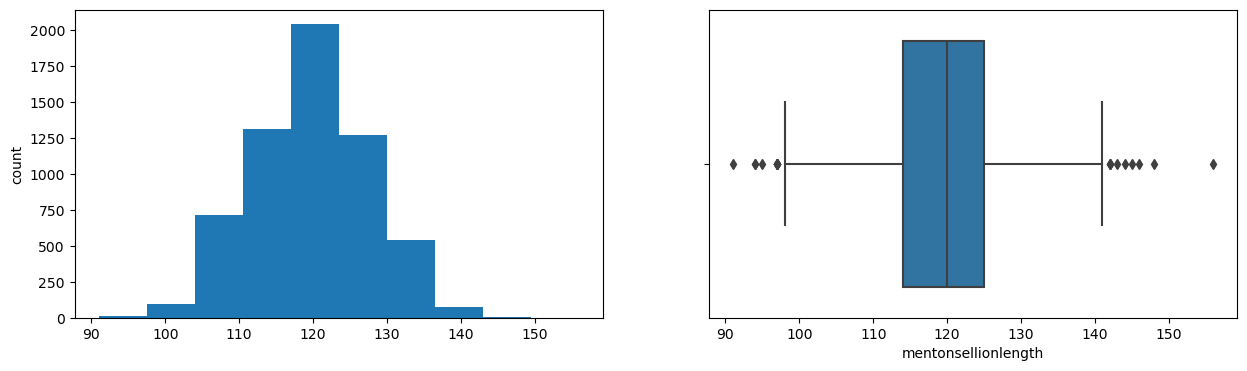

neckcircumference
Skew : -0.06


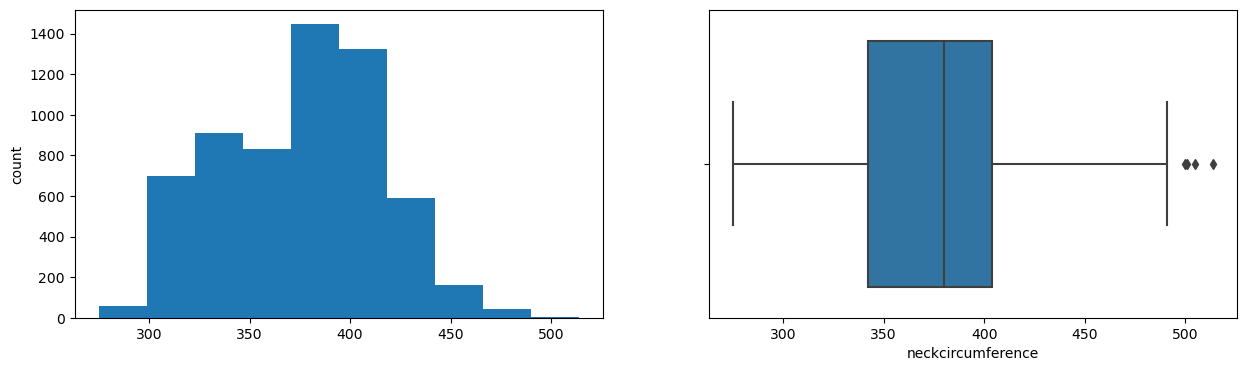

neckcircumferencebase
Skew : -0.06


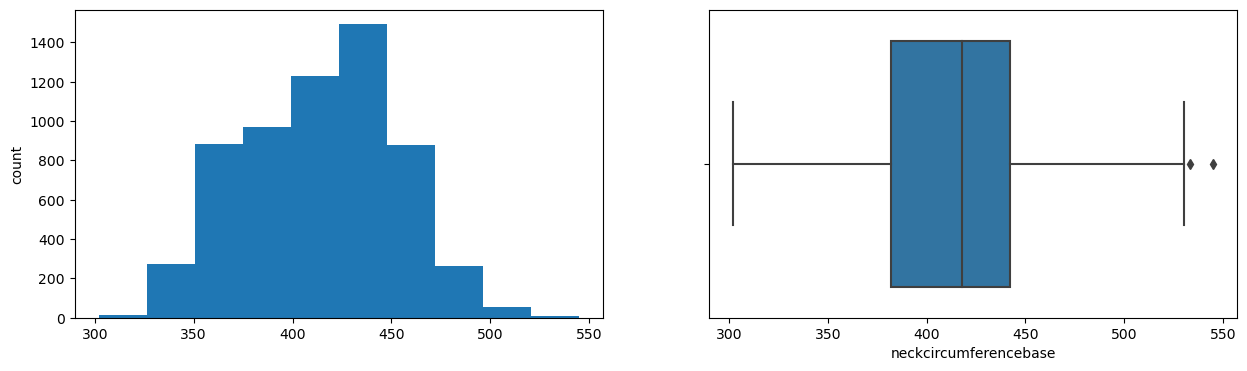

overheadfingertipreachsitting
Skew : -0.08


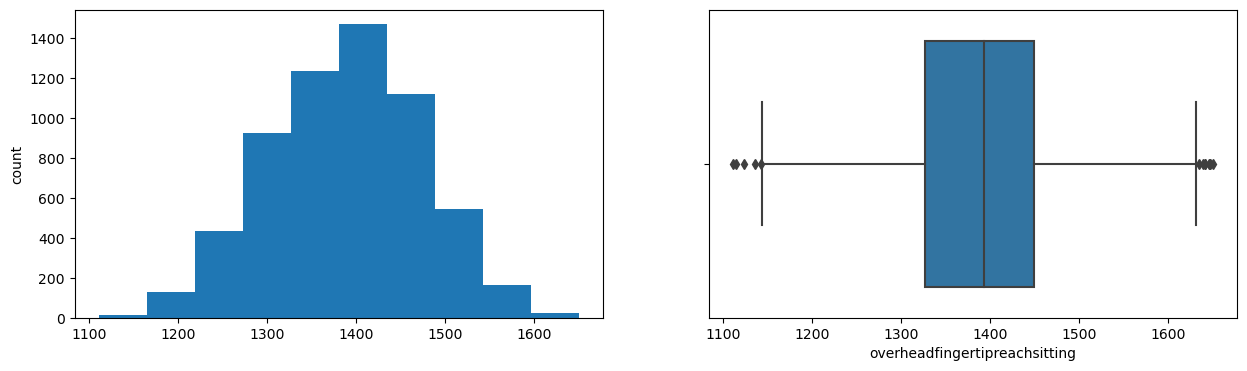

palmlength
Skew : 0.13


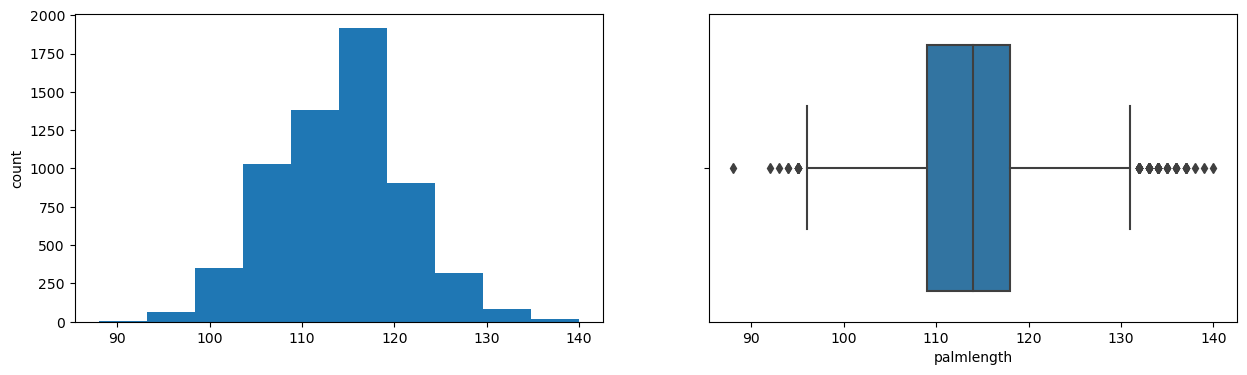

poplitealheight
Skew : -0.07


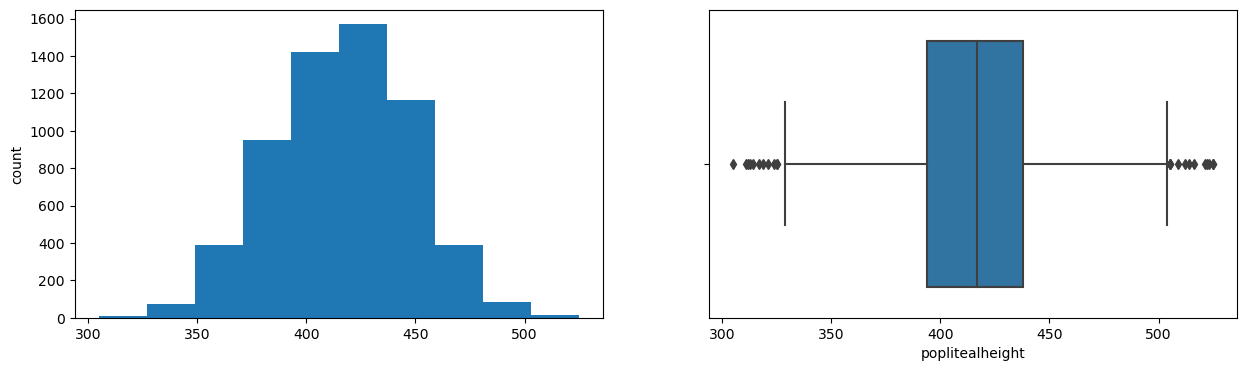

radialestylionlength
Skew : -0.06


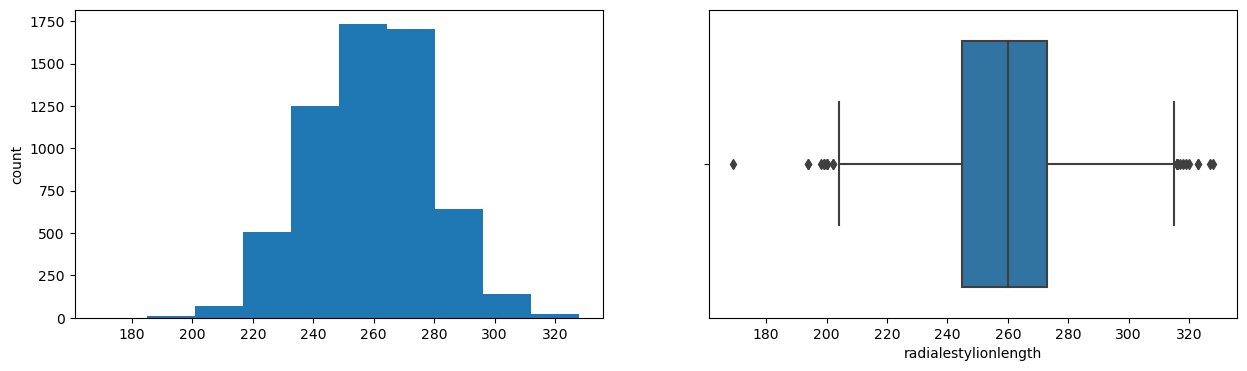

shouldercircumference
Skew : -0.12


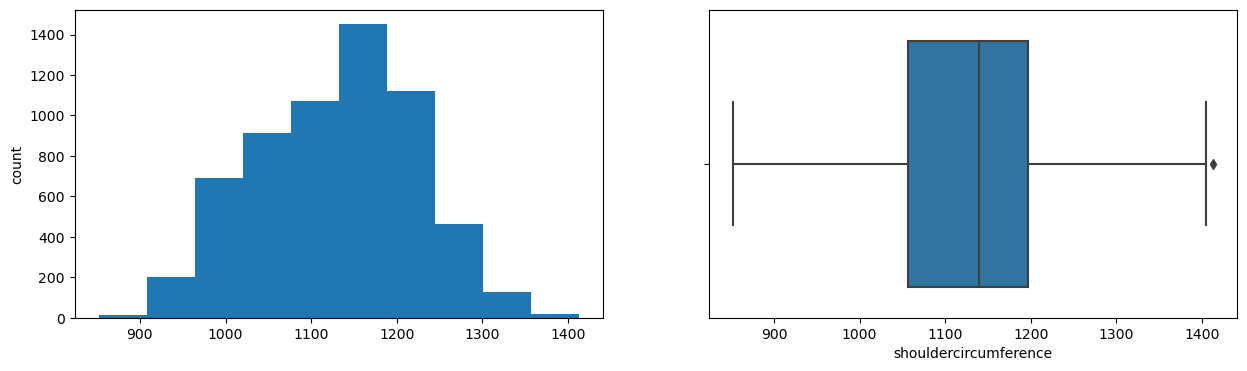

shoulderelbowlength
Skew : -0.08


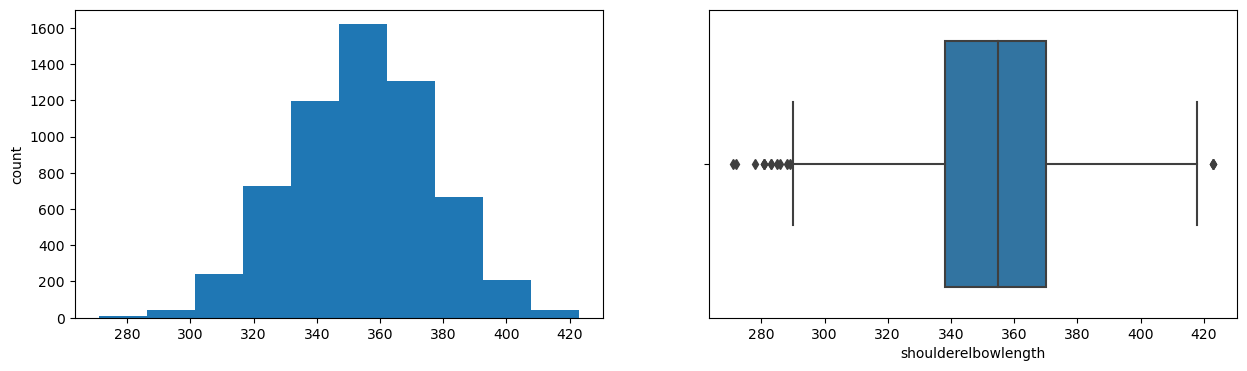

shoulderlength
Skew : -0.01


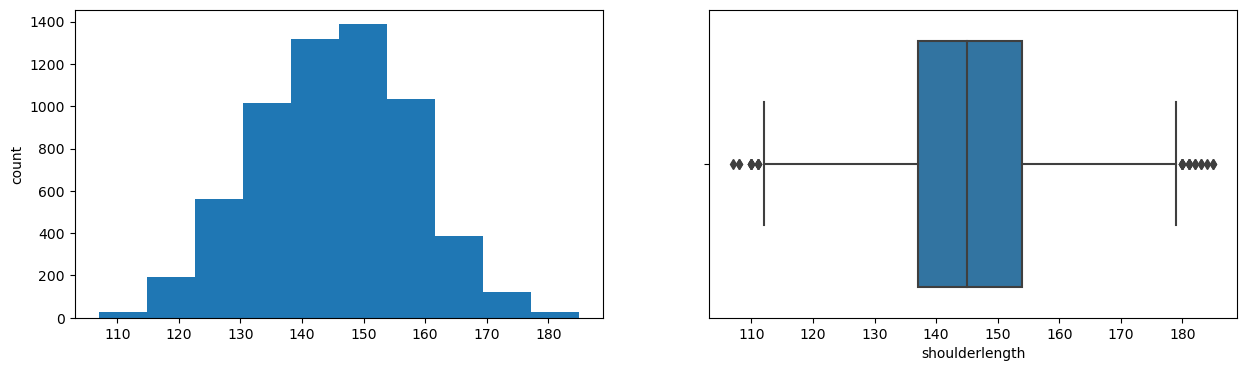

sittingheight
Skew : -0.1


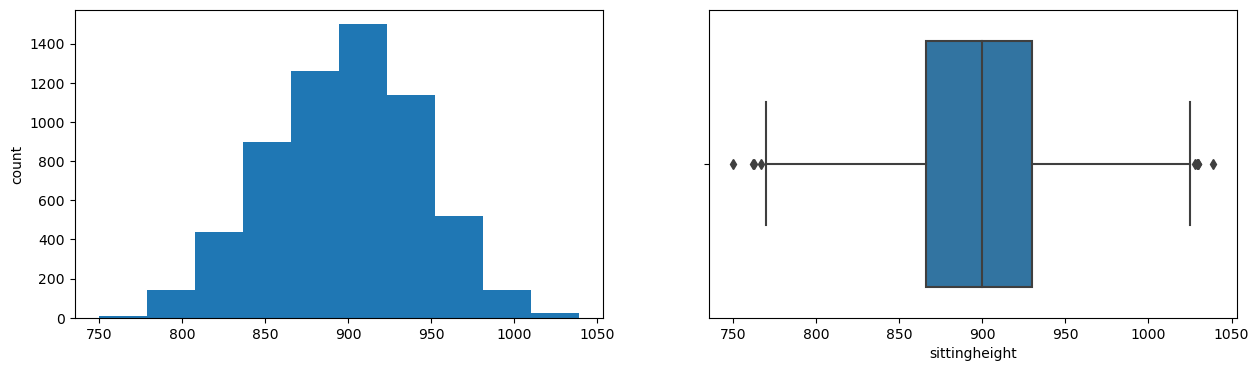

sleevelengthspinewrist
Skew : -0.21


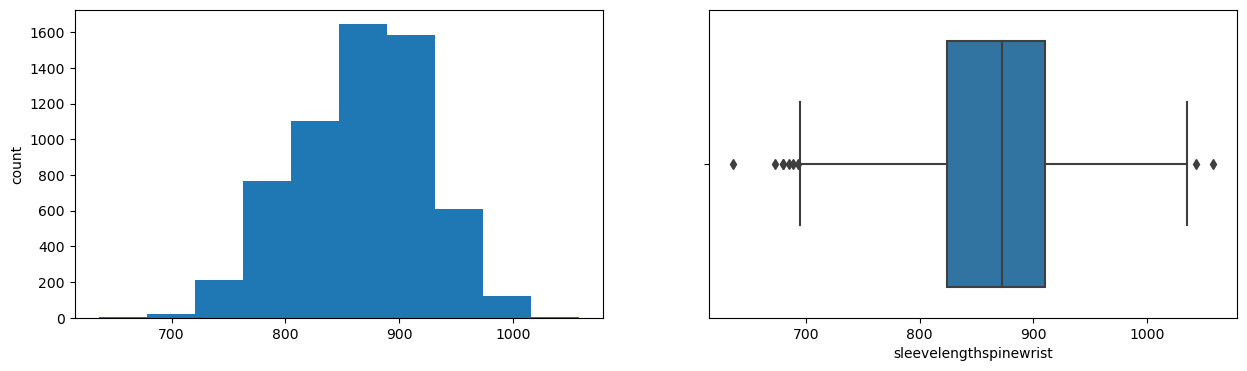

sleeveoutseam
Skew : -0.06


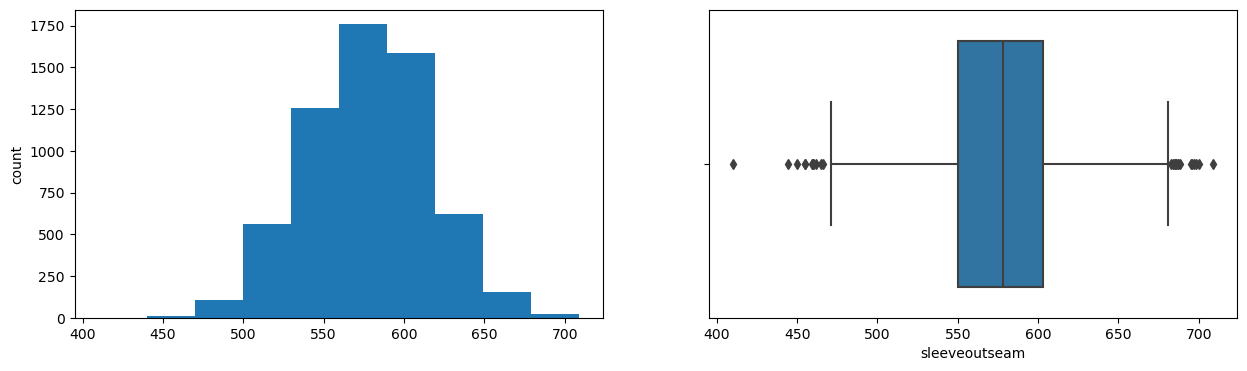

span
Skew : -0.11


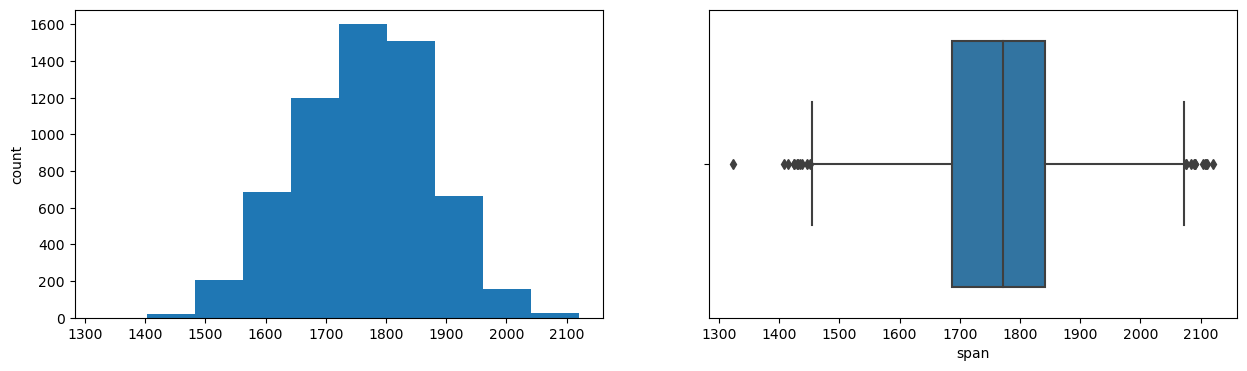

stature
Skew : -0.11


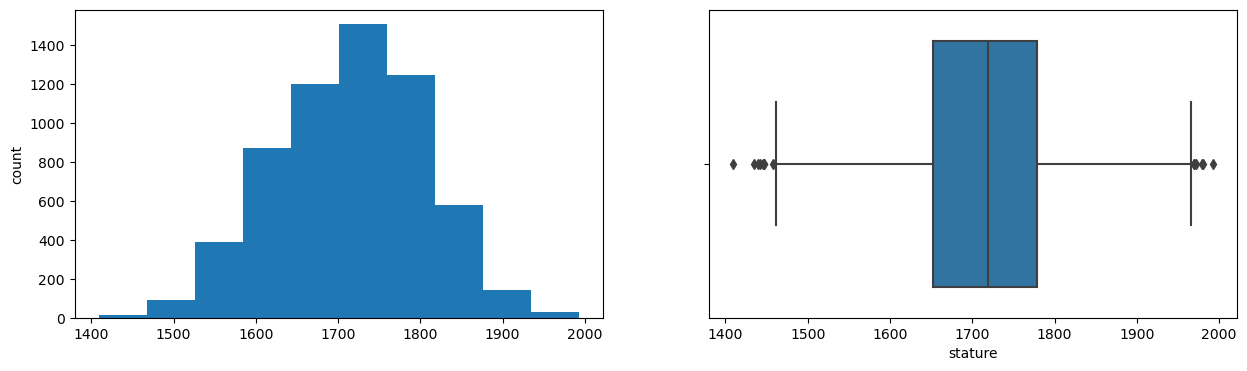

suprasternaleheight
Skew : -0.08


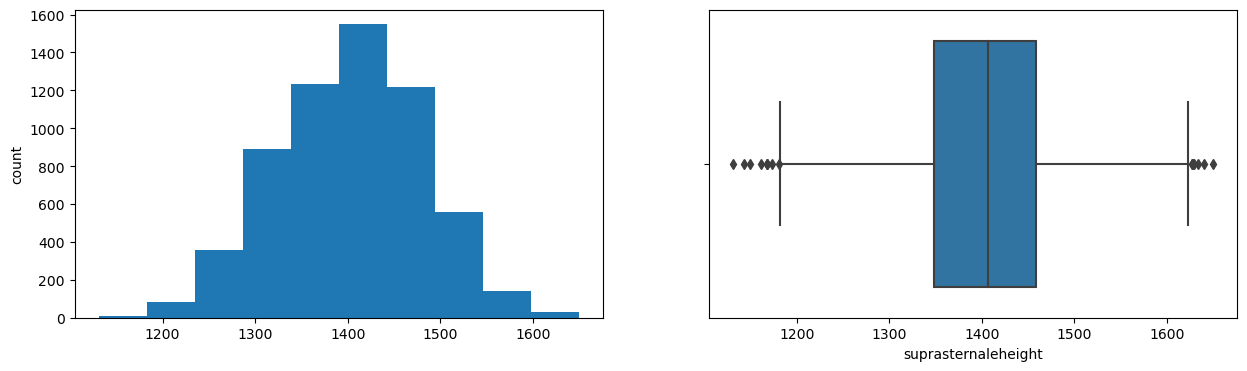

tenthribheight
Skew : 0.07


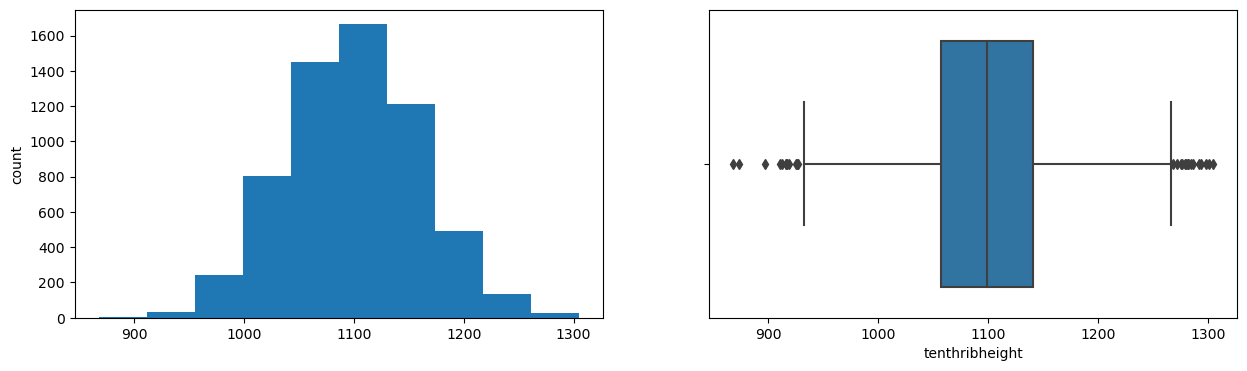

thighcircumference
Skew : 0.25


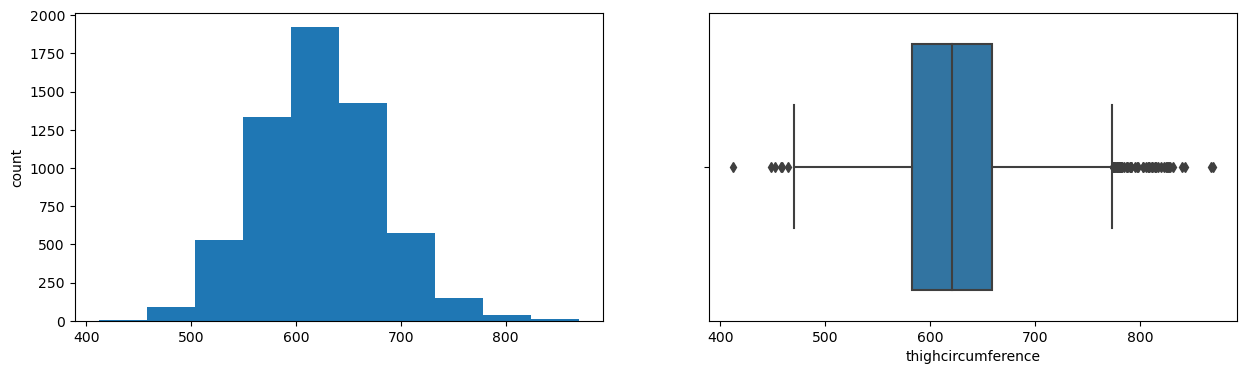

thighclearance
Skew : 0.35


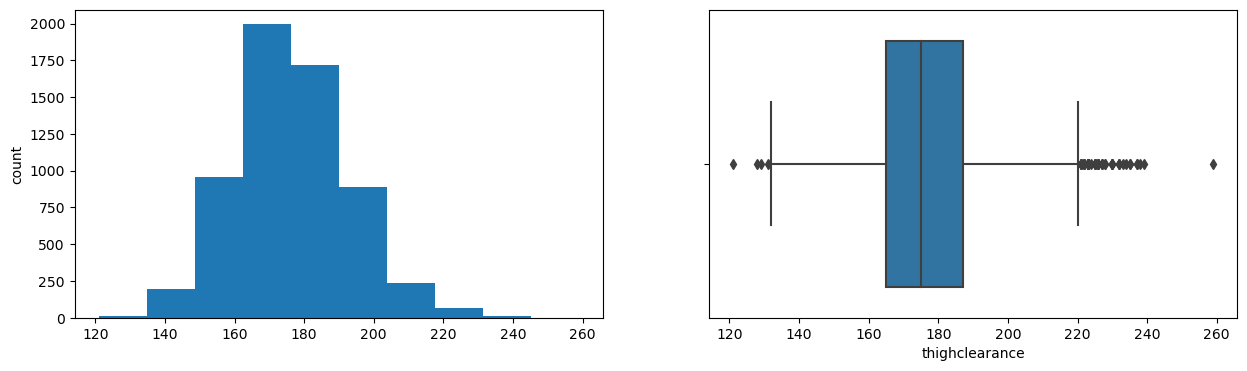

thumbtipreach
Skew : -0.03


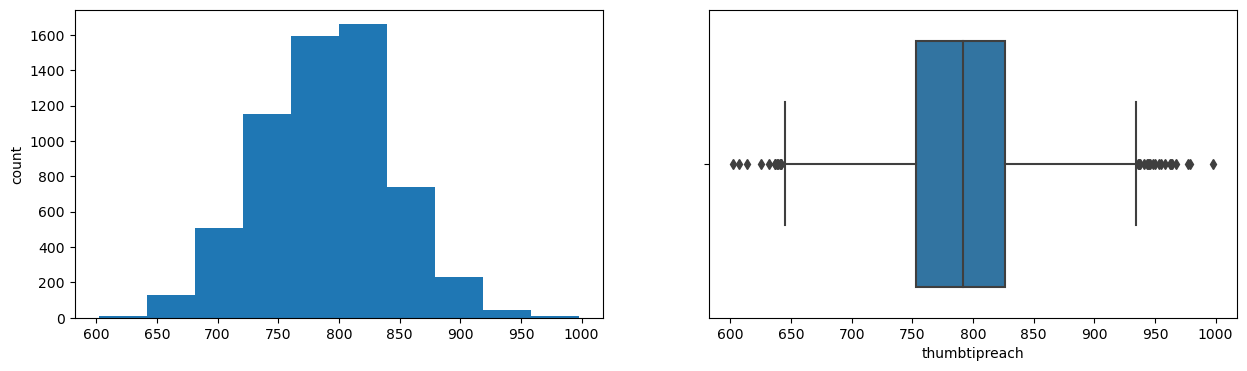

tibialheight
Skew : 0.08


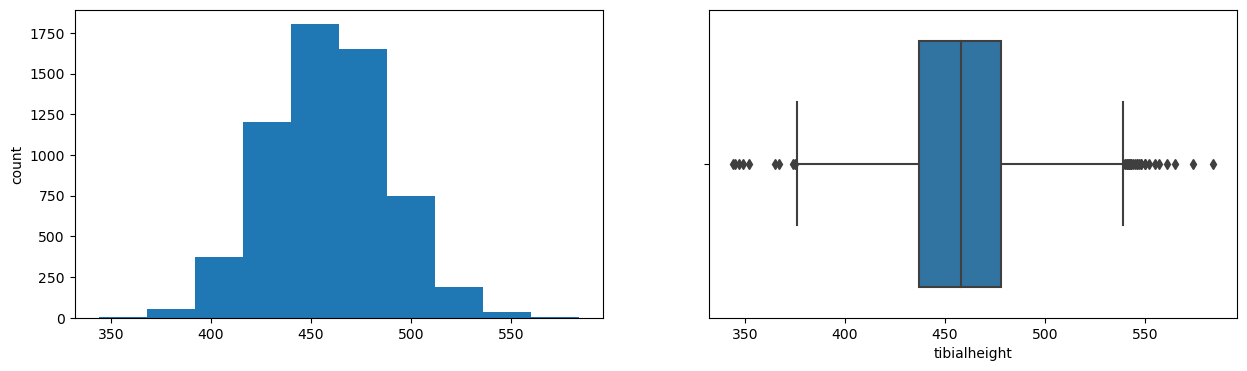

tragiontopofhead
Skew : -0.14


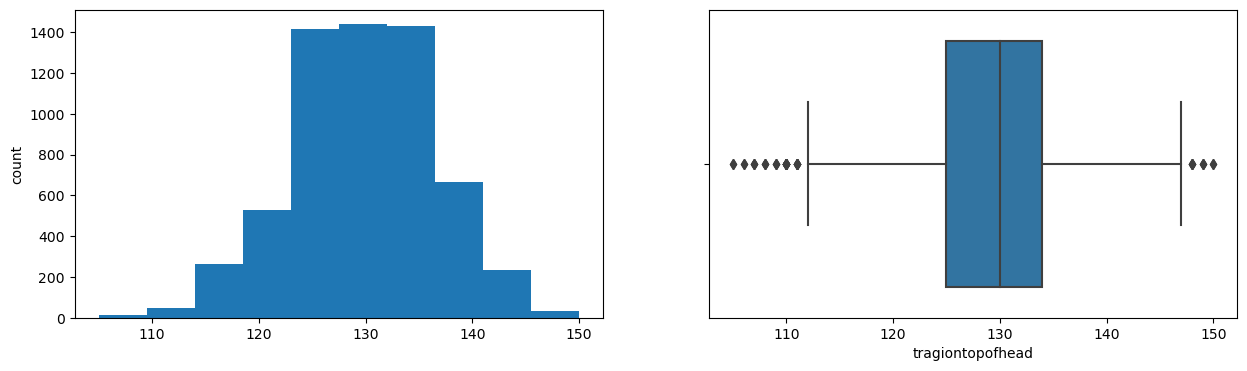

trochanterionheight
Skew : 0.15


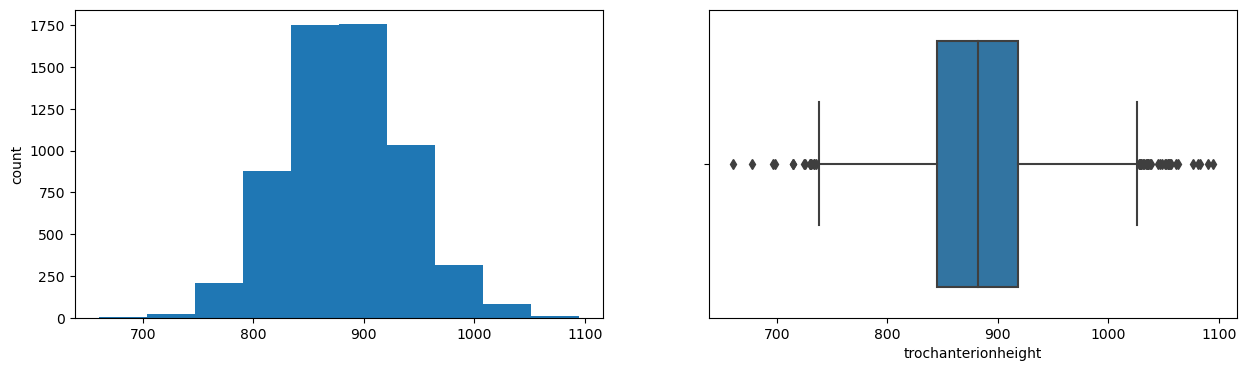

verticaltrunkcircumferenceusa
Skew : 0.16


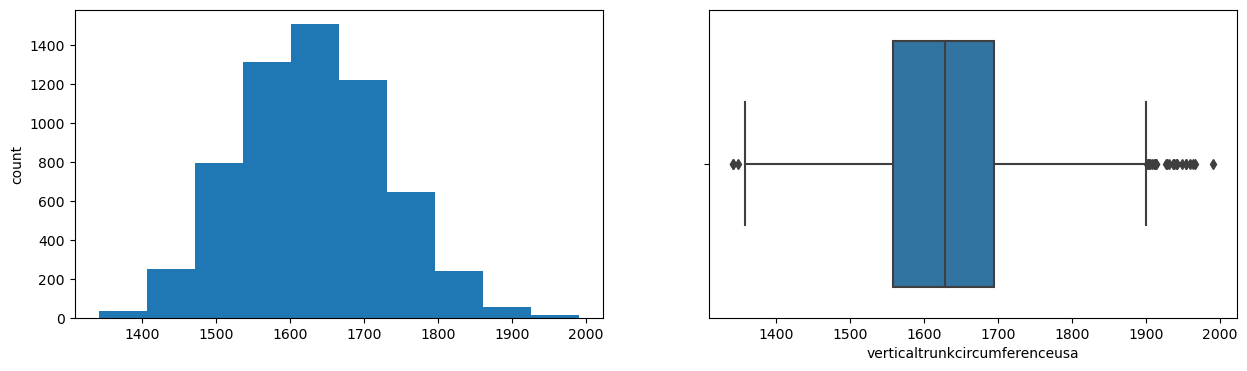

waistbacklength
Skew : -0.09


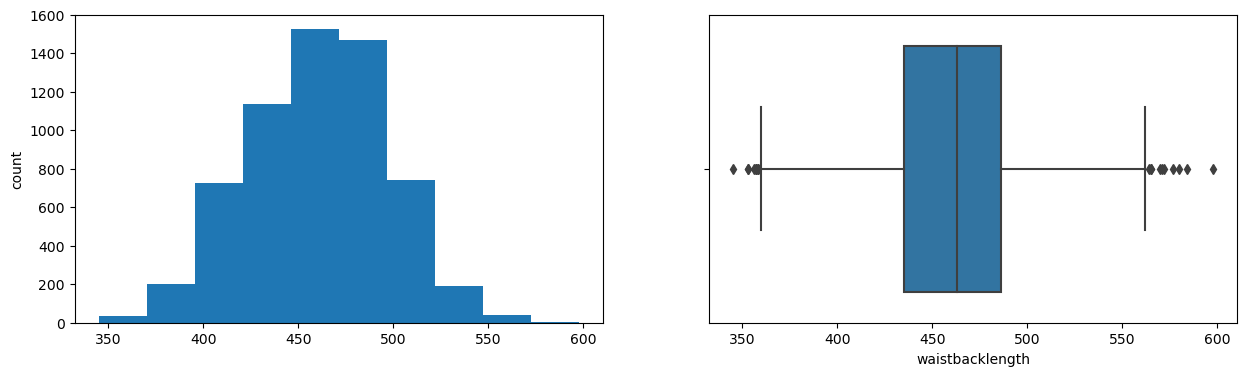

waistbreadth
Skew : 0.26


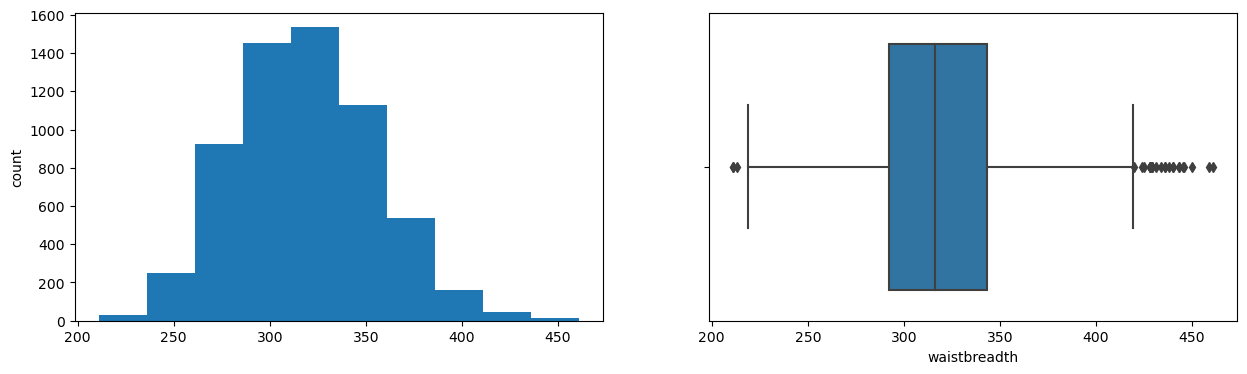

waistcircumference
Skew : 0.35


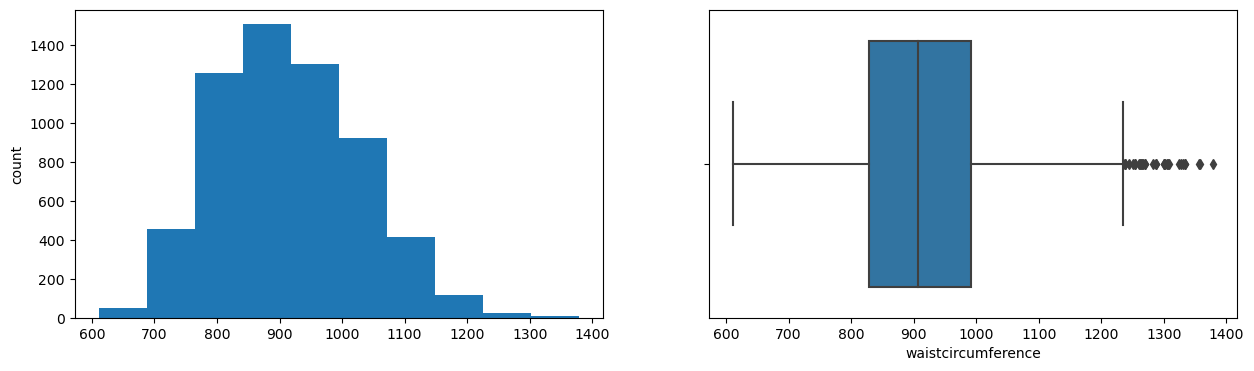

waistdepth
Skew : 0.57


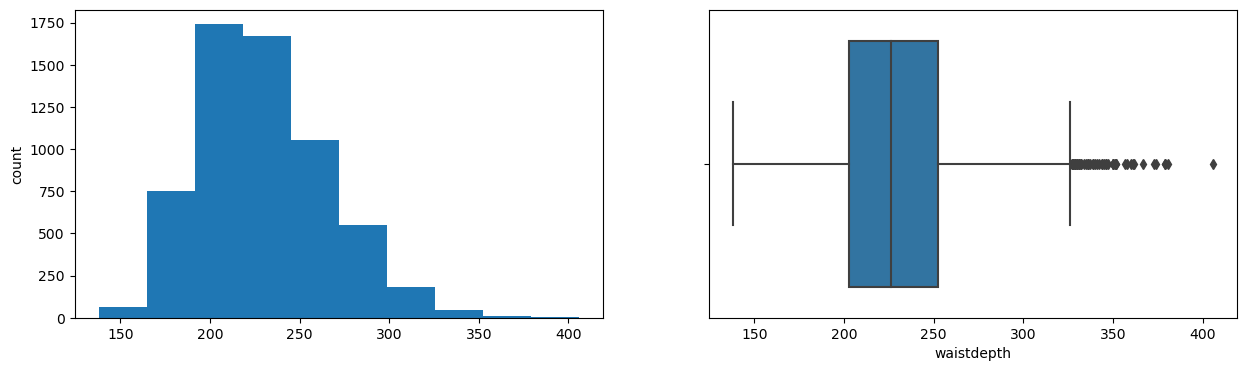

waistfrontlengthsitting
Skew : 0.25


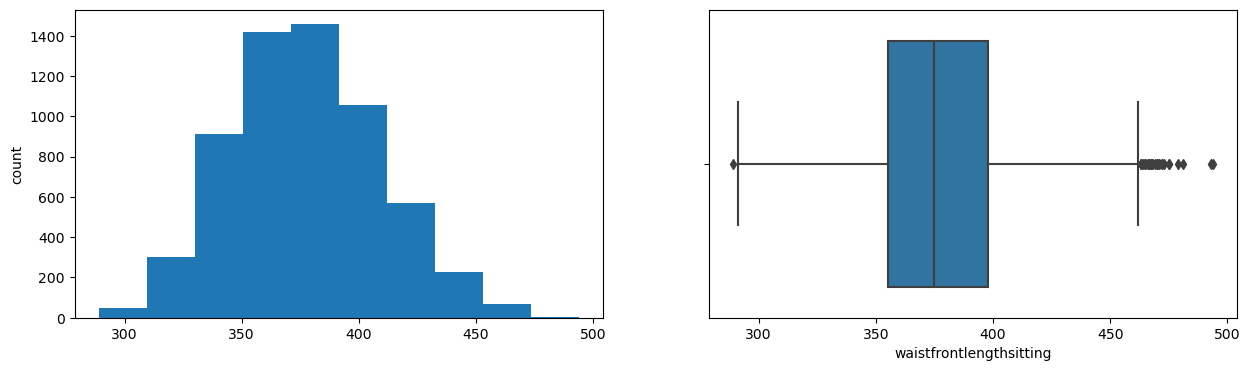

waistheightomphalion
Skew : -0.03


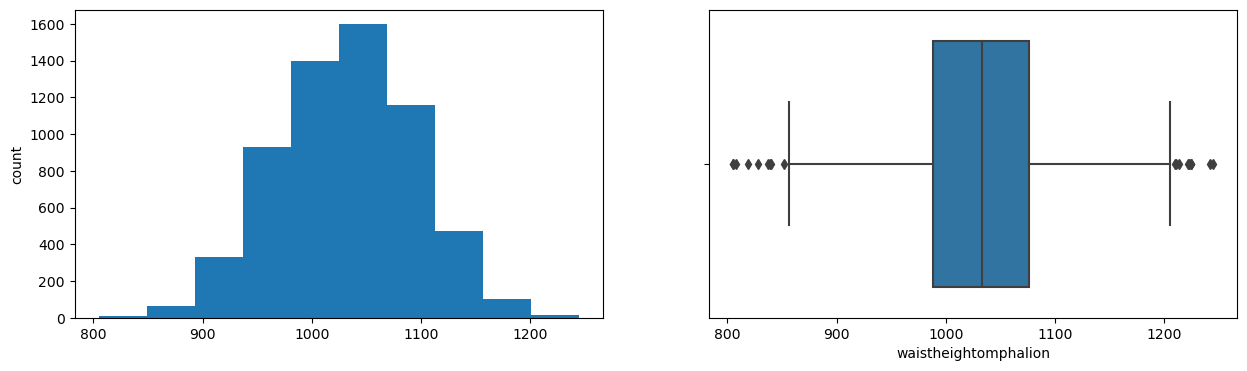

weightkg
Skew : 0.44


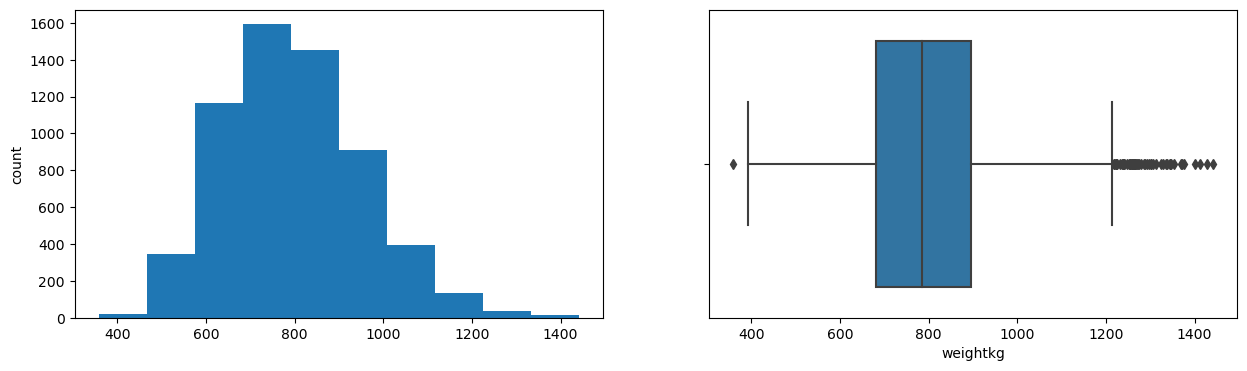

wristcircumference
Skew : -0.14


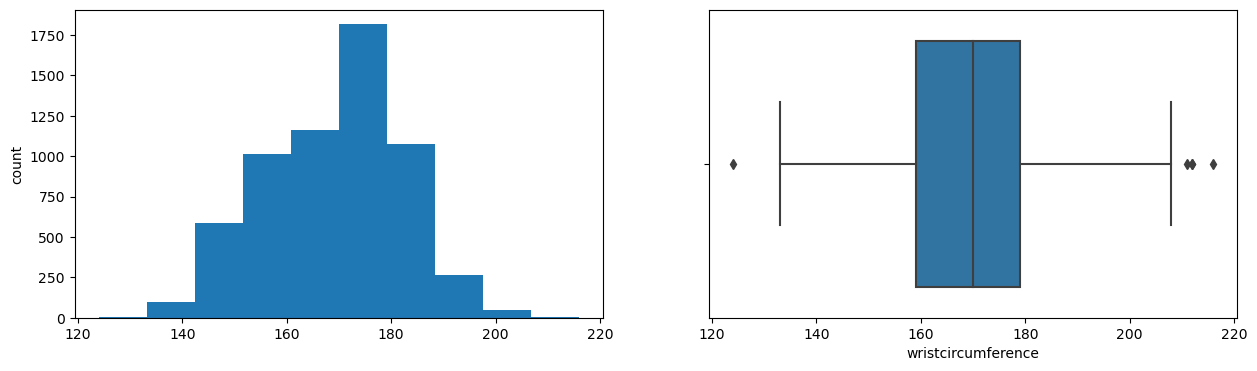

wristheight
Skew : 0.06


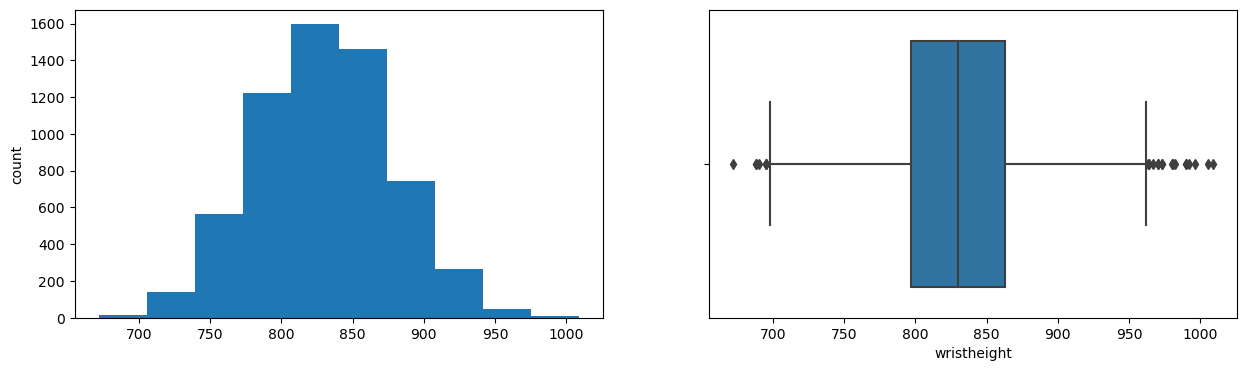

DODRace
Skew : 1.97


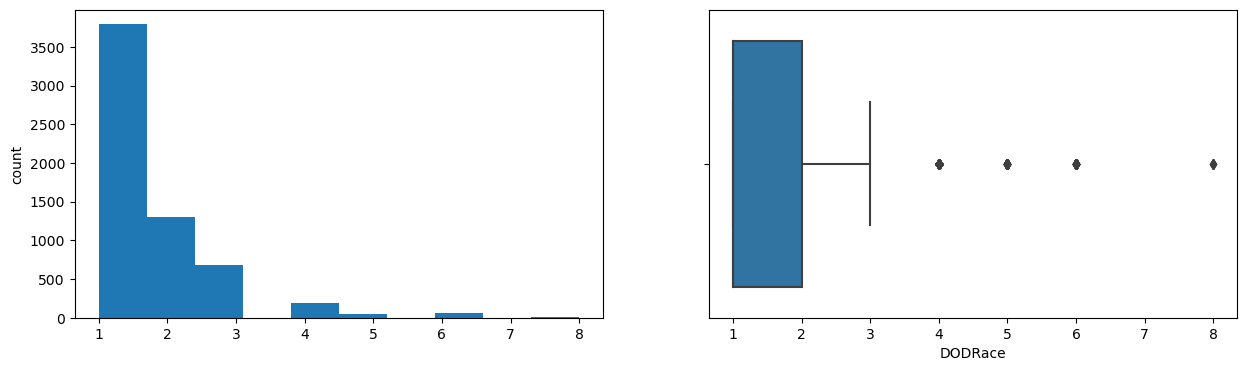

In [217]:
# check for each numerical feature boxplot and skew also we have now two categorical variables
cat_cols=new_df.select_dtypes(include=['object']).columns
num_cols = new_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


for col in num_cols:
    print(col)
    print('Skew :', round(new_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    new_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=new_df[col])
    plt.show()

In [218]:

# we plot the cacategorical variables using bar plot 

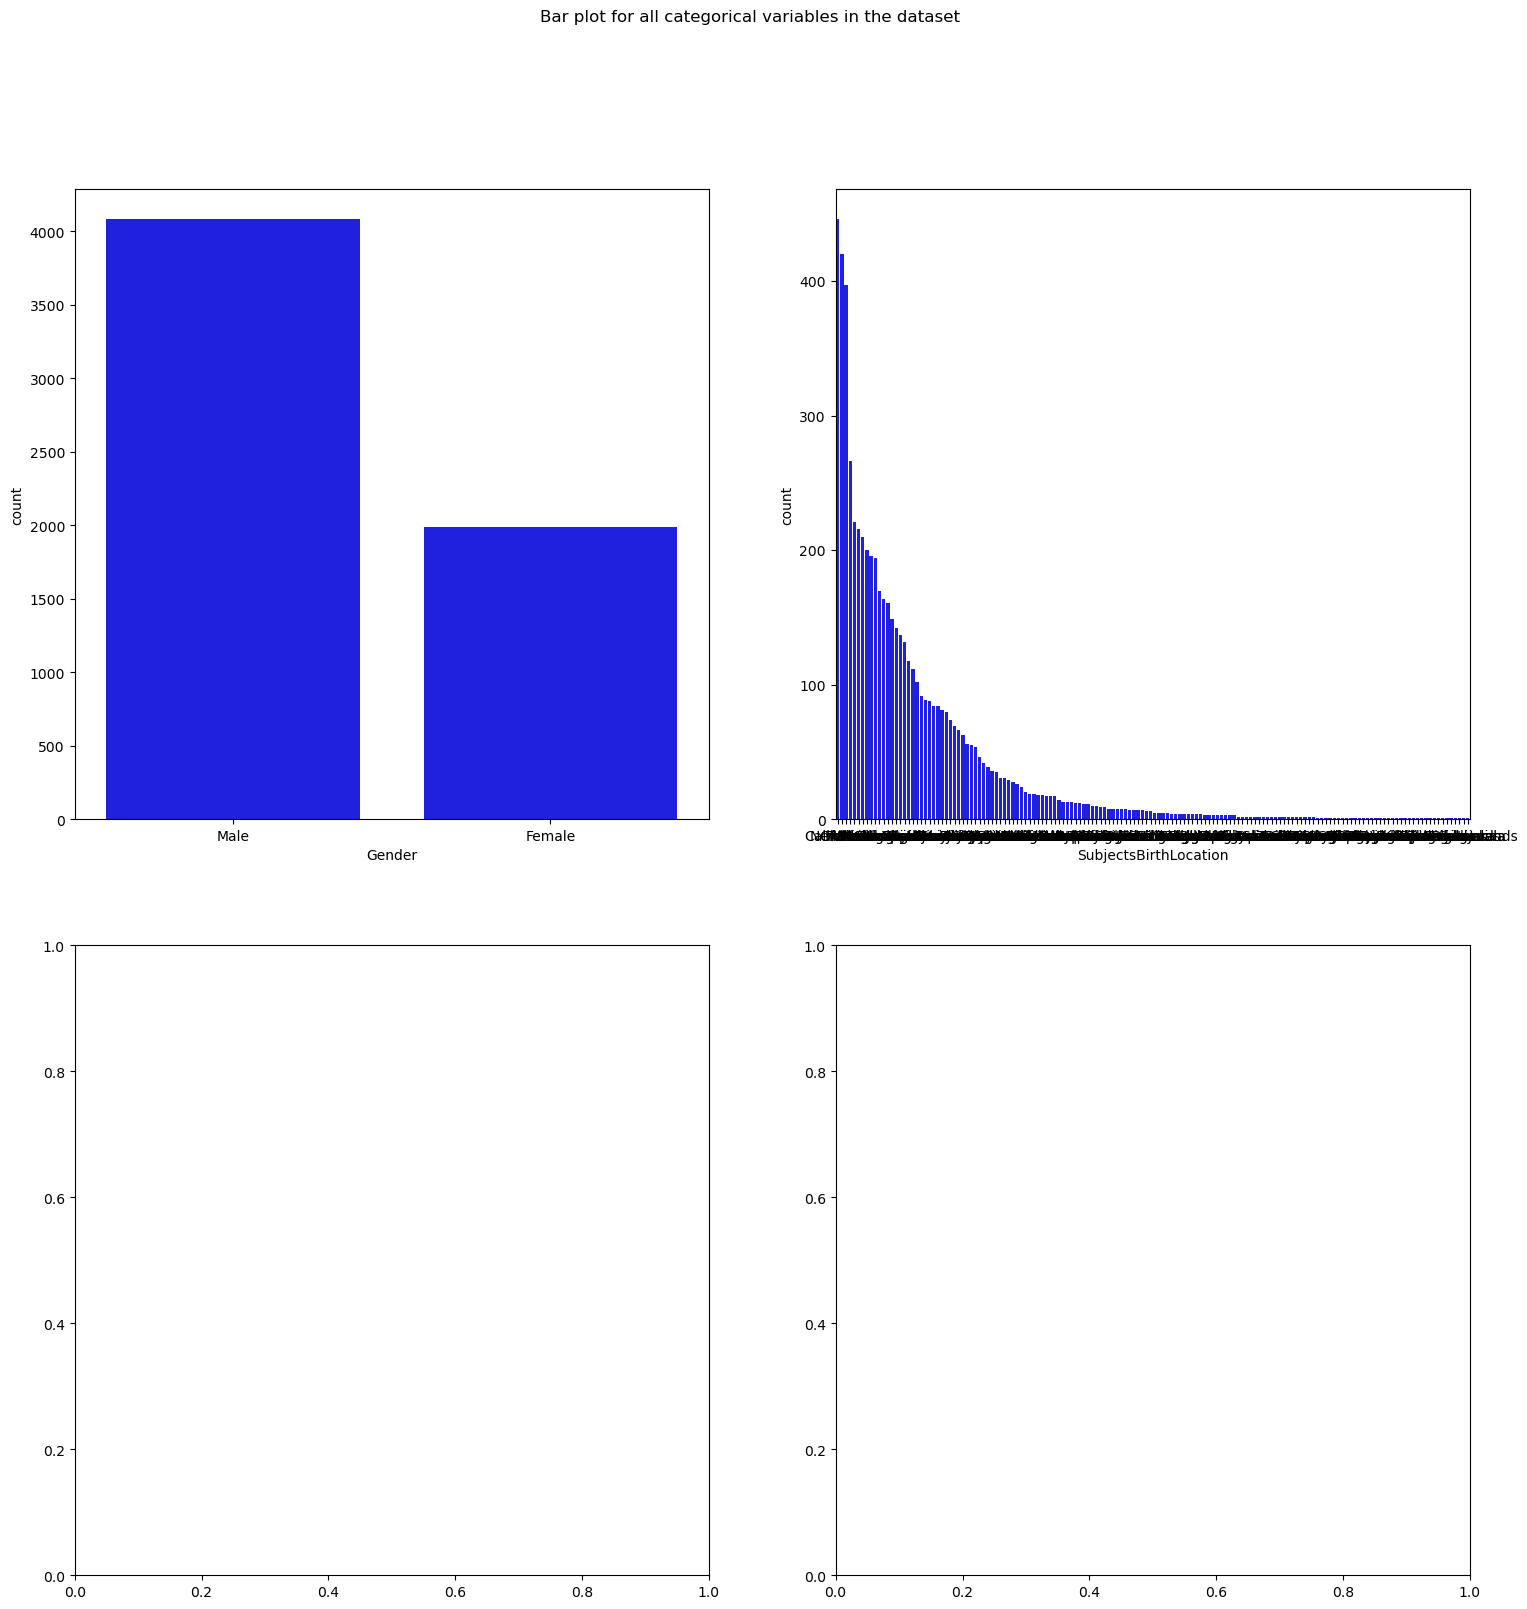

In [219]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Gender', data = new_df, color = 'blue', 
              order = new_df['Gender'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'SubjectsBirthLocation', data = new_df, color = 'blue', 
              order = new_df['SubjectsBirthLocation'].value_counts().index);




In [220]:
# check numeric variable correlation
correlation_matrix = new_df.corr()
correlation_matrix

#acromialheight and axillaheight  have 0.987452 


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace
abdominalextensiondepthsitting,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,0.506497,...,0.572025,0.859924,0.939899,0.958932,0.579296,0.162457,0.825714,0.550544,0.389220,-0.079167
acromialheight,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,0.409043,...,0.729273,0.446707,0.413142,0.371948,0.604967,0.933248,0.684610,0.734622,0.922687,-0.235121
acromionradialelength,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,0.351546,...,0.613148,0.384245,0.364133,0.338024,0.481149,0.851464,0.603964,0.646149,0.684979,-0.201095
anklecircumference,0.524747,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,0.453308,...,0.513502,0.589723,0.569306,0.517324,0.479788,0.420109,0.745950,0.702178,0.514394,-0.158360
axillaheight,0.290821,0.987452,0.862074,0.469964,1.000000,0.657168,0.790214,0.707868,0.465773,0.369885,...,0.682437,0.372178,0.337927,0.301106,0.565922,0.948190,0.621812,0.687252,0.905063,-0.229070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
waistheightomphalion,0.162457,0.933248,0.851464,0.420109,0.948190,0.621127,0.783744,0.692363,0.415606,0.265314,...,0.525292,0.247588,0.203970,0.167775,0.394255,1.000000,0.532079,0.637957,0.817358,-0.212210
weightkg,0.825714,0.684610,0.603964,0.745950,0.621812,0.731982,0.653566,0.707292,0.875688,0.582281,...,0.725908,0.859654,0.872724,0.832213,0.677454,0.532079,1.000000,0.801215,0.671151,-0.133350
wristcircumference,0.550544,0.734622,0.646149,0.702178,0.687252,0.826903,0.745770,0.803476,0.765347,0.350715,...,0.723015,0.581908,0.579536,0.557457,0.614334,0.637957,0.801215,1.000000,0.663991,-0.181502
wristheight,0.389220,0.922687,0.684979,0.514394,0.905063,0.628475,0.689499,0.624097,0.505623,0.465766,...,0.702555,0.484488,0.446004,0.396134,0.615569,0.817358,0.671151,0.663991,1.000000,-0.257819


In [221]:
import pandas as pd
from scipy.stats import f_oneway

# Perform ANOVA test for 'Category1' and 'NumericalVariable'
anova_result1 = f_oneway(*[group['DODRace'] for name, group in new_df.groupby('Gender')])

# Perform ANOVA test for 'Category2' and 'NumericalVariable'
anova_result2 = f_oneway(*[group['DODRace'] for name, group in new_df.groupby('SubjectsBirthLocation')])

print("ANOVA Result for Gender and DODRace:")
print(anova_result1)
print("\nANOVA Result for SubjectsBirthLocation and DODRace:")
print(anova_result2)


ANOVA Result for Gender and DODRace:
F_onewayResult(statistic=86.50579076619069, pvalue=1.9044949077153342e-20)

ANOVA Result for SubjectsBirthLocation and DODRace:
F_onewayResult(statistic=19.91681523873729, pvalue=0.0)


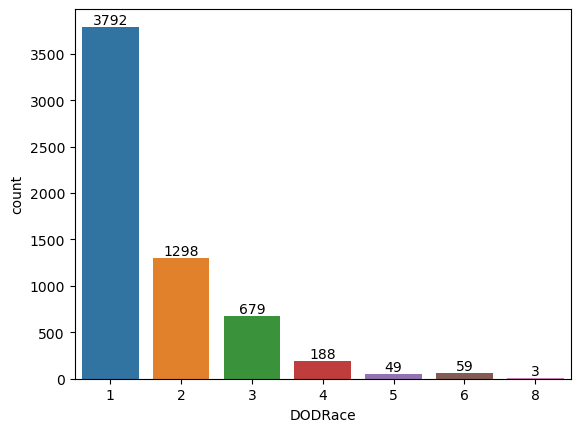

In [222]:
# we have inbanalce data and outlier we need to deal with we do the preformane with outlier and without same aboruch with unbalanced

ax = sns.countplot(x='DODRace', data=new_df)
ax.bar_label(ax.containers[0]);

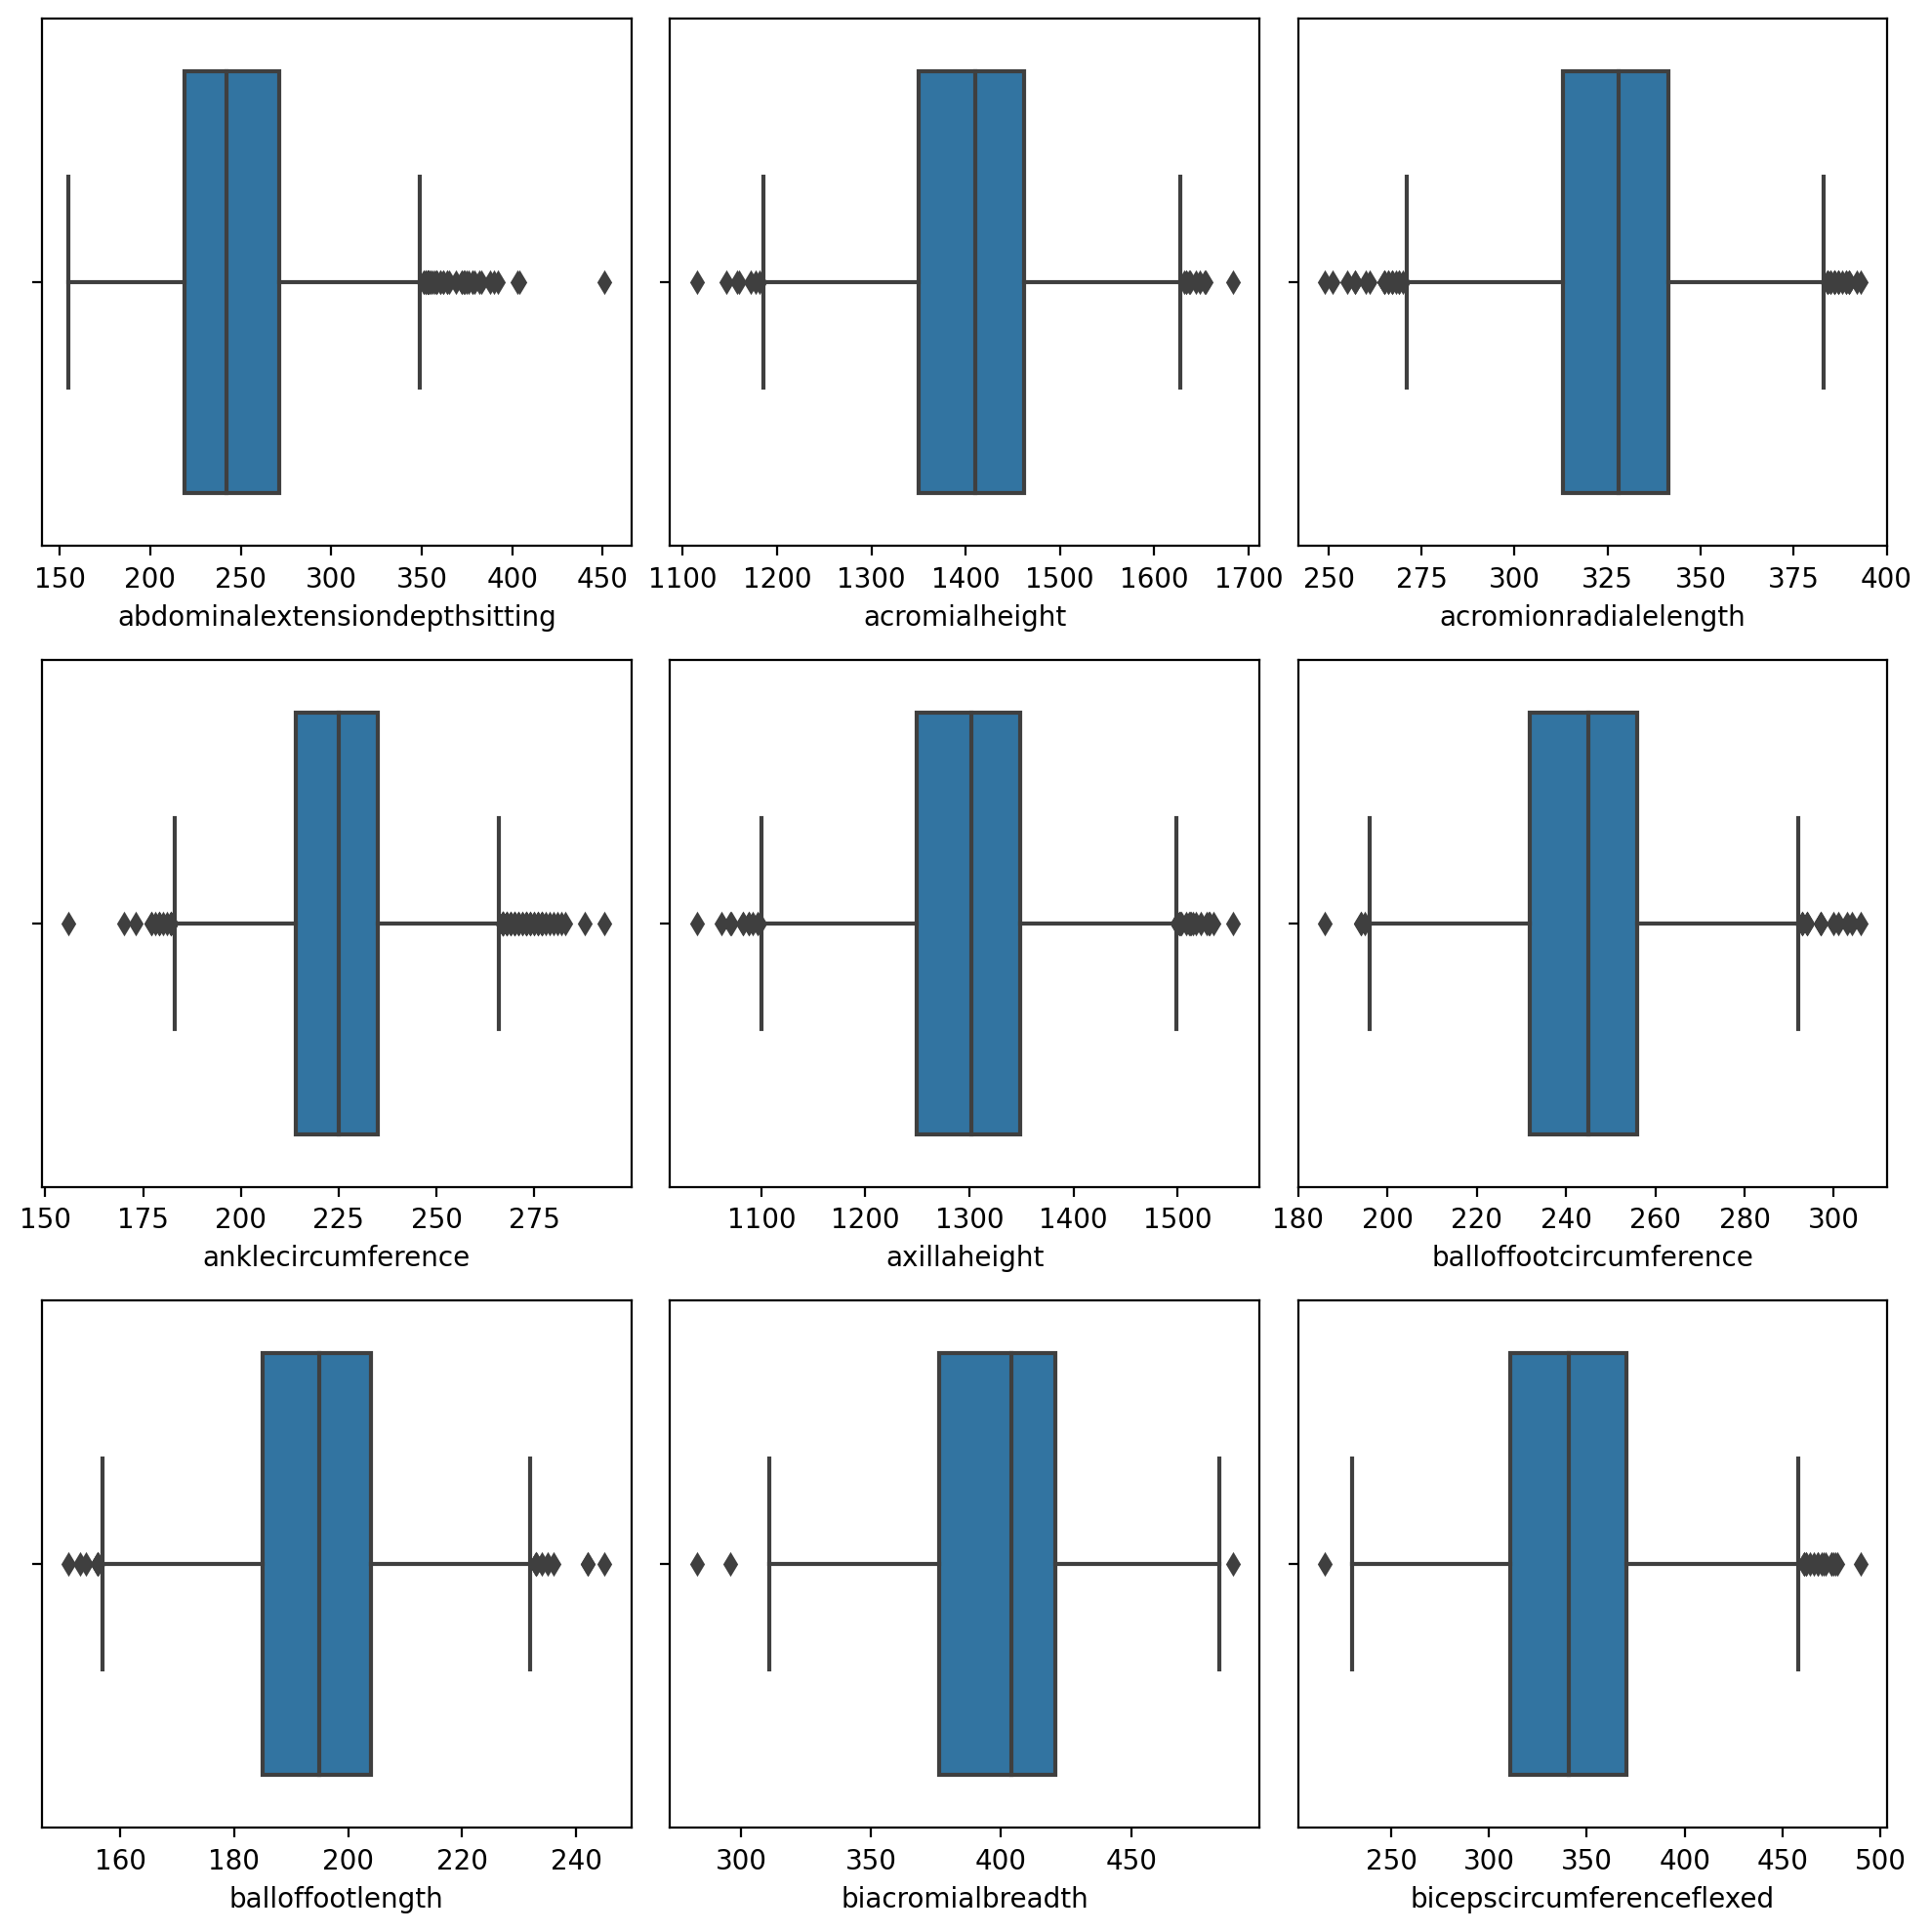

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming new_df is your DataFrame containing numerical columns

# Select numerical columns
numerical_cols = new_df.select_dtypes(include=["float64", "int64"])

# Create a 3x3 grid of box plots
fig = plt.figure(figsize=(10, 10), dpi=200)

for i, col in enumerate(range(9)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=numerical_cols.iloc[:, col])
    plt.xlabel(numerical_cols.columns[col])

plt.tight_layout()
plt.show()

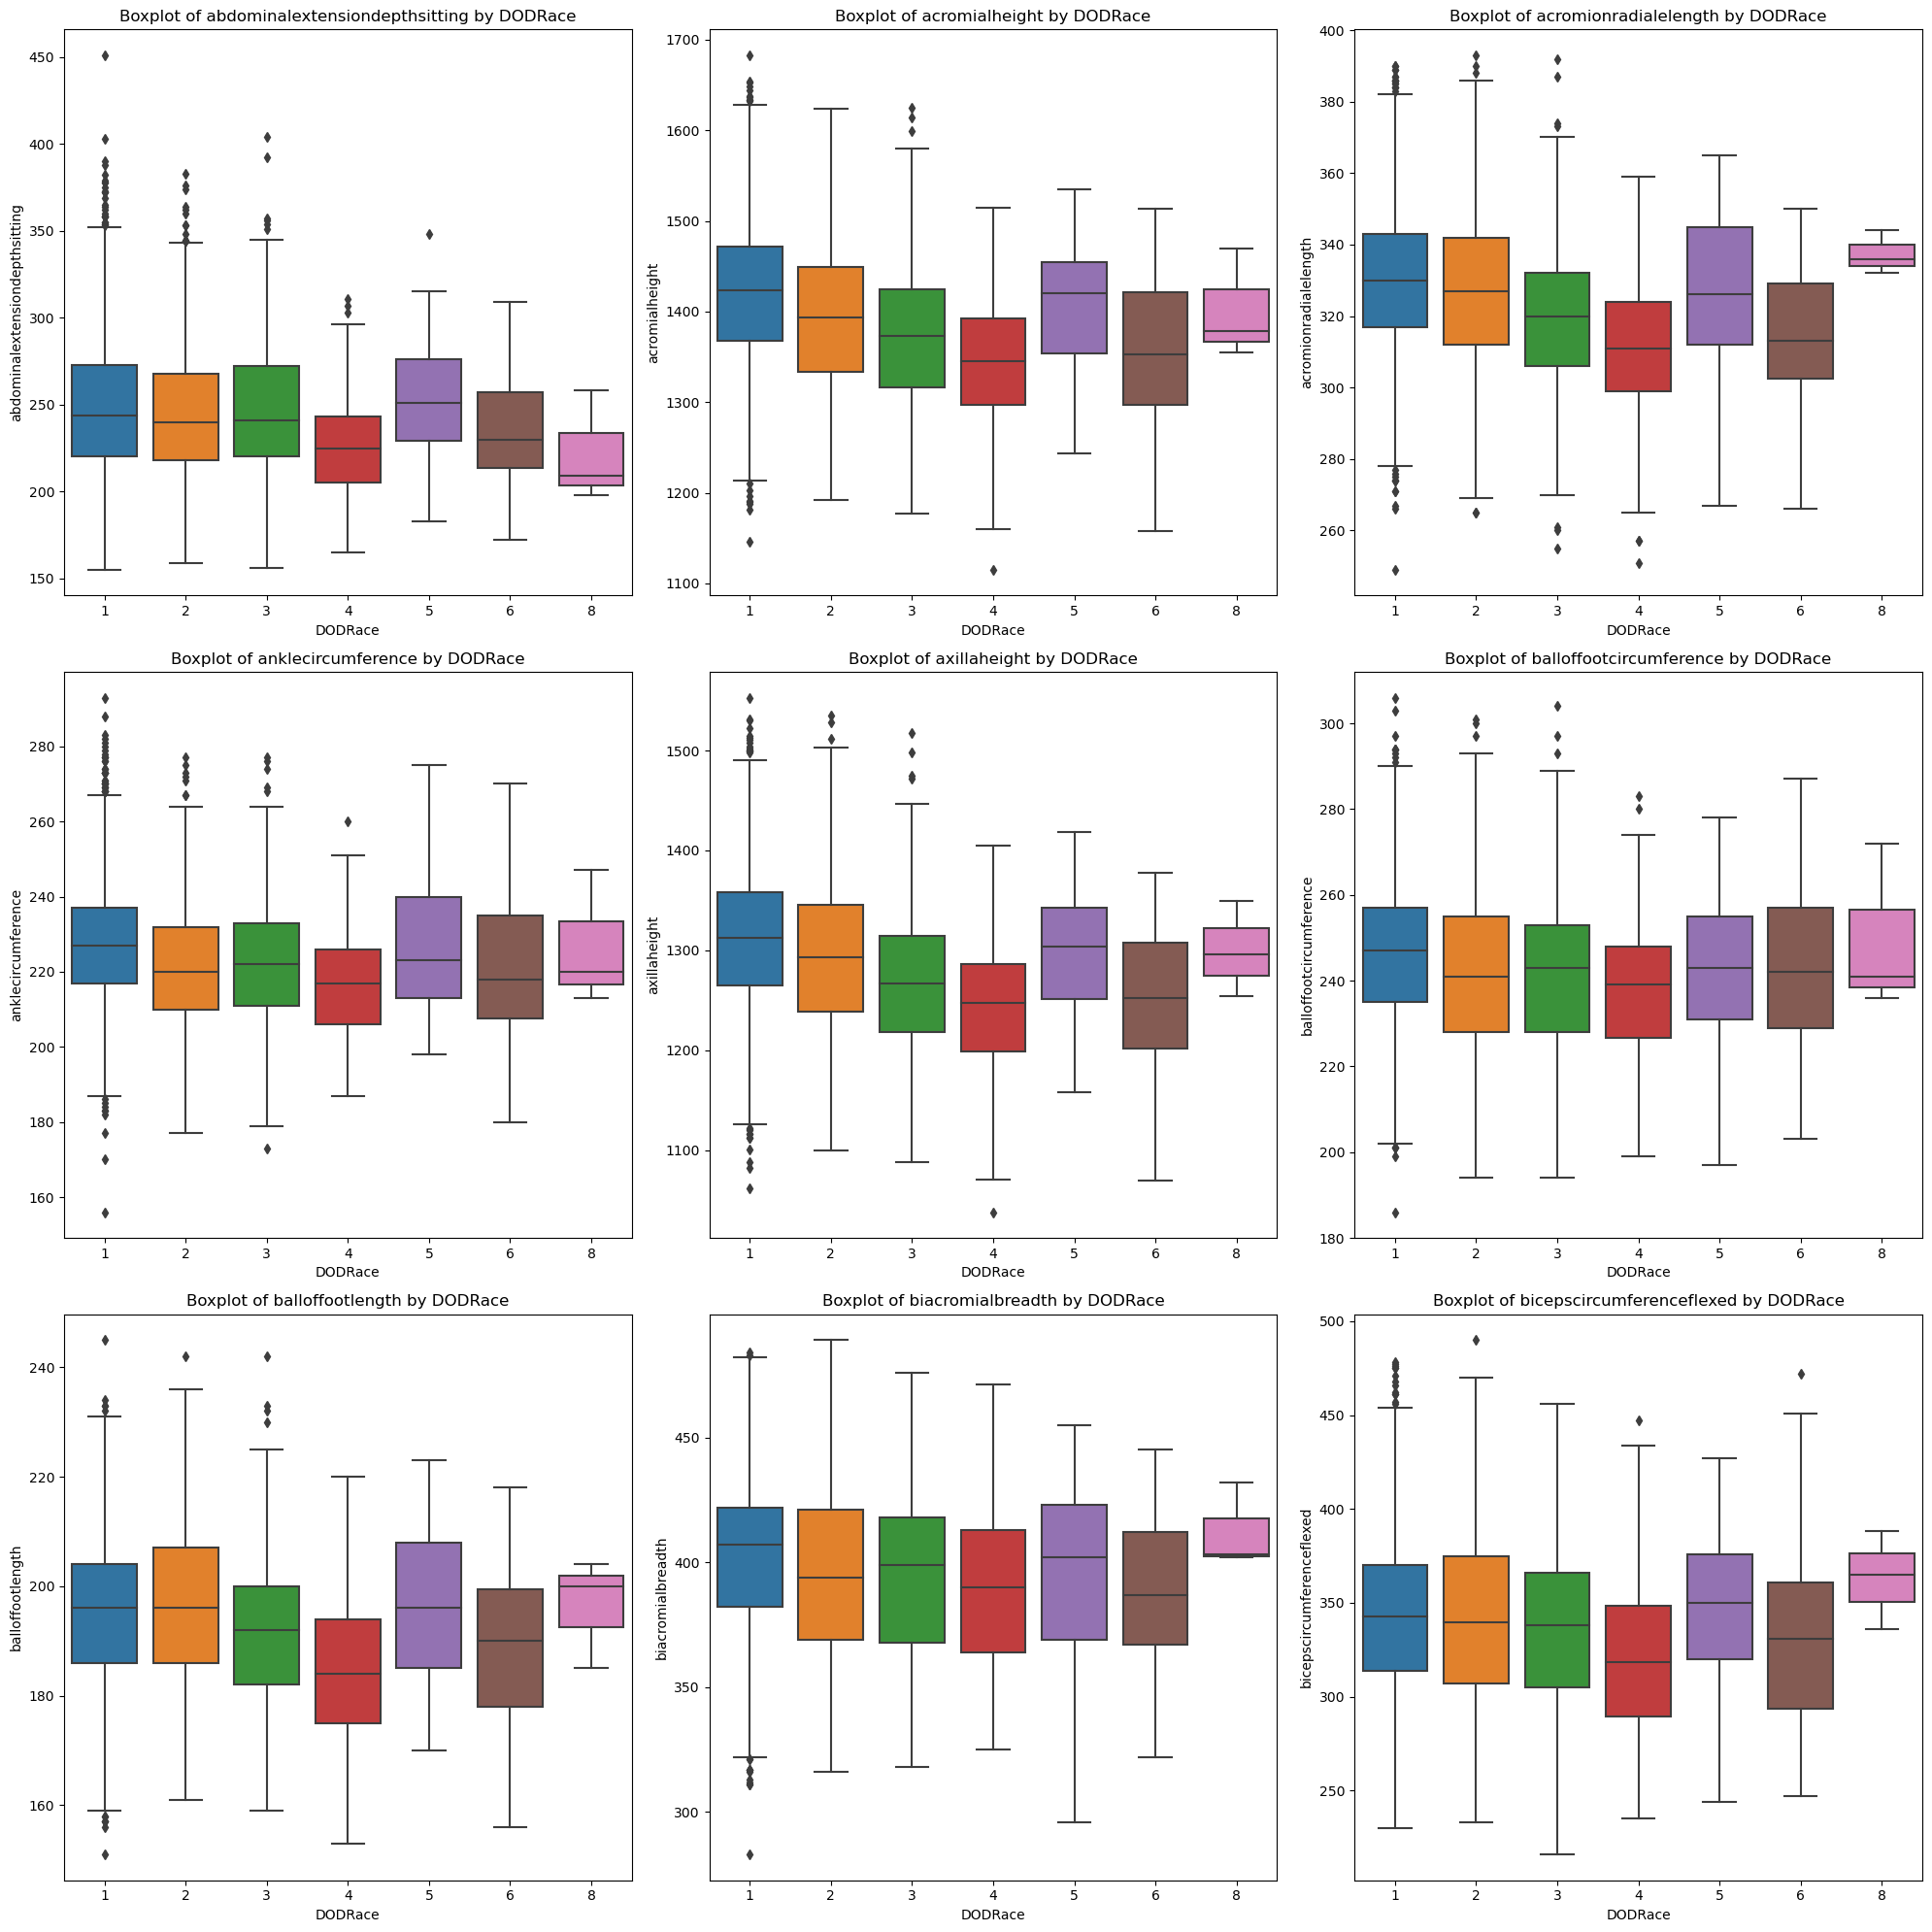

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming new_df is your DataFrame

# Set up the subplot grid
plt.figure(figsize=(20, 20))
for index, feature in enumerate(new_df.columns[:9]):  # Iterate over the first 9 columns
    if feature != "DODRace":
        plt.subplot(3, 3, index + 1)  # 3x3 grid, index starts from 0
        sns.boxplot(x='DODRace', y=feature, data=new_df)
        plt.xlabel("DODRace")
        plt.ylabel(feature)
        plt.title(f"Boxplot of {feature} by DODRace")

plt.tight_layout()  # Adjust spacing between plots
plt.show()


In [225]:
# now we deal with categorical variable width encoding

In [226]:
# we keep the outlier before and after and now we encode the categorecl coulmn 
# we have unbalanced between male and female 

print(new_df['Gender'].unique()) 
new_df['Gender'].value_counts() 

['Female' 'Male']


Male      4082
Female    1986
Name: Gender, dtype: int64

In [227]:
new_df["Gender"] =new_df["Gender"].map({"Female":0,"Male":1})
new_df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
4077    1
4078    1
4079    1
4080    1
4081    1
Name: Gender, Length: 6068, dtype: int64

In [228]:
new_df.isnull().sum()


abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
                                 ..
wristcircumference                0
wristheight                       0
Gender                            0
SubjectsBirthLocation             0
DODRace                           0
Length: 96, dtype: int64

In [229]:
print(new_df.Gender  .unique())
new_df['Gender'].value_counts() 

[0 1]


1    4082
0    1986
Name: Gender, dtype: int64

In [230]:
# now encode SubjectsBirthLocation

print(new_df['SubjectsBirthLocation'].unique()) 


['Germany' 'California' 'Texas' 'District of Columbia' 'New Mexico'
 'American Samoa' 'Virginia' 'South Korea' 'Massachusetts' 'Michigan'
 'Dominican Republic' 'Colorado' 'United States' 'South Dakota'
 'Louisiana' 'Ohio' 'South Carolina' 'Mississippi' 'Illinois'
 'West Virginia' 'New York' 'Iowa' 'Florida' 'Poland' 'Oklahoma'
 'Pennsylvania' 'North Carolina' 'Alabama' 'Wisconsin' 'Arizona'
 'Washington' 'Kentucky' 'Tennessee' 'Connecticut' 'Iceland' 'Kansas'
 'Burma' 'Indiana' 'Georgia' 'Oregon' 'Delaware' 'Jamaica' 'Puerto Rico'
 'Mexico' 'Philippines' 'Maryland' 'Hawaii' 'Ukraine' 'Montana' 'Italy'
 'North Dakota' 'Argentina' 'Saint Lucia' 'New Jersey' 'Dominica' 'Peru'
 'Israel' 'Utah' 'Turkey' 'Morocco' 'Nevada' 'Honduras' 'Russia'
 'United Kingdom' 'Missouri' 'Serbia' 'Belgium' 'Minnesota' 'Ecuador'
 'Canada' 'Thailand' 'Idaho' 'Trinidad and Tobago' 'Bolivia' 'Wyoming'
 'Panama' 'Nebraska' 'Liberia' 'Kenya' 'Ghana' 'Vietnam' 'China' 'Maine'
 'Guyana' 'Haiti' 'Cameroon' 'New Hamps

In [231]:
 new_df.SubjectsBirthLocation.value_counts()

California    446
New York      420
Texas         397
Indiana       266
Oklahoma      221
             ... 
Zambia          1
Bahamas         1
Serbia          1
Sri Lanka       1
Guatemala       1
Name: SubjectsBirthLocation, Length: 152, dtype: int64

In [232]:
from sklearn.preprocessing import LabelEncoder
# Bad because some will have a great value for the machine learning and we can't priorty it 
countries = [
    'Germany', 'California', 'Texas', 'District of Columbia', 'New Mexico', 'American Samoa', 'Virginia',
    'South Korea', 'Massachusetts', 'Michigan', 'Dominican Republic', 'Colorado', 'United States', 'South Dakota',
    'Louisiana', 'Ohio', 'South Carolina', 'Mississippi', 'Illinois', 'West Virginia', 'New York', 'Iowa',
    'Florida', 'Poland', 'Oklahoma', 'Pennsylvania', 'North Carolina', 'Alabama', 'Wisconsin', 'Arizona',
    'Washington', 'Kentucky', 'Tennessee', 'Connecticut', 'Iceland', 'Kansas', 'Burma', 'Indiana', 'Georgia',
    'Oregon', 'Delaware', 'Jamaica', 'Puerto Rico', 'Mexico', 'Philippines', 'Maryland', 'Hawaii', 'Ukraine',
    'Montana', 'Italy', 'North Dakota', 'Argentina', 'Saint Lucia', 'New Jersey', 'Dominica', 'Peru', 'Israel',
    'Utah', 'Turkey', 'Morocco', 'Nevada', 'Honduras', 'Russia', 'United Kingdom', 'Missouri', 'Serbia',
    'Belgium', 'Minnesota', 'Ecuador', 'Canada', 'Thailand', 'Idaho', 'Trinidad and Tobago', 'Bolivia', 'Wyoming',
    'Panama', 'Nebraska', 'Liberia', 'Kenya', 'Ghana', 'Vietnam', 'China', 'Maine', 'Guyana', 'Haiti', 'Cameroon',
    'New Hampshire', 'Zambia', 'US Virgin Islands', 'Colombia', 'Arkansas', 'Japan', 'Paraguay', 'Chile', 'India',
    'Bulgaria', 'Antigua and Barbuda', 'Korea', 'Alaska', 'Palau', 'Sri Lanka', 'Barbados', 'Rhode Island',
    'Vermont', 'Bangladesh', 'South Africa', 'Nicaragua', 'Grenada', 'Guam', 'Azerbaijan', 'Sudan', 'Venezuela',
    'Fiji', 'Northern Mariana Islands', 'Iran', 'Bosnia and Herzegovina', 'Bermuda', 'Denmark', 'El Salvador',
    'Romania', 'Netherlands', 'Taiwan', 'British Virgin Islands', 'Sierra Leone', 'Cuba', 'Nigeria', 'Costa Rica',
    'Bahamas', 'Portugal', 'France', 'Belize', 'Guadalupe', 'Nepal', 'Senegal', 'Brazil', 'Cape Verde', 'Syria',
    'Singapore', 'Micronesia', 'French Guiana', 'Iraq', 'Ethiopia', 'Egypt', 'Togo', 'Cambodia', 'Lebanon',
    'Ivory Coast', 'Laos', 'Belarus', 'New Zealand', 'South America', 'Guatemala'
]
label_encoder = LabelEncoder()
encoded_countries = label_encoder.fit_transform(countries)
print(encoded_countries)

[ 47  21 133  35  95   2 146 127  80  82  37  29 141 126  77 103 125  85
  59 148  96  62  43 112 104 109 100   0 149   5 147  71 132  30  57  70
  20  61  46 105  33  68 114  81 111  79  55 139  87  66 101   4 118  94
  36 110  65 142 137  88  92  56 117 140  86 120  12  84  38  24 134  58
 136  15 150 107  89  76  72  48 145  27  78  53  54  23  93 151 138  28
   6  69 108  26  60  19   3  73   1 106 128  10 115 144   9 123  98  49
  51   7 129 143  42 102  63  16  14  34  40 116  91 131  18 121  32  99
  31   8 113  44  13  50  90 119  17  25 130 122  83  45  64  41  39 135
  22  75  67  74  11  97 124  52]


In [233]:
new_df['SubjectsBirthLocation'].value_counts()

California    446
New York      420
Texas         397
Indiana       266
Oklahoma      221
             ... 
Zambia          1
Bahamas         1
Serbia          1
Sri Lanka       1
Guatemala       1
Name: SubjectsBirthLocation, Length: 152, dtype: int64

In [234]:

us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
    'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa',
    'District of Columbia', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'US Virgin Islands'
]


new_df['new'] = new_df['SubjectsBirthLocation'].apply(lambda x: 1 if any(state.lower() in x.lower() for state in us_states) else 0)

print('''
U.S.  : {}
Other : {}
'''.format(new_df[new_df['new'] == 1].value_counts().sum(),new_df[new_df['new'] == 0].value_counts().sum()))



U.S.  : 5520
Other : 548



In [235]:
new_df['SubjectsBirthLocation'] = new_df['SubjectsBirthLocation'].apply(lambda x: 1 if any(state.lower() in x.lower() for state in us_states) else 0)


In [236]:
new_df['SubjectsBirthLocation'].value_counts()

1    5520
0     548
Name: SubjectsBirthLocation, dtype: int64

In [237]:
import plotly.express as px

us_count = new_df[new_df['SubjectsBirthLocation'] == 1].shape[0]
other_count = new_df[new_df['SubjectsBirthLocation'] == 0].shape[0]

fig = px.bar(x=['U.S.', 'Other'], y=[us_count, other_count], title='Distribution of "new" Column',color=['U.S.', 'Other'])
fig.update_xaxes(title='Category')
fig.update_yaxes(title='Count')

fig.show()

In [238]:
new_df[['SubjectsBirthLocation','new']]

,SubjectsBirthLocation,new
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
4077,1,1
4078,1,1
4079,1,1
4080,1,1


In [239]:
new_df.drop(columns=['new'], inplace=True)


In [240]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 4081
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   abdominalextensiondepthsitting  6068 non-null   int64
 1   acromialheight                  6068 non-null   int64
 2   acromionradialelength           6068 non-null   int64
 3   anklecircumference              6068 non-null   int64
 4   axillaheight                    6068 non-null   int64
 5   balloffootcircumference         6068 non-null   int64
 6   balloffootlength                6068 non-null   int64
 7   biacromialbreadth               6068 non-null   int64
 8   bicepscircumferenceflexed       6068 non-null   int64
 9   bicristalbreadth                6068 non-null   int64
 10  bideltoidbreadth                6068 non-null   int64
 11  bimalleolarbreadth              6068 non-null   int64
 12  bitragionchinarc                6068 non-null   int64
 13  bit

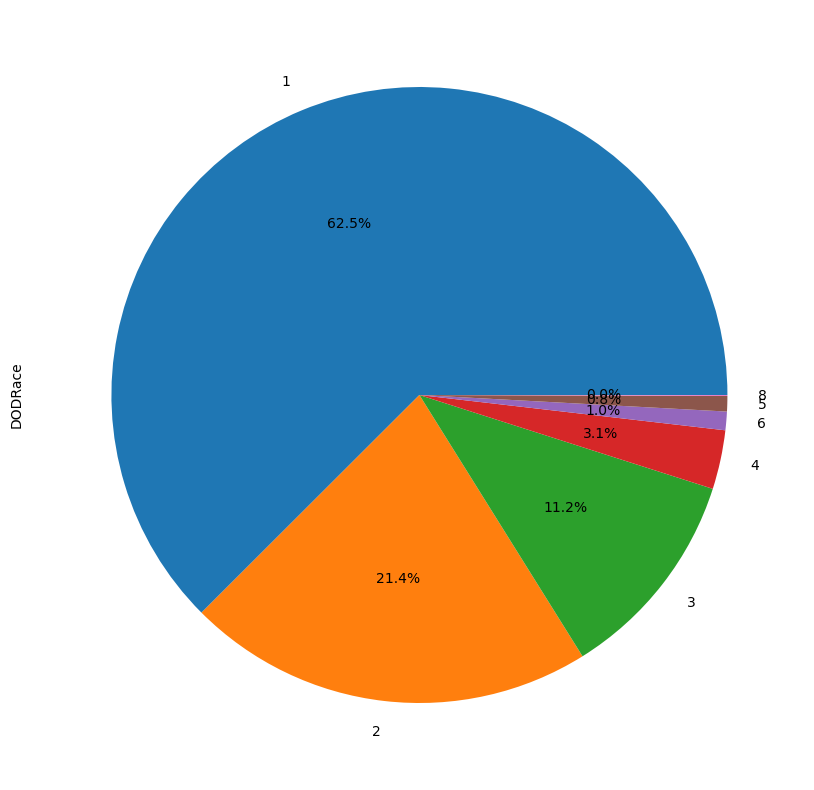

In [241]:
new_df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

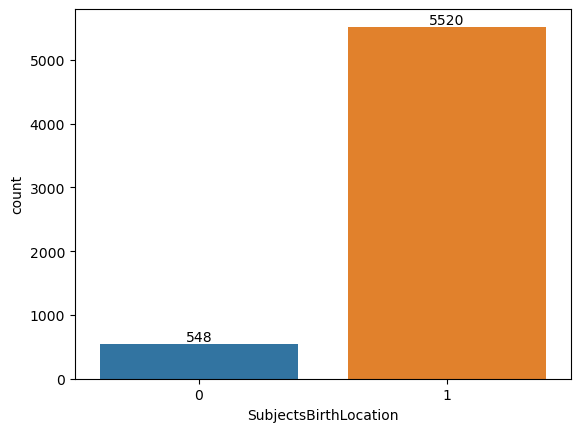

In [242]:
ax = sns.countplot(x='SubjectsBirthLocation', data=new_df)
ax.bar_label(ax.containers[0]);

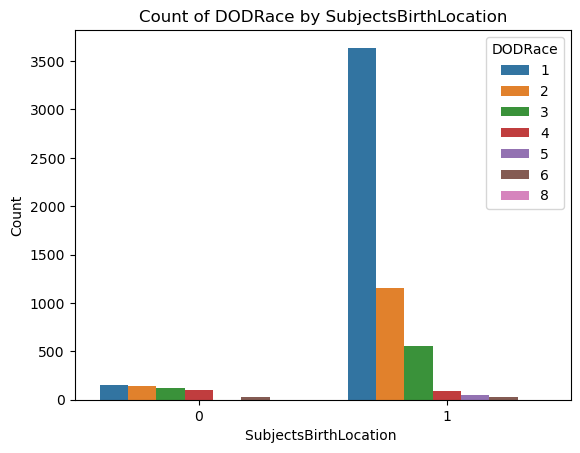

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
ax = sns.countplot(x='SubjectsBirthLocation', data=new_df, hue='DODRace')

# Set plot labels and title
plt.xlabel('SubjectsBirthLocation ')
plt.ylabel('Count')
plt.title('Count of DODRace by SubjectsBirthLocation')

# Show the plot
plt.show()



    

In [244]:
# Calculating the outliers for each classes 
unique_classes = new_df['DODRace'].unique()
outlier_counts_by_class = pd.DataFrame(columns=['Class', 'Column', 'Outlier Count'])
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1

# Loop through each class 
for class_label in unique_classes:
    # Filter for class name 
    class_data = new_df[new_df['DODRace'] == class_label]

    # Calculate outlier counts for each column within this class
    for column in class_data.columns:
        lower_bound = Q1[column] - 1.5 * IQR[column]
        upper_bound = Q3[column] + 1.5 * IQR[column]
        column_outliers = ((class_data[column] < lower_bound) | (class_data[column] > upper_bound))
        outlier_count = column_outliers.sum()

        # Store the outlier count 
        outlier_counts_by_class = outlier_counts_by_class.append({
            'Class': class_label,
            'Column': column,
            'Outlier Count': outlier_count
        }, ignore_index=True)

outlier_counts_by_class.groupby('Column')['Outlier Count'].sum().sum()



C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HTC\AppData\Local\Temp\ipykernel_14140\2553091548.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

3702

In [245]:
outlier_counts_by_class.groupby('Class')['Outlier Count'].sum()

Class
1    1639
2     962
3     419
4     460
5      76
6     142
8       4
Name: Outlier Count, dtype: object

In [246]:
drop_DODRace = new_df.DODRace.value_counts()[new_df.DODRace.value_counts() <= 500].index
drop_DODRace

Int64Index([4, 6, 5, 8], dtype='int64')

In [247]:
for i in drop_DODRace:
    drop_index = new_df[new_df['DODRace'] == i].index
    new_df.drop(index = drop_index, inplace=True)

new_df.reset_index(drop=True, inplace=True)
new_df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace
0,231,1282,301,204,1180,222,177,373,315,263,...,850,217,345,942,657,152,756,0,0,2
1,194,1379,320,207,1292,225,178,372,272,250,...,708,168,329,1032,534,155,815,0,1,3
2,183,1369,329,233,1271,237,196,397,300,276,...,727,159,367,1035,663,162,799,0,1,1
3,261,1356,306,214,1250,240,188,384,364,276,...,923,235,371,999,782,173,818,0,1,2
4,309,1303,308,214,1210,217,182,378,320,336,...,1163,300,380,911,886,152,762,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,235,1353,312,216,1263,228,193,384,318,241,...,816,210,347,1016,675,163,778,1,1,1
5585,247,1473,336,234,1346,253,196,428,374,284,...,978,235,385,1082,896,178,873,1,1,1
5586,264,1394,313,227,1280,245,193,407,367,271,...,991,258,353,1011,832,178,822,1,1,1
5587,203,1417,327,223,1314,250,196,419,365,271,...,783,192,350,1062,731,172,837,1,1,1


In [248]:
new_df['DODRace'].head()

0    2
1    3
2    1
3    2
4    1
Name: DODRace, dtype: int64

In [249]:
new_df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace
0,231,1282,301,204,1180,222,177,373,315,263,...,850,217,345,942,657,152,756,0,0,2
1,194,1379,320,207,1292,225,178,372,272,250,...,708,168,329,1032,534,155,815,0,1,3
2,183,1369,329,233,1271,237,196,397,300,276,...,727,159,367,1035,663,162,799,0,1,1
3,261,1356,306,214,1250,240,188,384,364,276,...,923,235,371,999,782,173,818,0,1,2
4,309,1303,308,214,1210,217,182,378,320,336,...,1163,300,380,911,886,152,762,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,235,1353,312,216,1263,228,193,384,318,241,...,816,210,347,1016,675,163,778,1,1,1
5585,247,1473,336,234,1346,253,196,428,374,284,...,978,235,385,1082,896,178,873,1,1,1
5586,264,1394,313,227,1280,245,193,407,367,271,...,991,258,353,1011,832,178,822,1,1,1
5587,203,1417,327,223,1314,250,196,419,365,271,...,783,192,350,1062,731,172,837,1,1,1


In [250]:
new_df.DODRace.value_counts()

1    3669
2    1261
3     659
Name: DODRace, dtype: int64

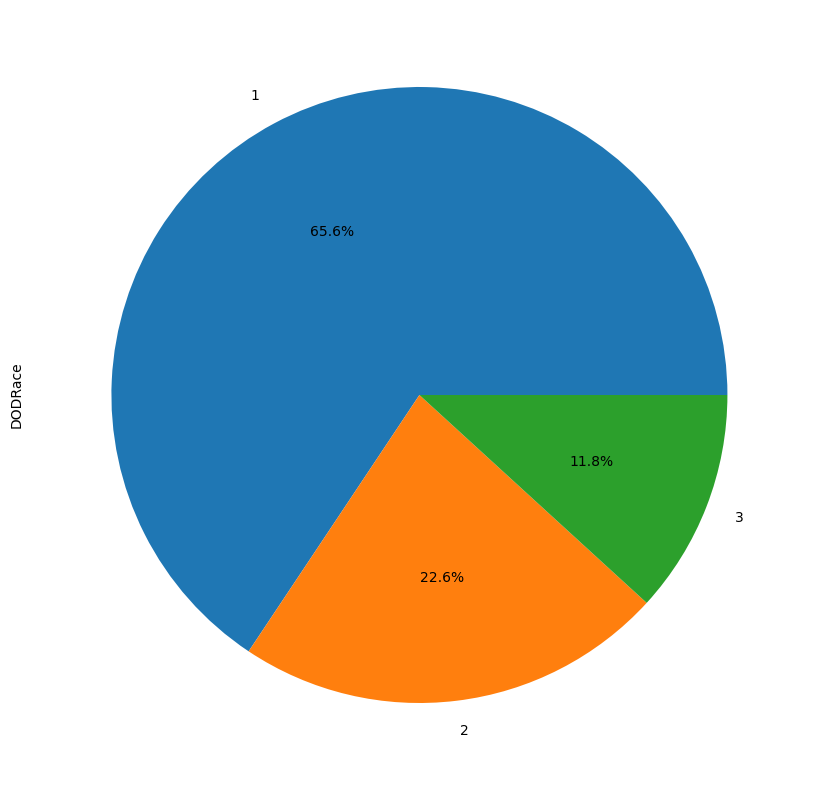

In [251]:
new_df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [252]:
# need to remove outlier , encode the counry diffrent delet one coulmn have strone corrlation 

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [253]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [254]:
# now we split dataset 
X = new_df.drop(columns=["DODRace"])
y = new_df.DODRace
print('''
Shape of X is  : {}
Shape of Y is  : {}
Shape of df is : {}'''.format(X.shape,y.shape,new_df.shape))


Shape of X is  : (5589, 95)
Shape of Y is  : (5589,)
Shape of df is : (5589, 96)


In [255]:
# we split our dataset 
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size=0.20 , random_state=42,stratify =y)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4471, 95)
Train target shape   :  (4471,)
Test features shape  :  (1118, 95)
Test target shape    :  (1118,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [256]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipeline_logstic = Pipeline(steps=operations)

pipeline_logstic.fit(X_train, y_train)


C:\Users\HTC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [257]:
# predict on train and test to see the results
y_pred =pipeline_logstic.predict(X_test)
y_train_pred = pipeline_logstic.predict(X_train)

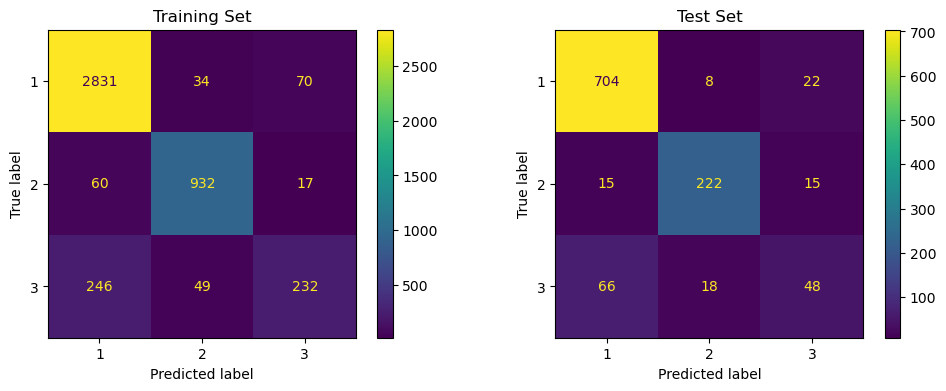


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      2935
           2       0.92      0.92      0.92      1009
           3       0.73      0.44      0.55       527

    accuracy                           0.89      4471
   macro avg       0.85      0.78      0.80      4471
weighted avg       0.89      0.89      0.88      4471

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.90      0.96      0.93       734
           2       0.90      0.88      0.89       252
           3       0.56      0.36      0.44       132

    accuracy                           0.87      1118
   macro avg       0.79      0.73      0.75      1118
weighted avg       0.86      0.87      0.86      1118



In [258]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(pipeline_logstic, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(pipeline_logstic, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred)}''')

In [259]:
# we can see that recall and f1-score in class 3 not preforming well 

In [260]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score,  f1_score


f1_S = make_scorer(f1_score, average = "weighted")
precision_S = make_scorer(precision_score, average = "weighted")
recall_S = make_scorer(recall_score, average = "weighted")


scoring = {"f1r":f1_S,
           "precision":precision_S,
           "recall":recall_S}


scores = cross_validate(pipeline_logstic, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()

C:\Users\HTC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HTC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\HTC\anaconda3\lib\site-packages\sklea

fit_time           0.203551
score_time         0.005405
test_f1r           0.867187
train_f1r          0.884320
test_precision     0.866728
train_precision    0.885194
test_recall        0.877431
train_recall       0.893337
dtype: float64

In [261]:
df_scores

,fit_time,score_time,test_f1r,train_f1r,test_precision,train_precision,test_recall,train_recall
1,0.193635,0.004512,0.878669,0.881628,0.877439,0.882356,0.881696,0.891375
2,0.188877,0.006005,0.865894,0.884392,0.865707,0.885613,0.879195,0.893390
3,0.200114,0.005003,0.862284,0.885857,0.859594,0.886866,0.872483,0.894632
4,0.196952,0.004996,0.855410,0.882472,0.861208,0.882599,0.872483,0.891402
5,0.189019,0.004512,0.852346,0.889048,0.850055,0.890000,0.861298,0.897614
6,0.232245,0.006492,0.888539,0.882945,0.887360,0.883581,0.894855,0.892396
7,0.208455,0.005513,0.857889,0.888649,0.855386,0.890032,0.868009,0.897117
8,0.181389,0.005507,0.867274,0.884138,0.867698,0.885145,0.879195,0.893390
9,0.193545,0.005514,0.856042,0.882299,0.855190,0.883306,0.868009,0.891402
10,0.251281,0.005999,0.887525,0.881769,0.887646,0.882440,0.897092,0.890656


### Logistic Model GridsearchCV

In [262]:
operations = [("scaler", StandardScaler()), ("logistic_model", LogisticRegression(max_iter=5000))]
GridModel_logstic = Pipeline(steps=operations)


In [263]:
param_grid = { "logistic_model__class_weight" : ["balanced", None],
               'logistic_model__penalty': ["l1","l2"],
               'logistic_model__solver' : ['saga','lbfgs','liblinear'],
               'logistic_model__C' :[0.001,0.01, 0.1, 1, 5, 10, 15, 20, 25]
             }
f1_Hispanic =  make_scorer(f1_score, average=None, labels=[3])# Class 3 represent the Hispanic which is the worst scoring for our model and we need to foucs on it 


In [264]:
grid_Logistick_pipe = GridSearchCV(GridModel_logstic, param_grid = param_grid,scoring=f1_Hispanic, cv=5, return_train_score=True)
grid_Logistick_pipe.fit(X_train,y_train) 

C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


90 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_model',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'logistic_model__C': [0.001, 0.01, 0.1, 1, 5, 10, 15,
                                               20, 25],
                         'logistic_model__class_weight': ['balanced', None],
                         'logistic_model__penalty': ['l1', 'l2'],
                         'logistic_model__solver': ['saga', 'lbfgs',
                                                    'liblinear']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [265]:
grid_Logistick_pipe.best_params_

{'logistic_model__C': 0.1,
 'logistic_model__class_weight': 'balanced',
 'logistic_model__penalty': 'l2',
 'logistic_model__solver': 'liblinear'}

In [266]:
y_pred_grid =grid_Logistick_pipe.predict(X_test)
y_train_pred_grid = grid_Logistick_pipe.predict(X_train)

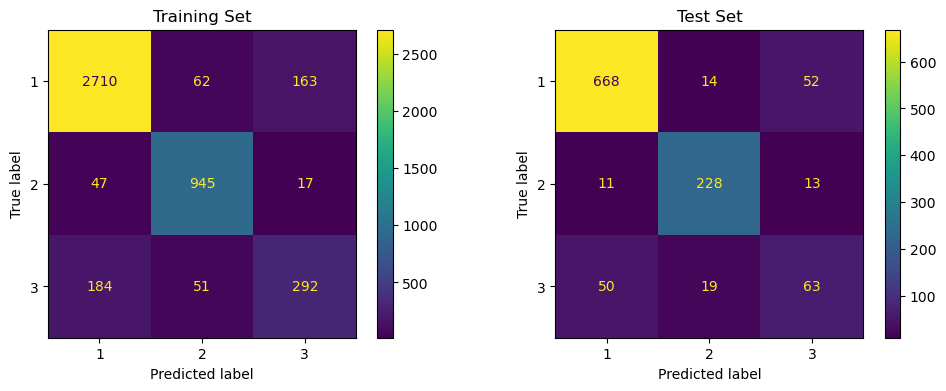


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      2935
           2       0.89      0.94      0.91      1009
           3       0.62      0.55      0.58       527

    accuracy                           0.88      4471
   macro avg       0.81      0.80      0.81      4471
weighted avg       0.88      0.88      0.88      4471

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.92      0.91      0.91       734
           2       0.87      0.90      0.89       252
           3       0.49      0.48      0.48       132

    accuracy                           0.86      1118
   macro avg       0.76      0.76      0.76      1118
weighted avg       0.86      0.86      0.86      1118



In [267]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(grid_Logistick_pipe, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(grid_Logistick_pipe, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_grid)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_grid)}''')

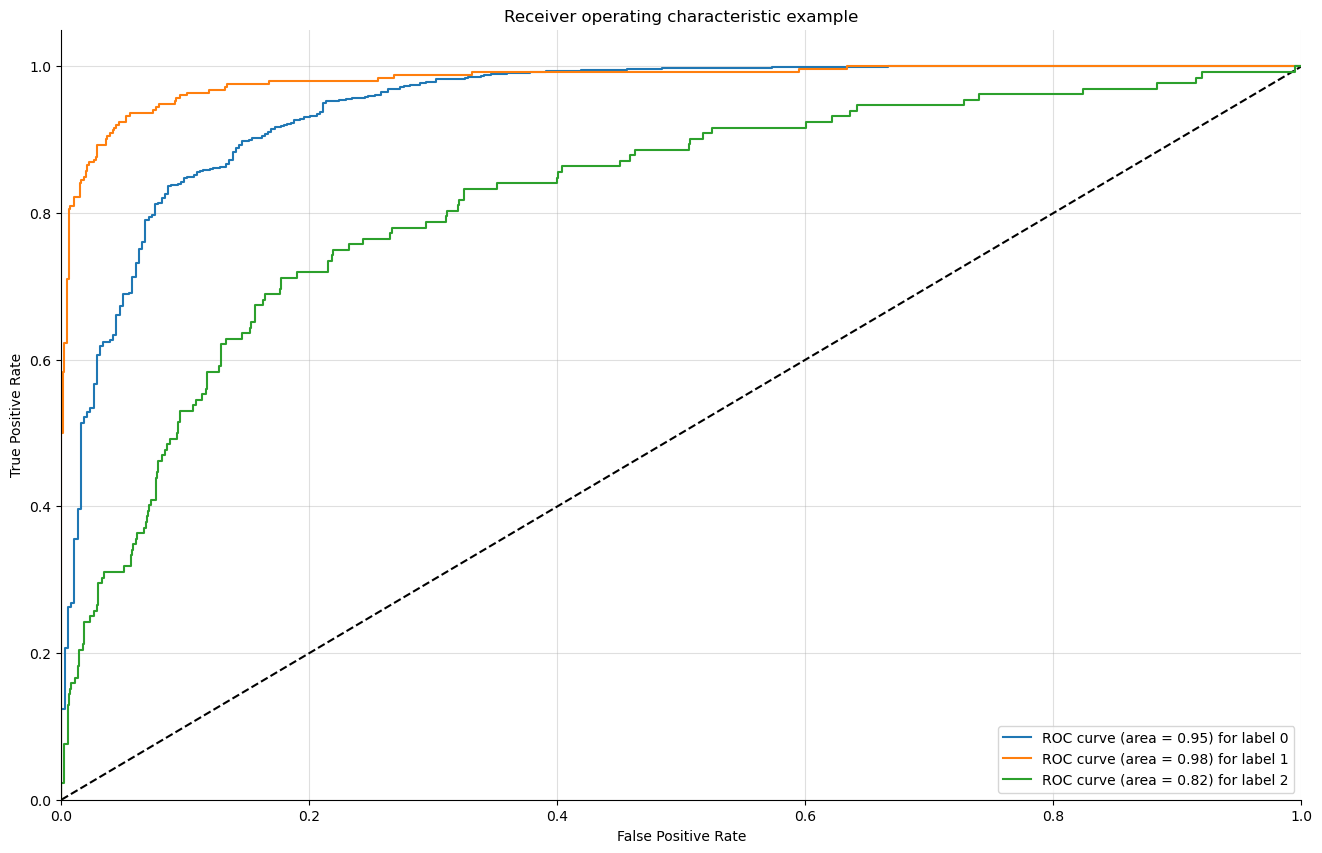

In [268]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
plot_multiclass_roc(grid_Logistick_pipe, X_test, y_test, n_classes=3, figsize=(16, 10));

## 2. SVC

### Vanilla SVC model

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

In [75]:
operations_SVM = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
SVM_pipe = Pipeline(steps=operations_SVM)

In [76]:
SVM_pipe.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC(probability=True))])

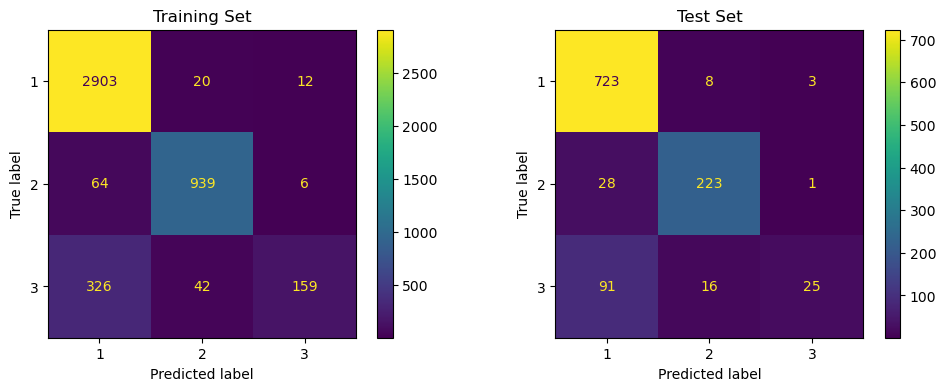


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.88      0.99      0.93      2935
           2       0.94      0.93      0.93      1009
           3       0.90      0.30      0.45       527

    accuracy                           0.89      4471
   macro avg       0.91      0.74      0.77      4471
weighted avg       0.90      0.89      0.88      4471

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.86      0.99      0.92       734
           2       0.90      0.88      0.89       252
           3       0.86      0.19      0.31       132

    accuracy                           0.87      1118
   macro avg       0.87      0.69      0.71      1118
weighted avg       0.87      0.87      0.84      1118



In [77]:
y_pred_svm = SVM_pipe.predict(X_test)
y_train_pred_SVM = SVM_pipe.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(SVM_pipe, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(SVM_pipe, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_SVM)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_svm)}''')

In [78]:
from sklearn.metrics import precision_score, recall_score,  f1_score 
from sklearn.metrics import make_scorer

########################333###########################delelte delet 
f1_S = make_scorer(f1_score, average = "weighted")
precision_S = make_scorer(precision_score, average = "weighted")
recall_S = make_scorer(recall_score, average = "weighted")


scoring = {"f1r":f1_S,
           "precision":precision_S,
           "recall":recall_S}
################################################################33



scores = cross_validate(SVM_pipe, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()
scores = cross_validate(SVM_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1r           0.833040
train_f1r          0.871771
test_precision     0.854004
train_precision    0.895087
test_recall        0.861329
train_recall       0.892474
dtype: float64

In [79]:
df_scores

,fit_time,score_time,test_f1r,train_f1r,test_precision,train_precision,test_recall,train_recall
1,3.597850,0.266487,0.831679,0.872626,0.840213,0.892450,0.859218,0.892338
2,3.364849,0.220728,0.831830,0.866364,0.875636,0.893191,0.865772,0.889013
3,3.045477,0.211109,0.838948,0.876564,0.848119,0.898257,0.861298,0.895164
4,3.088576,0.212499,0.829657,0.870548,0.845900,0.895126,0.857942,0.891809
5,3.365823,0.292329,0.833086,0.872751,0.860150,0.896412,0.862416,0.894045


###  SVC Model GridsearchCV

In [80]:
param_grid = {
    'SVC__C': [0.5, 1],
    'SVC__gamma': ["scale", "auto", 0.01],
    'SVC__kernel': ['rbf', 'linear']
}


In [81]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=[3])


In [82]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(class_weight="balanced", random_state=42))]
svc_grid = Pipeline(steps=operations)


In [83]:
svm_model_grid = GridSearchCV(svc_grid, param_grid, scoring=recall_Hispanic, cv=10, n_jobs=-1, return_train_score=True)


In [84]:
svm_model_grid.fit(X_train, y_train)



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.5, 1],
                         'SVC__gamma': ['scale', 'auto', 0.01],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[3]))

In [85]:
best_estimator = svm_model_grid.best_estimator_
print(best_estimator)

grid_search_results = pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]
grid_search_results

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.5, class_weight='balanced', kernel='linear',
                     random_state=42))])


mean_test_score      0.67373
mean_train_score    0.745525
Name: 1, dtype: object

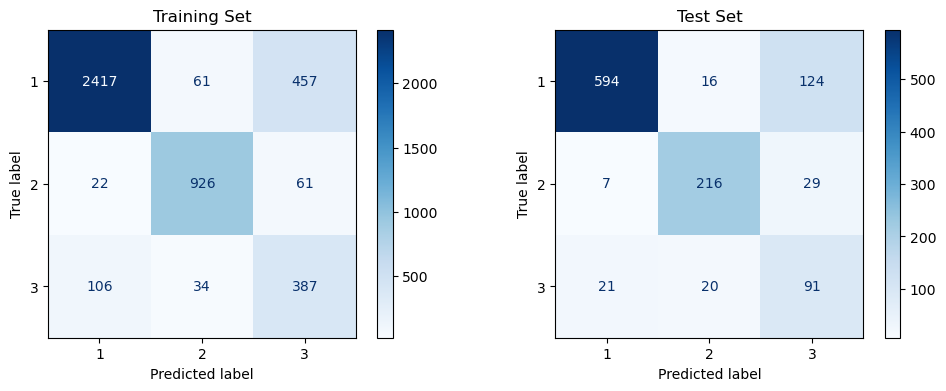


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.95      0.82      0.88      2935
           2       0.91      0.92      0.91      1009
           3       0.43      0.73      0.54       527

    accuracy                           0.83      4471
   macro avg       0.76      0.83      0.78      4471
weighted avg       0.88      0.83      0.85      4471

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.95      0.81      0.88       734
           2       0.86      0.86      0.86       252
           3       0.37      0.69      0.48       132

    accuracy                           0.81      1118
   macro avg       0.73      0.79      0.74      1118
weighted avg       0.86      0.81      0.83      1118



In [86]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Assuming pipe_model is your trained SVM model, and X_train, y_train, X_test, y_test are your data splits
y_pred_svm = svm_model_grid.predict(X_test)
y_train_pred_SVM = svm_model_grid.predict(X_train)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_train, y_train, ax=axes[0], cmap=plt.cm.Blues)
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test, ax=axes[1], cmap=plt.cm.Blues)
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_SVM)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_svm)}''')


## 3. RF

### Vanilla RF Model

In [269]:
from sklearn.ensemble import RandomForestClassifier
operations = [("scaler", StandardScaler()),
              ("RF_model", RandomForestClassifier(random_state=42))]

pipe_modelRF = Pipeline(steps=operations)

pipe_modelRF.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model', RandomForestClassifier(random_state=42))])

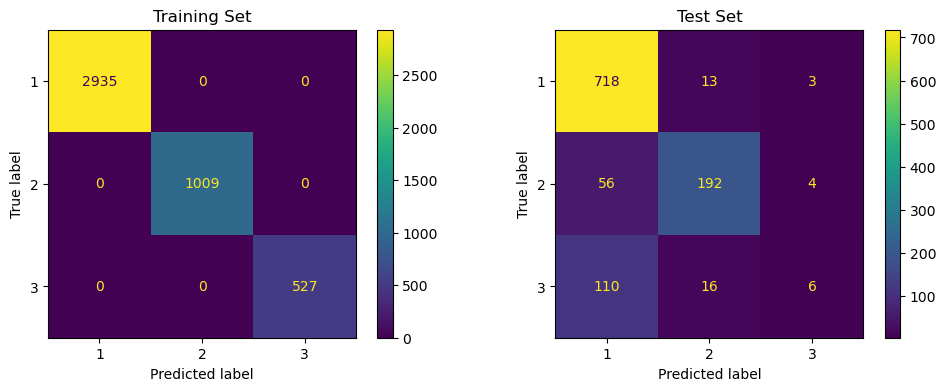


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2935
           2       1.00      1.00      1.00      1009
           3       1.00      1.00      1.00       527

    accuracy                           1.00      4471
   macro avg       1.00      1.00      1.00      4471
weighted avg       1.00      1.00      1.00      4471

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.81      0.98      0.89       734
           2       0.87      0.76      0.81       252
           3       0.46      0.05      0.08       132

    accuracy                           0.82      1118
   macro avg       0.71      0.60      0.59      1118
weighted avg       0.78      0.82      0.78      1118



In [270]:
y_pred_RF = pipe_modelRF.predict(X_test)
y_train_pred_RF = pipe_modelRF.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(pipe_modelRF, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(pipe_modelRF, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_RF)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_RF)}''')

In [271]:
scores = cross_validate(pipe_modelRF, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()
scores = cross_validate(pipe_modelRF,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1r           0.768876
train_f1r          1.000000
test_precision     0.795430
train_precision    1.000000
test_recall        0.812571
train_recall       1.000000
dtype: float64

In [272]:
df_scores


,fit_time,score_time,test_f1r,train_f1r,test_precision,train_precision,test_recall,train_recall
1,1.385455,0.021174,0.759838,1.0,0.748966,1.0,0.806704,1.0
2,1.271925,0.020639,0.775864,1.0,0.818189,1.0,0.817673,1.0
3,1.290694,0.021098,0.764203,1.0,0.821721,1.0,0.808725,1.0
4,1.252017,0.020023,0.770351,1.0,0.771080,1.0,0.814318,1.0
5,1.264530,0.019653,0.774124,1.0,0.817194,1.0,0.815436,1.0


### RF Model GridsearchCV

In [273]:
param_grid = {'n_estimators':[64, 128, 200],
             'max_features':[2, 4, 'sqrt'],
             'max_depth':[2, 3, 4],
             'min_samples_split':[2, 3,4],
             'min_samples_leaf': [2,3,4],
             'max_samples':[0.8, 1]}



In [274]:
model = RandomForestClassifier(random_state=101, class_weight='balanced')
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring="recall",
                             n_jobs = -1,
                             verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan na

In [275]:
best_estimator = rf_grid_model.best_estimator_
print(best_estimator)

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=2,
                       max_samples=0.8, min_samples_leaf=2, n_estimators=64,
                       random_state=101)


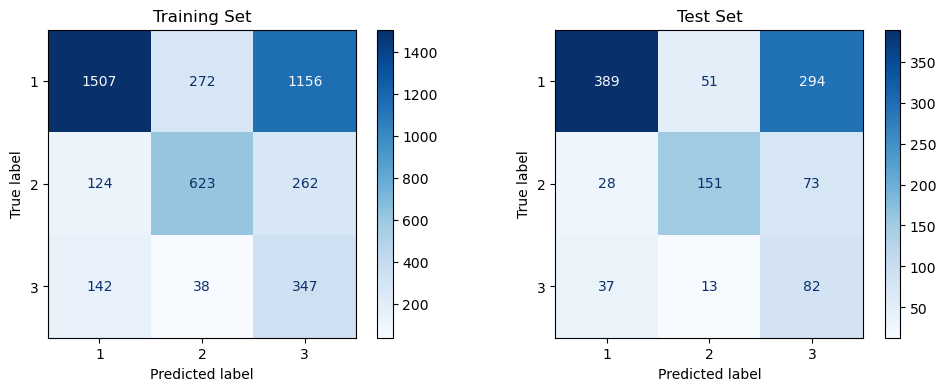


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.85      0.51      0.64      2935
           2       0.67      0.62      0.64      1009
           3       0.20      0.66      0.30       527

    accuracy                           0.55      4471
   macro avg       0.57      0.60      0.53      4471
weighted avg       0.73      0.55      0.60      4471

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.86      0.53      0.65       734
           2       0.70      0.60      0.65       252
           3       0.18      0.62      0.28       132

    accuracy                           0.56      1118
   macro avg       0.58      0.58      0.53      1118
weighted avg       0.74      0.56      0.61      1118



In [276]:
y_pred_rf = rf_grid_model.predict(X_test)
y_train_pred_rf = rf_grid_model.predict(X_train)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_train, y_train, ax=axes[0], cmap=plt.cm.Blues)
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test, ax=axes[1], cmap=plt.cm.Blues)
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_rf)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_rf)}''')

## 4. XGBoost

In [277]:
new_df['DODRace'].head(50)

0     2
1     3
2     1
3     2
4     1
5     2
6     1
7     2
8     1
9     2
10    2
11    1
12    1
13    3
14    1
15    1
16    2
17    2
18    1
19    1
20    2
21    1
22    1
23    2
24    3
25    1
26    1
27    1
28    3
29    3
30    1
31    1
32    2
33    1
34    1
35    2
36    2
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    2
45    1
46    2
47    1
48    1
49    1
Name: DODRace, dtype: int64

### Vanilla XGBoost Model

In [278]:
from xgboost import XGBClassifier



In [281]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier



# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Create a pipeline with preprocessing and XGBoost Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: StandardScaler for feature scaling
    ('xgb', XGBClassifier())
])


y_train_xgb = y_train.map({1: 0, 2: 1, 3: 2})
y_test_xgb = y_test.map({1: 0, 2: 1, 3: 2})
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_xgb)



Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
      

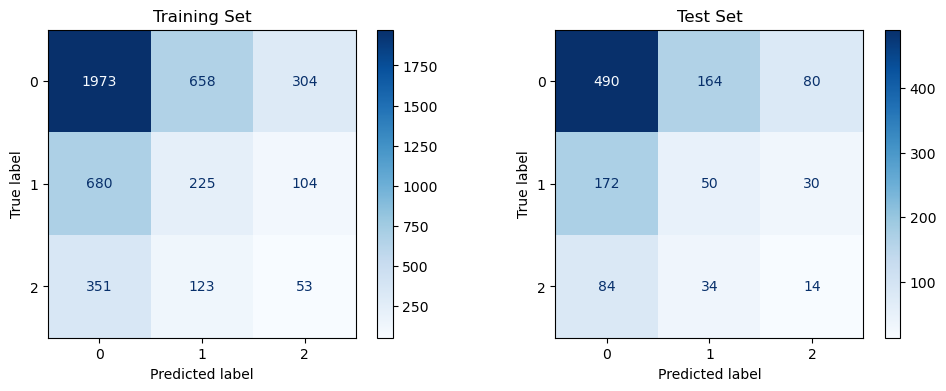


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      2935
           1       0.22      0.22      0.22      1009
           2       0.11      0.10      0.11       527

    accuracy                           0.50      4471
   macro avg       0.33      0.33      0.33      4471
weighted avg       0.50      0.50      0.50      4471

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       734
           1       0.20      0.20      0.20       252
           2       0.11      0.11      0.11       132

    accuracy                           0.50      1118
   macro avg       0.32      0.32      0.32      1118
weighted avg       0.49      0.50      0.49      1118



In [307]:
y_pred_XGB = pipeline.predict(X_test)
y_train_pred_XGB = pipeline.predict(X_train)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(pipeline, X_train, y_train_xgb, ax=axes[0], cmap=plt.cm.Blues)
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test_xgb, ax=axes[1], cmap=plt.cm.Blues)
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train_xgb, y_train_pred_XGB)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test_xgb, y_pred_XGB)}''')

In [289]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model,
                        X_train,
                        y_train_xgb,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1',
                                 'roc_auc'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1544, in

C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1544, in

C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1544, in

C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\HTC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1544, in

test_accuracy     NaN
train_accuracy    NaN
test_precision    NaN
train_precision   NaN
test_recall       NaN
train_recall      NaN
test_f1           NaN
train_f1          NaN
test_roc_auc      NaN
train_roc_auc     NaN
dtype: float64

### XGBoost Model GridsearchCV

In [290]:
param_grid = {"n_estimators":[50, 100, 200],
              'max_depth':[3,4,5],
              "learning_rate": [0.1, 0.2],
              "subsample":[0.5, 0.8, 1],
              "colsample_bytree":[0.5,0.7, 1]}

In [291]:
xgb_model = XGBClassifier(random_state=42)

In [292]:
xgb_grid = GridSearchCV(xgb_model,
                        param_grid,
                        scoring="f1",
                        verbose=2,
                        n_jobs=-1,
                        return_train_score=True)

xgb_grid.fit(X_train, y_train_xgb)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]

C:\Users\HTC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning:

One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     n

---
---

In [293]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.5}

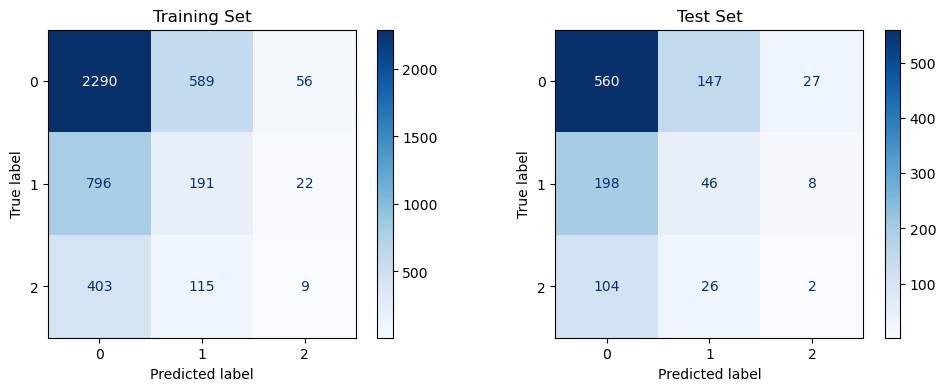


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      2935
           1       0.21      0.19      0.20      1009
           2       0.10      0.02      0.03       527

    accuracy                           0.56      4471
   macro avg       0.32      0.33      0.31      4471
weighted avg       0.49      0.56      0.52      4471

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       734
           1       0.21      0.18      0.20       252
           2       0.05      0.02      0.02       132

    accuracy                           0.54      1118
   macro avg       0.30      0.32      0.31      1118
weighted avg       0.48      0.54      0.51      1118



In [308]:
y_pred_XGB = xgb_grid.predict(X_test)
y_train_pred_XGB = xgb_grid.predict(X_train)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(xgb_grid, X_train, y_train_xgb, ax=axes[0], cmap=plt.cm.Blues)
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(xgb_grid, X_test, y_test_xgb, ax=axes[1], cmap=plt.cm.Blues)
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train_xgb, y_train_pred_XGB)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test_xgb, y_pred_XGB)}''')

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [209]:
!pip install imblearn

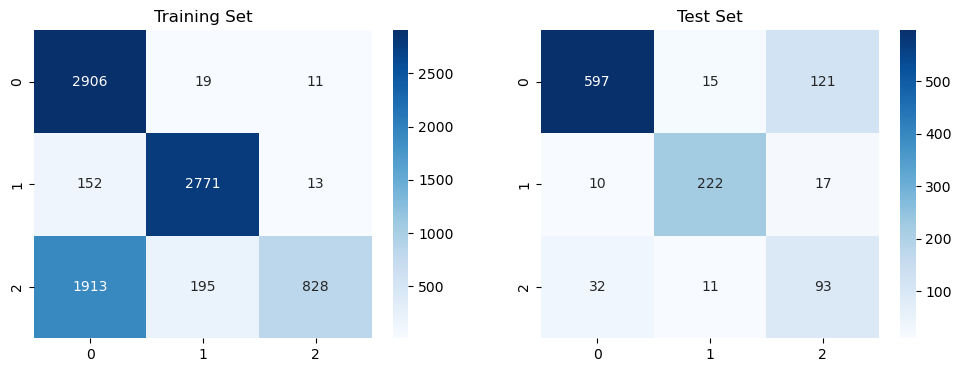




------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.58      0.99      0.74      2936
           2       0.93      0.94      0.94      2936
           3       0.97      0.28      0.44      2936

    accuracy                           0.74      8808
   macro avg       0.83      0.74      0.70      8808
weighted avg       0.83      0.74      0.70      8808

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.93      0.81      0.87       733
           2       0.90      0.89      0.89       249
           3       0.40      0.68      0.51       136

    accuracy                           0.82      1118
   macro avg       0.74      0.80      0.76      1118
weighted avg       0.86      0.82      0.83      1118



In [306]:
from imblearn.over_sampling import SMOTE





# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create and train SVM model
operations_SVM_SMOT = [("scaler", StandardScaler()), ("SVC", SVC(C=0.5, class_weight='balanced', kernel='linear',
                     random_state=42))]
SVM_pipe_SMOT = Pipeline(steps=operations_SVM_SMOT)


SVM_pipe_SMOT.fit(X_train_smote,y_train_smote)

# Print classification report
y_pred_svm = SVM_pipe_SMOT.predict(X_test)
y_train_pred_SVM = SVM_pipe.predict(X_train_smote)


cm_train = confusion_matrix(y_train_smote, y_train_pred_SVM)
cm_test = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrices using seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Set')
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Set')
plt.show()
print(f'''


------------------Train Results-----------------------------
{classification_report(y_train_smote, y_train_pred_SVM)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_svm)}''')


## Logistic Regression Over/ Under Sampling

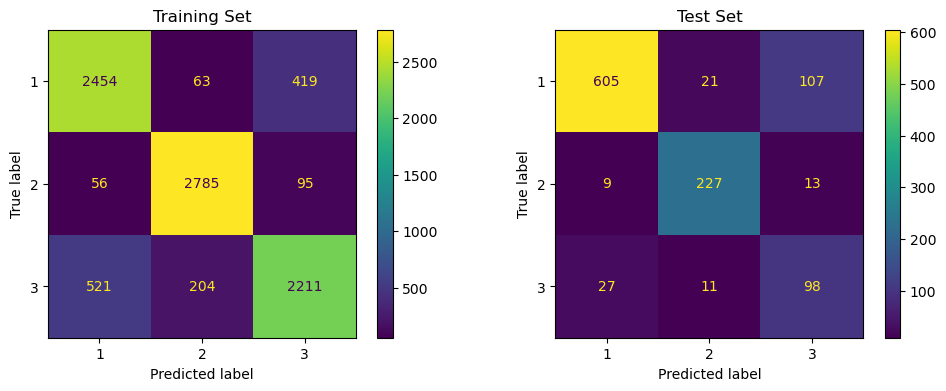


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.81      0.84      0.82      2936
           2       0.91      0.95      0.93      2936
           3       0.81      0.75      0.78      2936

    accuracy                           0.85      8808
   macro avg       0.84      0.85      0.84      8808
weighted avg       0.84      0.85      0.84      8808

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.94      0.83      0.88       733
           2       0.88      0.91      0.89       249
           3       0.45      0.72      0.55       136

    accuracy                           0.83      1118
   macro avg       0.76      0.82      0.78      1118
weighted avg       0.87      0.83      0.84      1118



In [317]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report





# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

operations_LGSM = [
    ("scaler", StandardScaler()), 
    ("logistic", LogisticRegression(C=0.1, class_weight='balanced', penalty='l2', solver='liblinear'))
]

pipeline_logstic = Pipeline(steps=operations_LGSM)

pipeline_logstic.fit(X_train_smote, y_train_smote)


y_pred =pipeline_logstic.predict(X_test)
y_train_pred = pipeline_logstic.predict(X_train_smote)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(pipeline_logstic, X_train_smote, y_train_smote, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(pipeline_logstic, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train_smote, y_train_pred)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred)}''')


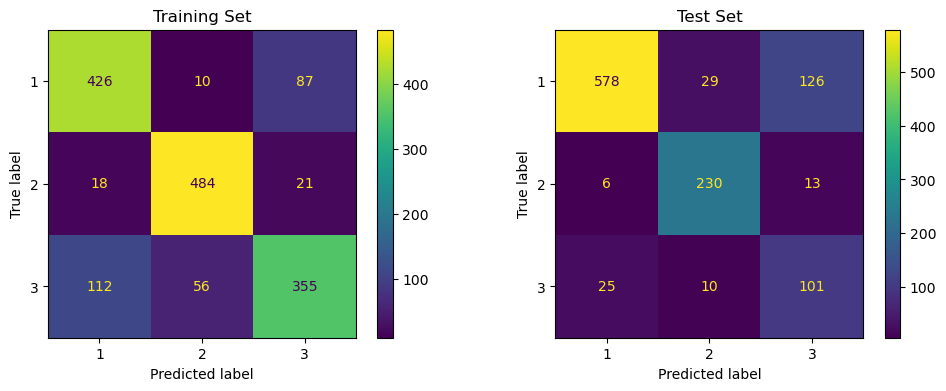


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.77      0.81      0.79       523
           2       0.88      0.93      0.90       523
           3       0.77      0.68      0.72       523

    accuracy                           0.81      1569
   macro avg       0.80      0.81      0.80      1569
weighted avg       0.80      0.81      0.80      1569

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.95      0.79      0.86       733
           2       0.86      0.92      0.89       249
           3       0.42      0.74      0.54       136

    accuracy                           0.81      1118
   macro avg       0.74      0.82      0.76      1118
weighted avg       0.86      0.81      0.83      1118



In [318]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Apply Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

operations_LGSM_1 = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=0.1, class_weight='balanced', penalty='l2', solver='liblinear'))]

pipeline_logstic = Pipeline(steps=operations_LGSM_1)

pipeline_logstic.fit(X_train_rus, y_train_rus)



y_pred =pipeline_logstic.predict(X_test)
y_train_pred = pipeline_logstic.predict(X_train_rus)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(pipeline_logstic, X_train_rus, y_train_rus, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(pipeline_logstic, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train_rus, y_train_pred)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred)}''')




## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___